In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Criação do Objeto BeautifulSoup

In [2]:
#https://www.imdb.com/chart/top/
#ao inspecionar o código-fonte da página top 250 filmes no imdb, copiei este trecho:
trecho_html = '''<ul class="ipc-metadata-list ipc-metadata-list--dividers-between sc-a1e81754-0 dHaCOW compact-list-view ipc-metadata-list--base" role="presentation"><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Tim Robbins in Um Sonho de Liberdade (1994)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BNDE3ODcxYzMtY2YzZC00NmNlLWJiNDMtZDViZWM2MzIxZDYwXkEyXkFqcGdeQXVyNjAwNDUxODI@._V1_QL75_UX140_CR0,1,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BNDE3ODcxYzMtY2YzZC00NmNlLWJiNDMtZDViZWM2MzIxZDYwXkEyXkFqcGdeQXVyNjAwNDUxODI@._V1_QL75_UX140_CR0,1,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BNDE3ODcxYzMtY2YzZC00NmNlLWJiNDMtZDViZWM2MzIxZDYwXkEyXkFqcGdeQXVyNjAwNDUxODI@._V1_QL75_UX210_CR0,2,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BNDE3ODcxYzMtY2YzZC00NmNlLWJiNDMtZDViZWM2MzIxZDYwXkEyXkFqcGdeQXVyNjAwNDUxODI@._V1_QL75_UX280_CR0,3,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0111161/?ref_=chttp_i_1" aria-label="Ver a página do título Um Sonho de Liberdade"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0111161/?ref_=chttp_t_1" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">1. Um Sonho de Liberdade</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1994</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 22m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">16</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 9,3" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">9,3</span><span class="ipc-rating-star--voteCount">&nbsp;(2,9&nbsp;mi)</span></span><button aria-label="Avaliar Um Sonho de Liberdade" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Um Sonho de Liberdade" role="button" tabindex="0" aria-label="Veja mais informações sobre Um Sonho de Liberdade" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Marlon Brando in O Poderoso Chefão (1972)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BZjgwNzE5ODgtYzAyZC00YTZhLThhNDktMDVlOGNhYzk5NTVkXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY207_CR3,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BZjgwNzE5ODgtYzAyZC00YTZhLThhNDktMDVlOGNhYzk5NTVkXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY207_CR3,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BZjgwNzE5ODgtYzAyZC00YTZhLThhNDktMDVlOGNhYzk5NTVkXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY311_CR4,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BZjgwNzE5ODgtYzAyZC00YTZhLThhNDktMDVlOGNhYzk5NTVkXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY414_CR5,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0068646/?ref_=chttp_i_2" aria-label="Ver a página do título O Poderoso Chefão"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0068646/?ref_=chttp_t_2" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">2. O Poderoso Chefão</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1972</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 55m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">14</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 9,2" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">9,2</span><span class="ipc-rating-star--voteCount">&nbsp;(2&nbsp;mi)</span></span><button aria-label="Avaliar O Poderoso Chefão" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre O Poderoso Chefão" role="button" tabindex="0" aria-label="Veja mais informações sobre O Poderoso Chefão" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Heath Ledger in Batman: O Cavaleiro das Trevas (2008)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BM2E1ZjEyYWQtMjgyMy00ZTkwLThkM2QtN2YwM2NmYzAyYjE0XkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY207_CR8,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BM2E1ZjEyYWQtMjgyMy00ZTkwLThkM2QtN2YwM2NmYzAyYjE0XkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY207_CR8,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BM2E1ZjEyYWQtMjgyMy00ZTkwLThkM2QtN2YwM2NmYzAyYjE0XkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY311_CR12,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BM2E1ZjEyYWQtMjgyMy00ZTkwLThkM2QtN2YwM2NmYzAyYjE0XkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY414_CR16,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0468569/?ref_=chttp_i_3" aria-label="Ver a página do título Batman: O Cavaleiro das Trevas"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0468569/?ref_=chttp_t_3" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">3. Batman: O Cavaleiro das Trevas</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2008</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 32m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">12</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 9,0" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">9,0</span><span class="ipc-rating-star--voteCount">&nbsp;(2,9&nbsp;mi)</span></span><button aria-label="Avaliar Batman: O Cavaleiro das Trevas" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Batman: O Cavaleiro das Trevas" role="button" tabindex="0" aria-label="Veja mais informações sobre Batman: O Cavaleiro das Trevas" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Al Pacino in O Poderoso Chefão II (1974)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BOGM2M2Q0ZWQtZjc5NC00NDY4LWIxYTktMDE4ZjIyYTRlNTIyXkEyXkFqcGdeQXVyODc0OTEyNDU@._V1_QL75_UY207_CR4,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BOGM2M2Q0ZWQtZjc5NC00NDY4LWIxYTktMDE4ZjIyYTRlNTIyXkEyXkFqcGdeQXVyODc0OTEyNDU@._V1_QL75_UY207_CR4,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BOGM2M2Q0ZWQtZjc5NC00NDY4LWIxYTktMDE4ZjIyYTRlNTIyXkEyXkFqcGdeQXVyODc0OTEyNDU@._V1_QL75_UY311_CR6,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BOGM2M2Q0ZWQtZjc5NC00NDY4LWIxYTktMDE4ZjIyYTRlNTIyXkEyXkFqcGdeQXVyODc0OTEyNDU@._V1_QL75_UY414_CR8,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0071562/?ref_=chttp_i_4" aria-label="Ver a página do título O Poderoso Chefão II"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0071562/?ref_=chttp_t_4" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">4. O Poderoso Chefão II</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1974</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">3h 22m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">14</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 9,0" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">9,0</span><span class="ipc-rating-star--voteCount">&nbsp;(1,4&nbsp;mi)</span></span><button aria-label="Avaliar O Poderoso Chefão II" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre O Poderoso Chefão II" role="button" tabindex="0" aria-label="Veja mais informações sobre O Poderoso Chefão II" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Henry Fonda, Lee J. Cobb, Edward Binns, and George Voskovec in 12 Homens e uma Sentença (1957)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BODRmNWRiYmUtNGM2Yy00NTgwLTgxNzMtMGExYzI5NjllNjBhXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY207_CR3,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BODRmNWRiYmUtNGM2Yy00NTgwLTgxNzMtMGExYzI5NjllNjBhXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY207_CR3,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BODRmNWRiYmUtNGM2Yy00NTgwLTgxNzMtMGExYzI5NjllNjBhXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY311_CR4,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BODRmNWRiYmUtNGM2Yy00NTgwLTgxNzMtMGExYzI5NjllNjBhXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY414_CR5,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0050083/?ref_=chttp_i_5" aria-label="Ver a página do título 12 Homens e uma Sentença"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0050083/?ref_=chttp_t_5" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">5. 12 Homens e uma Sentença</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1957</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 36m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">Livre</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 9,0" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">9,0</span><span class="ipc-rating-star--voteCount">&nbsp;(876&nbsp;mil)</span></span><button aria-label="Avaliar 12 Homens e uma Sentença" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre 12 Homens e uma Sentença" role="button" tabindex="0" aria-label="Veja mais informações sobre 12 Homens e uma Sentença" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="A Lista de Schindler (1993)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BYjM5ZjYxNjQtZjdhYi00NzBiLTgyNGItOGU3YTYwYWE0NmEzXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UX140_CR0,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BYjM5ZjYxNjQtZjdhYi00NzBiLTgyNGItOGU3YTYwYWE0NmEzXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UX140_CR0,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BYjM5ZjYxNjQtZjdhYi00NzBiLTgyNGItOGU3YTYwYWE0NmEzXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UX210_CR0,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BYjM5ZjYxNjQtZjdhYi00NzBiLTgyNGItOGU3YTYwYWE0NmEzXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UX280_CR0,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0108052/?ref_=chttp_i_6" aria-label="Ver a página do título A Lista de Schindler"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0108052/?ref_=chttp_t_6" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">6. A Lista de Schindler</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1993</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">3h 15m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">14</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 9,0" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">9,0</span><span class="ipc-rating-star--voteCount">&nbsp;(1,5&nbsp;mi)</span></span><button aria-label="Avaliar A Lista de Schindler" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre A Lista de Schindler" role="button" tabindex="0" aria-label="Veja mais informações sobre A Lista de Schindler" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Liv Tyler, Sean Astin, Elijah Wood, Viggo Mortensen, Ian McKellen, and Andy Serkis in O Senhor dos Anéis: O Retorno do Rei (2003)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BNzZiOTI4MWItZGMxZC00NjZkLWJlOWUtMDY5YzE1NzhiNGRhXkEyXkFqcGdeQXVyODc0OTEyNDU@._V1_QL75_UY207_CR4,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BNzZiOTI4MWItZGMxZC00NjZkLWJlOWUtMDY5YzE1NzhiNGRhXkEyXkFqcGdeQXVyODc0OTEyNDU@._V1_QL75_UY207_CR4,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BNzZiOTI4MWItZGMxZC00NjZkLWJlOWUtMDY5YzE1NzhiNGRhXkEyXkFqcGdeQXVyODc0OTEyNDU@._V1_QL75_UY311_CR5,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BNzZiOTI4MWItZGMxZC00NjZkLWJlOWUtMDY5YzE1NzhiNGRhXkEyXkFqcGdeQXVyODc0OTEyNDU@._V1_QL75_UY414_CR7,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0167260/?ref_=chttp_i_7" aria-label="Ver a página do título O Senhor dos Anéis: O Retorno do Rei"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0167260/?ref_=chttp_t_7" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">7. O Senhor dos Anéis: O Retorno do Rei</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2003</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">3h 21m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">14</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 9,0" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">9,0</span><span class="ipc-rating-star--voteCount">&nbsp;(2&nbsp;mi)</span></span><button aria-label="Avaliar O Senhor dos Anéis: O Retorno do Rei" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre O Senhor dos Anéis: O Retorno do Rei" role="button" tabindex="0" aria-label="Veja mais informações sobre O Senhor dos Anéis: O Retorno do Rei" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Uma Thurman in Pulp Fiction: Tempo de Violência (1994)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BN2RiMTA1ZGQtOTNhYi00MjQyLTk0MzAtMWE1OTM2NWUxNzBkXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UX140_CR0,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BN2RiMTA1ZGQtOTNhYi00MjQyLTk0MzAtMWE1OTM2NWUxNzBkXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UX140_CR0,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BN2RiMTA1ZGQtOTNhYi00MjQyLTk0MzAtMWE1OTM2NWUxNzBkXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UX210_CR0,1,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BN2RiMTA1ZGQtOTNhYi00MjQyLTk0MzAtMWE1OTM2NWUxNzBkXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UX280_CR0,1,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0110912/?ref_=chttp_i_8" aria-label="Ver a página do título Pulp Fiction: Tempo de Violência"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0110912/?ref_=chttp_t_8" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">8. Pulp Fiction: Tempo de Violência</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1994</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 34m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">18</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,9" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,9</span><span class="ipc-rating-star--voteCount">&nbsp;(2,2&nbsp;mi)</span></span><button aria-label="Avaliar Pulp Fiction: Tempo de Violência" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Pulp Fiction: Tempo de Violência" role="button" tabindex="0" aria-label="Veja mais informações sobre Pulp Fiction: Tempo de Violência" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Liv Tyler, Sean Astin, Sean Bean, Elijah Wood, Cate Blanchett, Viggo Mortensen, Ian McKellen, Orlando Bloom, Billy Boyd, Dominic Monaghan, and John Rhys-Davies in O Senhor dos Anéis: A Sociedade do Anel (2001)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BNDEyMzU0ODUtMTdjOS00Y2E2LWJlZmEtYmJjMmQ2NWZlNGQ1XkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY207_CR2,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BNDEyMzU0ODUtMTdjOS00Y2E2LWJlZmEtYmJjMmQ2NWZlNGQ1XkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY207_CR2,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BNDEyMzU0ODUtMTdjOS00Y2E2LWJlZmEtYmJjMmQ2NWZlNGQ1XkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY311_CR2,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BNDEyMzU0ODUtMTdjOS00Y2E2LWJlZmEtYmJjMmQ2NWZlNGQ1XkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY414_CR3,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0120737/?ref_=chttp_i_9" aria-label="Ver a página do título O Senhor dos Anéis: A Sociedade do Anel"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0120737/?ref_=chttp_t_9" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">9. O Senhor dos Anéis: A Sociedade do Anel</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2001</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 58m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">12</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,9" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,9</span><span class="ipc-rating-star--voteCount">&nbsp;(2&nbsp;mi)</span></span><button aria-label="Avaliar O Senhor dos Anéis: A Sociedade do Anel" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre O Senhor dos Anéis: A Sociedade do Anel" role="button" tabindex="0" aria-label="Veja mais informações sobre O Senhor dos Anéis: A Sociedade do Anel" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Três Homens em Conflito (1966)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BNzE2MDJkNTktMzVkYS00ZWFlLWIzOWYtYzRhYjcyYzBmM2MwXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR3,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BNzE2MDJkNTktMzVkYS00ZWFlLWIzOWYtYzRhYjcyYzBmM2MwXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR3,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BNzE2MDJkNTktMzVkYS00ZWFlLWIzOWYtYzRhYjcyYzBmM2MwXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY311_CR4,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BNzE2MDJkNTktMzVkYS00ZWFlLWIzOWYtYzRhYjcyYzBmM2MwXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY414_CR6,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0060196/?ref_=chttp_i_10" aria-label="Ver a página do título Três Homens em Conflito"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0060196/?ref_=chttp_t_10" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">10. Três Homens em Conflito</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1966</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 41m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">14</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,8" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,8</span><span class="ipc-rating-star--voteCount">&nbsp;(819&nbsp;mil)</span></span><button aria-label="Avaliar Três Homens em Conflito" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Três Homens em Conflito" role="button" tabindex="0" aria-label="Veja mais informações sobre Três Homens em Conflito" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Tom Hanks in Forrest Gump: O Contador de Histórias (1994)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BYmFjODI0MGItZmNhMi00Y2U3LTg1ZTItOWMxOTE4YzU2NDQ0XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR9,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BYmFjODI0MGItZmNhMi00Y2U3LTg1ZTItOWMxOTE4YzU2NDQ0XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR9,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BYmFjODI0MGItZmNhMi00Y2U3LTg1ZTItOWMxOTE4YzU2NDQ0XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY311_CR14,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BYmFjODI0MGItZmNhMi00Y2U3LTg1ZTItOWMxOTE4YzU2NDQ0XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY414_CR19,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0109830/?ref_=chttp_i_11" aria-label="Ver a página do título Forrest Gump: O Contador de Histórias"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0109830/?ref_=chttp_t_11" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">11. Forrest Gump: O Contador de Histórias</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1994</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 22m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">14</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,8" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,8</span><span class="ipc-rating-star--voteCount">&nbsp;(2,3&nbsp;mi)</span></span><button aria-label="Avaliar Forrest Gump: O Contador de Histórias" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Forrest Gump: O Contador de Histórias" role="button" tabindex="0" aria-label="Veja mais informações sobre Forrest Gump: O Contador de Histórias" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="O Senhor dos Anéis: As Duas Torres (2002)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BZGYxYWFiMzMtMzIwNy00Y2EyLTkwZDYtNzk3OThkYTRmNWVmXkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UX140_CR0,8,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BZGYxYWFiMzMtMzIwNy00Y2EyLTkwZDYtNzk3OThkYTRmNWVmXkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UX140_CR0,8,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BZGYxYWFiMzMtMzIwNy00Y2EyLTkwZDYtNzk3OThkYTRmNWVmXkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UX210_CR0,12,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BZGYxYWFiMzMtMzIwNy00Y2EyLTkwZDYtNzk3OThkYTRmNWVmXkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UX280_CR0,16,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0167261/?ref_=chttp_i_12" aria-label="Ver a página do título O Senhor dos Anéis: As Duas Torres"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0167261/?ref_=chttp_t_12" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">12. O Senhor dos Anéis: As Duas Torres</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2002</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 59m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">12</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,8" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,8</span><span class="ipc-rating-star--voteCount">&nbsp;(1,8&nbsp;mi)</span></span><button aria-label="Avaliar O Senhor dos Anéis: As Duas Torres" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre O Senhor dos Anéis: As Duas Torres" role="button" tabindex="0" aria-label="Veja mais informações sobre O Senhor dos Anéis: As Duas Torres" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Brad Pitt and Edward Norton in Clube da Luta (1999)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BMzM0ZTA4MjctZDgzMi00M2RjLTg4ZmEtY2QwOWQ5MTFmNDgzXkEyXkFqcGdeQXVyMTY4MjE1MDA@._V1_QL75_UY207_CR0,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BMzM0ZTA4MjctZDgzMi00M2RjLTg4ZmEtY2QwOWQ5MTFmNDgzXkEyXkFqcGdeQXVyMTY4MjE1MDA@._V1_QL75_UY207_CR0,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BMzM0ZTA4MjctZDgzMi00M2RjLTg4ZmEtY2QwOWQ5MTFmNDgzXkEyXkFqcGdeQXVyMTY4MjE1MDA@._V1_QL75_UY311_CR0,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BMzM0ZTA4MjctZDgzMi00M2RjLTg4ZmEtY2QwOWQ5MTFmNDgzXkEyXkFqcGdeQXVyMTY4MjE1MDA@._V1_QL75_UY414_CR0,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0137523/?ref_=chttp_i_13" aria-label="Ver a página do título Clube da Luta"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0137523/?ref_=chttp_t_13" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">13. Clube da Luta</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1999</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 19m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">18</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,8" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,8</span><span class="ipc-rating-star--voteCount">&nbsp;(2,4&nbsp;mi)</span></span><button aria-label="Avaliar Clube da Luta" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Clube da Luta" role="button" tabindex="0" aria-label="Veja mais informações sobre Clube da Luta" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Leonardo DiCaprio in A Origem (2010)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BN2NiZDM5ZjQtNGJjNy00NzhmLWI1NzktZTgzYTkyZDFmYTg2XkEyXkFqcGdeQXVyMTYzMDM0NTU@._V1_QL75_UY207_CR1,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BN2NiZDM5ZjQtNGJjNy00NzhmLWI1NzktZTgzYTkyZDFmYTg2XkEyXkFqcGdeQXVyMTYzMDM0NTU@._V1_QL75_UY207_CR1,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BN2NiZDM5ZjQtNGJjNy00NzhmLWI1NzktZTgzYTkyZDFmYTg2XkEyXkFqcGdeQXVyMTYzMDM0NTU@._V1_QL75_UY311_CR1,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BN2NiZDM5ZjQtNGJjNy00NzhmLWI1NzktZTgzYTkyZDFmYTg2XkEyXkFqcGdeQXVyMTYzMDM0NTU@._V1_QL75_UY414_CR2,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt1375666/?ref_=chttp_i_14" aria-label="Ver a página do título A Origem"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt1375666/?ref_=chttp_t_14" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">14. A Origem</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2010</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 28m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">14</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,8" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,8</span><span class="ipc-rating-star--voteCount">&nbsp;(2,6&nbsp;mi)</span></span><button aria-label="Avaliar A Origem" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre A Origem" role="button" tabindex="0" aria-label="Veja mais informações sobre A Origem" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Carrie Fisher, Mark Hamill, James Earl Jones, Frank Oz, and David Prowse in Star Wars: Episódio V - O Império Contra-Ataca (1980)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BNDQxYTExOWQtMzE4Zi00Yzg2LWEzYjUtMTBjMDdiYmY3ZTdjXkEyXkFqcGdeQXVyODc0OTEyNDU@._V1_QL75_UX140_CR0,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BNDQxYTExOWQtMzE4Zi00Yzg2LWEzYjUtMTBjMDdiYmY3ZTdjXkEyXkFqcGdeQXVyODc0OTEyNDU@._V1_QL75_UX140_CR0,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BNDQxYTExOWQtMzE4Zi00Yzg2LWEzYjUtMTBjMDdiYmY3ZTdjXkEyXkFqcGdeQXVyODc0OTEyNDU@._V1_QL75_UX210_CR0,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BNDQxYTExOWQtMzE4Zi00Yzg2LWEzYjUtMTBjMDdiYmY3ZTdjXkEyXkFqcGdeQXVyODc0OTEyNDU@._V1_QL75_UX280_CR0,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0080684/?ref_=chttp_i_15" aria-label="Ver a página do título Star Wars: Episódio V - O Império Contra-Ataca"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0080684/?ref_=chttp_t_15" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">15. Star Wars: Episódio V - O Império Contra-Ataca</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1980</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 4m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">Livre</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,7" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,7</span><span class="ipc-rating-star--voteCount">&nbsp;(1,4&nbsp;mi)</span></span><button aria-label="Avaliar Star Wars: Episódio V - O Império Contra-Ataca" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Star Wars: Episódio V - O Império Contra-Ataca" role="button" tabindex="0" aria-label="Veja mais informações sobre Star Wars: Episódio V - O Império Contra-Ataca" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Keanu Reeves, Laurence Fishburne, and Carrie-Anne Moss in Matrix (1999)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BMzYxZGIyM2MtZDQ0NC00Y2M5LTk0NTAtNDk5ZTg1MjZjMTFiXkEyXkFqcGdeQXVyMTY4MjE1MDA@._V1_QL75_UX140_CR0,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BMzYxZGIyM2MtZDQ0NC00Y2M5LTk0NTAtNDk5ZTg1MjZjMTFiXkEyXkFqcGdeQXVyMTY4MjE1MDA@._V1_QL75_UX140_CR0,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BMzYxZGIyM2MtZDQ0NC00Y2M5LTk0NTAtNDk5ZTg1MjZjMTFiXkEyXkFqcGdeQXVyMTY4MjE1MDA@._V1_QL75_UX210_CR0,1,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BMzYxZGIyM2MtZDQ0NC00Y2M5LTk0NTAtNDk5ZTg1MjZjMTFiXkEyXkFqcGdeQXVyMTY4MjE1MDA@._V1_QL75_UX280_CR0,1,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0133093/?ref_=chttp_i_16" aria-label="Ver a página do título Matrix"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0133093/?ref_=chttp_t_16" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">16. Matrix</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1999</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 16m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">14</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,7" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,7</span><span class="ipc-rating-star--voteCount">&nbsp;(2,1&nbsp;mi)</span></span><button aria-label="Avaliar Matrix" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Matrix" role="button" tabindex="0" aria-label="Veja mais informações sobre Matrix" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Robert De Niro, Ray Liotta, and Joe Pesci in Os Bons Companheiros (1990)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BOTI1ZWU1MWUtYzRjZC00ZjA3LTliOTMtZjkxYTczYTE2N2YwXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY207_CR3,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BOTI1ZWU1MWUtYzRjZC00ZjA3LTliOTMtZjkxYTczYTE2N2YwXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY207_CR3,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BOTI1ZWU1MWUtYzRjZC00ZjA3LTliOTMtZjkxYTczYTE2N2YwXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY311_CR5,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BOTI1ZWU1MWUtYzRjZC00ZjA3LTliOTMtZjkxYTczYTE2N2YwXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY414_CR7,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0099685/?ref_=chttp_i_17" aria-label="Ver a página do título Os Bons Companheiros"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0099685/?ref_=chttp_t_17" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">17. Os Bons Companheiros</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1990</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 25m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">14</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,7" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,7</span><span class="ipc-rating-star--voteCount">&nbsp;(1,3&nbsp;mi)</span></span><button aria-label="Avaliar Os Bons Companheiros" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Os Bons Companheiros" role="button" tabindex="0" aria-label="Veja mais informações sobre Os Bons Companheiros" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Jack Nicholson in Um Estranho no Ninho (1975)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BYjBlZjA2OTctZjVjMS00YzYzLTk3NDYtNjc4ZWVmNzQyNjZkXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR4,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BYjBlZjA2OTctZjVjMS00YzYzLTk3NDYtNjc4ZWVmNzQyNjZkXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR4,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BYjBlZjA2OTctZjVjMS00YzYzLTk3NDYtNjc4ZWVmNzQyNjZkXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY311_CR5,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BYjBlZjA2OTctZjVjMS00YzYzLTk3NDYtNjc4ZWVmNzQyNjZkXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY414_CR7,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0073486/?ref_=chttp_i_18" aria-label="Ver a página do título Um Estranho no Ninho"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0073486/?ref_=chttp_t_18" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">18. Um Estranho no Ninho</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1975</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 13m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">16</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,7" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,7</span><span class="ipc-rating-star--voteCount">&nbsp;(1,1&nbsp;mi)</span></span><button aria-label="Avaliar Um Estranho no Ninho" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Um Estranho no Ninho" role="button" tabindex="0" aria-label="Veja mais informações sobre Um Estranho no Ninho" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Brad Pitt and Morgan Freeman in Seven: Os Sete Crimes Capitais (1995)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BZDgyZmY5MmItY2I3Ny00NjA4LWFhNmItMGQ4ZGJhZDk5YjU3XkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY207_CR3,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BZDgyZmY5MmItY2I3Ny00NjA4LWFhNmItMGQ4ZGJhZDk5YjU3XkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY207_CR3,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BZDgyZmY5MmItY2I3Ny00NjA4LWFhNmItMGQ4ZGJhZDk5YjU3XkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY311_CR4,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BZDgyZmY5MmItY2I3Ny00NjA4LWFhNmItMGQ4ZGJhZDk5YjU3XkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY414_CR6,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0114369/?ref_=chttp_i_19" aria-label="Ver a página do título Seven: Os Sete Crimes Capitais"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0114369/?ref_=chttp_t_19" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">19. Seven: Os Sete Crimes Capitais</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1995</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 7m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">14</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,6" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,6</span><span class="ipc-rating-star--voteCount">&nbsp;(1,8&nbsp;mi)</span></span><button aria-label="Avaliar Seven: Os Sete Crimes Capitais" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Seven: Os Sete Crimes Capitais" role="button" tabindex="0" aria-label="Veja mais informações sobre Seven: Os Sete Crimes Capitais" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Matthew McConaughey in Interestelar (2014)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BMzg0NzYyNDMtZTkxMS00NmYzLWJkMDAtMmNlYTY1MTRmM2IwXkEyXkFqcGdeQXVyMTYzMDM0NTU@._V1_QL75_UY207_CR2,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BMzg0NzYyNDMtZTkxMS00NmYzLWJkMDAtMmNlYTY1MTRmM2IwXkEyXkFqcGdeQXVyMTYzMDM0NTU@._V1_QL75_UY207_CR2,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BMzg0NzYyNDMtZTkxMS00NmYzLWJkMDAtMmNlYTY1MTRmM2IwXkEyXkFqcGdeQXVyMTYzMDM0NTU@._V1_QL75_UY311_CR3,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BMzg0NzYyNDMtZTkxMS00NmYzLWJkMDAtMmNlYTY1MTRmM2IwXkEyXkFqcGdeQXVyMTYzMDM0NTU@._V1_QL75_UY414_CR4,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0816692/?ref_=chttp_i_20" aria-label="Ver a página do título Interestelar"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0816692/?ref_=chttp_t_20" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">20. Interestelar</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2014</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 49m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">10</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,7" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,7</span><span class="ipc-rating-star--voteCount">&nbsp;(2,1&nbsp;mi)</span></span><button aria-label="Avaliar Interestelar" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Interestelar" role="button" tabindex="0" aria-label="Veja mais informações sobre Interestelar" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="A Felicidade Não se Compra (1946)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BMTYyOTAzZDUtMWUzYS00MjY4LTlmMTgtMGI5NzdmMWI5Y2FmXkEyXkFqcGdeQXVyODc0OTEyNDU@._V1_QL75_UY207_CR4,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BMTYyOTAzZDUtMWUzYS00MjY4LTlmMTgtMGI5NzdmMWI5Y2FmXkEyXkFqcGdeQXVyODc0OTEyNDU@._V1_QL75_UY207_CR4,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BMTYyOTAzZDUtMWUzYS00MjY4LTlmMTgtMGI5NzdmMWI5Y2FmXkEyXkFqcGdeQXVyODc0OTEyNDU@._V1_QL75_UY311_CR5,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BMTYyOTAzZDUtMWUzYS00MjY4LTlmMTgtMGI5NzdmMWI5Y2FmXkEyXkFqcGdeQXVyODc0OTEyNDU@._V1_QL75_UY414_CR8,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0038650/?ref_=chttp_i_21" aria-label="Ver a página do título A Felicidade Não se Compra"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0038650/?ref_=chttp_t_21" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">21. A Felicidade Não se Compra</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1946</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 10m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">Livre</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,6" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,6</span><span class="ipc-rating-star--voteCount">&nbsp;(503&nbsp;mil)</span></span><button aria-label="Avaliar A Felicidade Não se Compra" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre A Felicidade Não se Compra" role="button" tabindex="0" aria-label="Veja mais informações sobre A Felicidade Não se Compra" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Os Sete Samurais (1954)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BNTkwY2I5NWMtMjNlNi00ZThjLWI4NzQtNDI4M2I4OGM1YjAzXkEyXkFqcGdeQXVyNzYxODE3NTQ@._V1_QL75_UY207_CR3,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BNTkwY2I5NWMtMjNlNi00ZThjLWI4NzQtNDI4M2I4OGM1YjAzXkEyXkFqcGdeQXVyNzYxODE3NTQ@._V1_QL75_UY207_CR3,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BNTkwY2I5NWMtMjNlNi00ZThjLWI4NzQtNDI4M2I4OGM1YjAzXkEyXkFqcGdeQXVyNzYxODE3NTQ@._V1_QL75_UY311_CR5,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BNTkwY2I5NWMtMjNlNi00ZThjLWI4NzQtNDI4M2I4OGM1YjAzXkEyXkFqcGdeQXVyNzYxODE3NTQ@._V1_QL75_UY414_CR7,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0047478/?ref_=chttp_i_22" aria-label="Ver a página do título Os Sete Samurais"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0047478/?ref_=chttp_t_22" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">22. Os Sete Samurais</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1954</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">3h 27m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">10</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,6" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,6</span><span class="ipc-rating-star--voteCount">&nbsp;(370&nbsp;mil)</span></span><button aria-label="Avaliar Os Sete Samurais" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Os Sete Samurais" role="button" tabindex="0" aria-label="Veja mais informações sobre Os Sete Samurais" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Jodie Foster in O Silêncio dos Inocentes (1991)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BMzNkMGM2OWItYmNiYS00YmZhLTg0ZjctOGYxMTE2ODZmNGFiXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY207_CR8,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BMzNkMGM2OWItYmNiYS00YmZhLTg0ZjctOGYxMTE2ODZmNGFiXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY207_CR8,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BMzNkMGM2OWItYmNiYS00YmZhLTg0ZjctOGYxMTE2ODZmNGFiXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY311_CR12,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BMzNkMGM2OWItYmNiYS00YmZhLTg0ZjctOGYxMTE2ODZmNGFiXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY414_CR16,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0102926/?ref_=chttp_i_23" aria-label="Ver a página do título O Silêncio dos Inocentes"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0102926/?ref_=chttp_t_23" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">23. O Silêncio dos Inocentes</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1991</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 58m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">14</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,6" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,6</span><span class="ipc-rating-star--voteCount">&nbsp;(1,6&nbsp;mi)</span></span><button aria-label="Avaliar O Silêncio dos Inocentes" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre O Silêncio dos Inocentes" role="button" tabindex="0" aria-label="Veja mais informações sobre O Silêncio dos Inocentes" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="O Resgate do Soldado Ryan (1998)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BMTYyMDRiNTQtNjY4NC00MWI1LWIyZTAtYjQ1ZDJjMjdkYzM0XkEyXkFqcGdeQXVyODc0OTEyNDU@._V1_QL75_UY207_CR4,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BMTYyMDRiNTQtNjY4NC00MWI1LWIyZTAtYjQ1ZDJjMjdkYzM0XkEyXkFqcGdeQXVyODc0OTEyNDU@._V1_QL75_UY207_CR4,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BMTYyMDRiNTQtNjY4NC00MWI1LWIyZTAtYjQ1ZDJjMjdkYzM0XkEyXkFqcGdeQXVyODc0OTEyNDU@._V1_QL75_UY311_CR5,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BMTYyMDRiNTQtNjY4NC00MWI1LWIyZTAtYjQ1ZDJjMjdkYzM0XkEyXkFqcGdeQXVyODc0OTEyNDU@._V1_QL75_UY414_CR8,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0120815/?ref_=chttp_i_24" aria-label="Ver a página do título O Resgate do Soldado Ryan"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0120815/?ref_=chttp_t_24" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">24. O Resgate do Soldado Ryan</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1998</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 49m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">14</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,6" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,6</span><span class="ipc-rating-star--voteCount">&nbsp;(1,5&nbsp;mi)</span></span><button aria-label="Avaliar O Resgate do Soldado Ryan" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre O Resgate do Soldado Ryan" role="button" tabindex="0" aria-label="Veja mais informações sobre O Resgate do Soldado Ryan" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Leandro Firmino in Cidade de Deus (2002)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BNDJiNTEwMjMtOGQ1ZC00OTczLWFjZjctZWQ0MGJjZmFkMjcwXkEyXkFqcGdeQXVyNjU0OTQ0OTY@._V1_QL75_UX140_CR0,1,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BNDJiNTEwMjMtOGQ1ZC00OTczLWFjZjctZWQ0MGJjZmFkMjcwXkEyXkFqcGdeQXVyNjU0OTQ0OTY@._V1_QL75_UX140_CR0,1,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BNDJiNTEwMjMtOGQ1ZC00OTczLWFjZjctZWQ0MGJjZmFkMjcwXkEyXkFqcGdeQXVyNjU0OTQ0OTY@._V1_QL75_UX210_CR0,1,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BNDJiNTEwMjMtOGQ1ZC00OTczLWFjZjctZWQ0MGJjZmFkMjcwXkEyXkFqcGdeQXVyNjU0OTQ0OTY@._V1_QL75_UX280_CR0,2,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0317248/?ref_=chttp_i_25" aria-label="Ver a página do título Cidade de Deus"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0317248/?ref_=chttp_t_25" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">25. Cidade de Deus</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2002</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 10m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">18</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,6" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,6</span><span class="ipc-rating-star--voteCount">&nbsp;(808&nbsp;mil)</span></span><button aria-label="Avaliar Cidade de Deus" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Cidade de Deus" role="button" tabindex="0" aria-label="Veja mais informações sobre Cidade de Deus" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Roberto Benigni and Nicoletta Braschi in A Vida é Bela (1997)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BYTY3M2NhODAtMTRiNC00OThlLTg3YTAtNjIwNjU2Zjg1MDFhXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR3,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BYTY3M2NhODAtMTRiNC00OThlLTg3YTAtNjIwNjU2Zjg1MDFhXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR3,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BYTY3M2NhODAtMTRiNC00OThlLTg3YTAtNjIwNjU2Zjg1MDFhXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY311_CR4,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BYTY3M2NhODAtMTRiNC00OThlLTg3YTAtNjIwNjU2Zjg1MDFhXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY414_CR5,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0118799/?ref_=chttp_i_26" aria-label="Ver a página do título A Vida é Bela"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0118799/?ref_=chttp_t_26" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">26. A Vida é Bela</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1997</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 56m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">Livre</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,6" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,6</span><span class="ipc-rating-star--voteCount">&nbsp;(750&nbsp;mil)</span></span><button aria-label="Avaliar A Vida é Bela" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre A Vida é Bela" role="button" tabindex="0" aria-label="Veja mais informações sobre A Vida é Bela" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Tom Hanks in À Espera de um Milagre (1999)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BODM5ODQxYWYtYjViYy00ZTYzLWI2YmQtZDMyYzUzZDE5M2M4XkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY207_CR3,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BODM5ODQxYWYtYjViYy00ZTYzLWI2YmQtZDMyYzUzZDE5M2M4XkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY207_CR3,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BODM5ODQxYWYtYjViYy00ZTYzLWI2YmQtZDMyYzUzZDE5M2M4XkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY311_CR4,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BODM5ODQxYWYtYjViYy00ZTYzLWI2YmQtZDMyYzUzZDE5M2M4XkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY414_CR6,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0120689/?ref_=chttp_i_27" aria-label="Ver a página do título À Espera de um Milagre"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0120689/?ref_=chttp_t_27" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">27. À Espera de um Milagre</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1999</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">3h 9m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">18</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,6" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,6</span><span class="ipc-rating-star--voteCount">&nbsp;(1,4&nbsp;mi)</span></span><button aria-label="Avaliar À Espera de um Milagre" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre À Espera de um Milagre" role="button" tabindex="0" aria-label="Veja mais informações sobre À Espera de um Milagre" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Arnold Schwarzenegger in O Exterminador do Futuro 2: O Julgamento Final (1991)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BM2U5ODMyNDMtODEzZC00NWM0LWFlMTYtMTkyZTYxNjkzZGRjXkEyXkFqcGdeQXVyMTY4MjE1MDA@._V1_QL75_UY207_CR0,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BM2U5ODMyNDMtODEzZC00NWM0LWFlMTYtMTkyZTYxNjkzZGRjXkEyXkFqcGdeQXVyMTY4MjE1MDA@._V1_QL75_UY207_CR0,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BM2U5ODMyNDMtODEzZC00NWM0LWFlMTYtMTkyZTYxNjkzZGRjXkEyXkFqcGdeQXVyMTY4MjE1MDA@._V1_QL75_UY311_CR0,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BM2U5ODMyNDMtODEzZC00NWM0LWFlMTYtMTkyZTYxNjkzZGRjXkEyXkFqcGdeQXVyMTY4MjE1MDA@._V1_QL75_UY414_CR0,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0103064/?ref_=chttp_i_28" aria-label="Ver a página do título O Exterminador do Futuro 2: O Julgamento Final"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0103064/?ref_=chttp_t_28" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">28. O Exterminador do Futuro 2: O Julgamento Final</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1991</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 17m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">14</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,6" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,6</span><span class="ipc-rating-star--voteCount">&nbsp;(1,2&nbsp;mi)</span></span><button aria-label="Avaliar O Exterminador do Futuro 2: O Julgamento Final" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre O Exterminador do Futuro 2: O Julgamento Final" role="button" tabindex="0" aria-label="Veja mais informações sobre O Exterminador do Futuro 2: O Julgamento Final" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Anthony Daniels, Carrie Fisher, Mark Hamill, James Earl Jones, David Prowse, and Kenny Baker in Star Wars: Episódio IV - Uma Nova Esperança (1977)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BOTA5NjhiOTAtZWM0ZC00MWNhLThiMzEtZDFkOTk2OTU1ZDJkXkEyXkFqcGdeQXVyMTA4NDI1NTQx._V1_QL75_UX140_CR0,3,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BOTA5NjhiOTAtZWM0ZC00MWNhLThiMzEtZDFkOTk2OTU1ZDJkXkEyXkFqcGdeQXVyMTA4NDI1NTQx._V1_QL75_UX140_CR0,3,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BOTA5NjhiOTAtZWM0ZC00MWNhLThiMzEtZDFkOTk2OTU1ZDJkXkEyXkFqcGdeQXVyMTA4NDI1NTQx._V1_QL75_UX210_CR0,5,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BOTA5NjhiOTAtZWM0ZC00MWNhLThiMzEtZDFkOTk2OTU1ZDJkXkEyXkFqcGdeQXVyMTA4NDI1NTQx._V1_QL75_UX280_CR0,7,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0076759/?ref_=chttp_i_29" aria-label="Ver a página do título Star Wars: Episódio IV - Uma Nova Esperança"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0076759/?ref_=chttp_t_29" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">29. Star Wars: Episódio IV - Uma Nova Esperança</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1977</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 1m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">Livre</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,6" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,6</span><span class="ipc-rating-star--voteCount">&nbsp;(1,5&nbsp;mi)</span></span><button aria-label="Avaliar Star Wars: Episódio IV - Uma Nova Esperança" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Star Wars: Episódio IV - Uma Nova Esperança" role="button" tabindex="0" aria-label="Veja mais informações sobre Star Wars: Episódio IV - Uma Nova Esperança" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Michael J. Fox in De Volta para o Futuro (1985)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BYzA0YTY4NTctYTg2Mi00MzNhLWJiMmYtNjNhMTk1MTBmZDU3XkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY207_CR1,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BYzA0YTY4NTctYTg2Mi00MzNhLWJiMmYtNjNhMTk1MTBmZDU3XkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY207_CR1,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BYzA0YTY4NTctYTg2Mi00MzNhLWJiMmYtNjNhMTk1MTBmZDU3XkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY311_CR2,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BYzA0YTY4NTctYTg2Mi00MzNhLWJiMmYtNjNhMTk1MTBmZDU3XkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY414_CR2,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0088763/?ref_=chttp_i_30" aria-label="Ver a página do título De Volta para o Futuro"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0088763/?ref_=chttp_t_30" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">30. De Volta para o Futuro</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1985</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 56m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">Livre</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,5" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,5</span><span class="ipc-rating-star--voteCount">&nbsp;(1,3&nbsp;mi)</span></span><button aria-label="Avaliar De Volta para o Futuro" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre De Volta para o Futuro" role="button" tabindex="0" aria-label="Veja mais informações sobre De Volta para o Futuro" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="A Viagem de Chihiro (2001)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BMGY1MDNjMjgtOWE5ZS00OTlhLWJjMjAtMTAyYjZjZjA3NmNlXkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UY207_CR1,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BMGY1MDNjMjgtOWE5ZS00OTlhLWJjMjAtMTAyYjZjZjA3NmNlXkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UY207_CR1,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BMGY1MDNjMjgtOWE5ZS00OTlhLWJjMjAtMTAyYjZjZjA3NmNlXkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UY311_CR1,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BMGY1MDNjMjgtOWE5ZS00OTlhLWJjMjAtMTAyYjZjZjA3NmNlXkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UY414_CR2,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0245429/?ref_=chttp_i_31" aria-label="Ver a página do título A Viagem de Chihiro"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0245429/?ref_=chttp_t_31" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">31. A Viagem de Chihiro</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2001</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 5m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">Livre</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,6" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,6</span><span class="ipc-rating-star--voteCount">&nbsp;(862&nbsp;mil)</span></span><button aria-label="Avaliar A Viagem de Chihiro" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre A Viagem de Chihiro" role="button" tabindex="0" aria-label="Veja mais informações sobre A Viagem de Chihiro" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="O Pianista (2002)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BZTQ5MmY1M2EtNGIwNy00N2E2LTg3YTQtYTZkNjlhYTYwMzk5XkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY207_CR2,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BZTQ5MmY1M2EtNGIwNy00N2E2LTg3YTQtYTZkNjlhYTYwMzk5XkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY207_CR2,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BZTQ5MmY1M2EtNGIwNy00N2E2LTg3YTQtYTZkNjlhYTYwMzk5XkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY311_CR3,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BZTQ5MmY1M2EtNGIwNy00N2E2LTg3YTQtYTZkNjlhYTYwMzk5XkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY414_CR4,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0253474/?ref_=chttp_i_32" aria-label="Ver a página do título O Pianista"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0253474/?ref_=chttp_t_32" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">32. O Pianista</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2002</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 30m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">14</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,5" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,5</span><span class="ipc-rating-star--voteCount">&nbsp;(924&nbsp;mil)</span></span><button aria-label="Avaliar O Pianista" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre O Pianista" role="button" tabindex="0" aria-label="Veja mais informações sobre O Pianista" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Parasita (2019)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BNDhhZjkyNGItY2VmZi00NjJhLWI0MzMtZTBlMjhlNzE0NzNiXkEyXkFqcGdeQXVyMTA4NjE0NjEy._V1_QL75_UY207_CR2,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BNDhhZjkyNGItY2VmZi00NjJhLWI0MzMtZTBlMjhlNzE0NzNiXkEyXkFqcGdeQXVyMTA4NjE0NjEy._V1_QL75_UY207_CR2,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BNDhhZjkyNGItY2VmZi00NjJhLWI0MzMtZTBlMjhlNzE0NzNiXkEyXkFqcGdeQXVyMTA4NjE0NjEy._V1_QL75_UY311_CR2,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BNDhhZjkyNGItY2VmZi00NjJhLWI0MzMtZTBlMjhlNzE0NzNiXkEyXkFqcGdeQXVyMTA4NjE0NjEy._V1_QL75_UY414_CR3,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt6751668/?ref_=chttp_i_33" aria-label="Ver a página do título Parasita"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt6751668/?ref_=chttp_t_33" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">33. Parasita</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2019</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 12m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">16</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,5" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,5</span><span class="ipc-rating-star--voteCount">&nbsp;(979&nbsp;mil)</span></span><button aria-label="Avaliar Parasita" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Parasita" role="button" tabindex="0" aria-label="Veja mais informações sobre Parasita" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Janet Leigh in Psicose (1960)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BY2QzYTNmN2QtMmM3MC00NWRhLThiOWYtZGJkMTEyMjI3YTkxXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR8,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BY2QzYTNmN2QtMmM3MC00NWRhLThiOWYtZGJkMTEyMjI3YTkxXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR8,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BY2QzYTNmN2QtMmM3MC00NWRhLThiOWYtZGJkMTEyMjI3YTkxXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY311_CR11,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BY2QzYTNmN2QtMmM3MC00NWRhLThiOWYtZGJkMTEyMjI3YTkxXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY414_CR16,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0054215/?ref_=chttp_i_34" aria-label="Ver a página do título Psicose"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0054215/?ref_=chttp_t_34" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">34. Psicose</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1960</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 49m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">14</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,5" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,5</span><span class="ipc-rating-star--voteCount">&nbsp;(725&nbsp;mil)</span></span><button aria-label="Avaliar Psicose" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Psicose" role="button" tabindex="0" aria-label="Veja mais informações sobre Psicose" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Russell Crowe in Gladiador (2000)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BZjdiZTI5YTgtZDdiNi00YzhmLTllMWEtZDM1ZjJiMzUyYTc5XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR3,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BZjdiZTI5YTgtZDdiNi00YzhmLTllMWEtZDM1ZjJiMzUyYTc5XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR3,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BZjdiZTI5YTgtZDdiNi00YzhmLTllMWEtZDM1ZjJiMzUyYTc5XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY311_CR5,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BZjdiZTI5YTgtZDdiNi00YzhmLTllMWEtZDM1ZjJiMzUyYTc5XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY414_CR7,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0172495/?ref_=chttp_i_35" aria-label="Ver a página do título Gladiador"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0172495/?ref_=chttp_t_35" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">35. Gladiador</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2000</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 35m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">14</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,5" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,5</span><span class="ipc-rating-star--voteCount">&nbsp;(1,6&nbsp;mi)</span></span><button aria-label="Avaliar Gladiador" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Gladiador" role="button" tabindex="0" aria-label="Veja mais informações sobre Gladiador" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Matthew Broderick, James Earl Jones, Nathan Lane, Robert Guillaume, Moira Kelly, and Ernie Sabella in O Rei Leão (1994)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BOWMwNzYzMjAtMDUwMS00YzEyLTlmZGQtNzUwNGVlMDkwNTcwXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY207_CR9,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BOWMwNzYzMjAtMDUwMS00YzEyLTlmZGQtNzUwNGVlMDkwNTcwXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY207_CR9,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BOWMwNzYzMjAtMDUwMS00YzEyLTlmZGQtNzUwNGVlMDkwNTcwXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY311_CR14,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BOWMwNzYzMjAtMDUwMS00YzEyLTlmZGQtNzUwNGVlMDkwNTcwXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY414_CR19,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0110357/?ref_=chttp_i_36" aria-label="Ver a página do título O Rei Leão"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0110357/?ref_=chttp_t_36" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">36. O Rei Leão</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1994</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 28m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">Livre</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,5" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,5</span><span class="ipc-rating-star--voteCount">&nbsp;(1,2&nbsp;mi)</span></span><button aria-label="Avaliar O Rei Leão" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre O Rei Leão" role="button" tabindex="0" aria-label="Veja mais informações sobre O Rei Leão" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Homem-Aranha: Através do Aranhaverso (2023)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BNWRjYTBlYjItOTFkZC00ZDk0LWFmZjYtYWEzNjUwMzViZDM1XkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UX140_CR0,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BNWRjYTBlYjItOTFkZC00ZDk0LWFmZjYtYWEzNjUwMzViZDM1XkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UX140_CR0,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BNWRjYTBlYjItOTFkZC00ZDk0LWFmZjYtYWEzNjUwMzViZDM1XkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UX210_CR0,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BNWRjYTBlYjItOTFkZC00ZDk0LWFmZjYtYWEzNjUwMzViZDM1XkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UX280_CR0,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt9362722/?ref_=chttp_i_37" aria-label="Ver a página do título Homem-Aranha: Através do Aranhaverso"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt9362722/?ref_=chttp_t_37" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">37. Homem-Aranha: Através do Aranhaverso</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2023</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 20m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">10</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,6" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,6</span><span class="ipc-rating-star--voteCount">&nbsp;(388&nbsp;mil)</span></span><button aria-label="Avaliar Homem-Aranha: Através do Aranhaverso" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Homem-Aranha: Através do Aranhaverso" role="button" tabindex="0" aria-label="Veja mais informações sobre Homem-Aranha: Através do Aranhaverso" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Javier Bardem, Josh Brolin, Stellan Skarsgård, Rebecca Ferguson, Dave Bautista, Austin Butler, Timothée Chalamet, Zendaya, Florence Pugh, and Souheila Yacoub in Duna: Parte 2 (2024)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BNDdjMDgwZTItNGRlOS00ZmM3LTg5N2UtZDA1NGIxNTljMDg3XkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UX140_CR0,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BNDdjMDgwZTItNGRlOS00ZmM3LTg5N2UtZDA1NGIxNTljMDg3XkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UX140_CR0,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BNDdjMDgwZTItNGRlOS00ZmM3LTg5N2UtZDA1NGIxNTljMDg3XkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UX210_CR0,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BNDdjMDgwZTItNGRlOS00ZmM3LTg5N2UtZDA1NGIxNTljMDg3XkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UX280_CR0,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt15239678/?ref_=chttp_i_38" aria-label="Ver a página do título Duna: Parte 2"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt15239678/?ref_=chttp_t_38" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">38. Duna: Parte 2</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2024</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 46m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">14</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,6" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,6</span><span class="ipc-rating-star--voteCount">&nbsp;(483&nbsp;mil)</span></span><button aria-label="Avaliar Duna: Parte 2" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Duna: Parte 2" role="button" tabindex="0" aria-label="Veja mais informações sobre Duna: Parte 2" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Leonardo DiCaprio, Jack Nicholson, and Matt Damon in Os Infiltrados (2006)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BYTUxMGZhYjUtYWFiMC00NDE2LTkwMzMtM2U0ZjA4ZTg4MjI1XkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY207_CR3,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BYTUxMGZhYjUtYWFiMC00NDE2LTkwMzMtM2U0ZjA4ZTg4MjI1XkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY207_CR3,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BYTUxMGZhYjUtYWFiMC00NDE2LTkwMzMtM2U0ZjA4ZTg4MjI1XkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY311_CR5,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BYTUxMGZhYjUtYWFiMC00NDE2LTkwMzMtM2U0ZjA4ZTg4MjI1XkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY414_CR7,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0407887/?ref_=chttp_i_39" aria-label="Ver a página do título Os Infiltrados"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0407887/?ref_=chttp_t_39" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">39. Os Infiltrados</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2006</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 31m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">18</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,5" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,5</span><span class="ipc-rating-star--voteCount">&nbsp;(1,4&nbsp;mi)</span></span><button aria-label="Avaliar Os Infiltrados" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Os Infiltrados" role="button" tabindex="0" aria-label="Veja mais informações sobre Os Infiltrados" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Jean Reno in O Profissional (1994)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BZjZhNjU0Y2ItNDhmMC00NzhhLWJlMmMtZDAwMWU5MzU3Zjg3XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UX140_CR0,1,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BZjZhNjU0Y2ItNDhmMC00NzhhLWJlMmMtZDAwMWU5MzU3Zjg3XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UX140_CR0,1,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BZjZhNjU0Y2ItNDhmMC00NzhhLWJlMmMtZDAwMWU5MzU3Zjg3XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UX210_CR0,2,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BZjZhNjU0Y2ItNDhmMC00NzhhLWJlMmMtZDAwMWU5MzU3Zjg3XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UX280_CR0,3,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0110413/?ref_=chttp_i_40" aria-label="Ver a página do título O Profissional"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0110413/?ref_=chttp_t_40" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">40. O Profissional</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1994</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 50m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">14</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,5" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,5</span><span class="ipc-rating-star--voteCount">&nbsp;(1,3&nbsp;mi)</span></span><button aria-label="Avaliar O Profissional" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre O Profissional" role="button" tabindex="0" aria-label="Veja mais informações sobre O Profissional" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Edward Furlong and Edward Norton in A Outra História Americana (1998)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BMDk4OTcwMjQtOWRiOS00OTM0LWIxZDgtOWFmNjdlYTIyMDc2XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR4,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BMDk4OTcwMjQtOWRiOS00OTM0LWIxZDgtOWFmNjdlYTIyMDc2XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR4,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BMDk4OTcwMjQtOWRiOS00OTM0LWIxZDgtOWFmNjdlYTIyMDc2XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY311_CR5,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BMDk4OTcwMjQtOWRiOS00OTM0LWIxZDgtOWFmNjdlYTIyMDc2XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY414_CR7,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0120586/?ref_=chttp_i_41" aria-label="Ver a página do título A Outra História Americana"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0120586/?ref_=chttp_t_41" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">41. A Outra História Americana</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1998</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 59m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">16</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,5" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,5</span><span class="ipc-rating-star--voteCount">&nbsp;(1,2&nbsp;mi)</span></span><button aria-label="Avaliar A Outra História Americana" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre A Outra História Americana" role="button" tabindex="0" aria-label="Veja mais informações sobre A Outra História Americana" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="J.K. Simmons and Miles Teller in Whiplash: Em Busca da Perfeição (2014)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BZjZiNTFmNzAtMzFiMi00ZmFmLTkzZDItZWQzNGJkZjk5NGNlXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR2,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BZjZiNTFmNzAtMzFiMi00ZmFmLTkzZDItZWQzNGJkZjk5NGNlXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR2,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BZjZiNTFmNzAtMzFiMi00ZmFmLTkzZDItZWQzNGJkZjk5NGNlXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY311_CR3,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BZjZiNTFmNzAtMzFiMi00ZmFmLTkzZDItZWQzNGJkZjk5NGNlXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY414_CR4,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt2582802/?ref_=chttp_i_42" aria-label="Ver a página do título Whiplash: Em Busca da Perfeição"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt2582802/?ref_=chttp_t_42" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">42. Whiplash: Em Busca da Perfeição</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2014</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 46m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">12</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,5" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,5</span><span class="ipc-rating-star--voteCount">&nbsp;(1&nbsp;mi)</span></span><button aria-label="Avaliar Whiplash: Em Busca da Perfeição" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Whiplash: Em Busca da Perfeição" role="button" tabindex="0" aria-label="Veja mais informações sobre Whiplash: Em Busca da Perfeição" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Christian Bale, Hugh Jackman, and Scarlett Johansson in O Grande Truque (2006)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BYjljNGQ2OWMtZWI2NC00NGQ5LWE3MTctODg3ZDllNGMxZGZiXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY207_CR3,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BYjljNGQ2OWMtZWI2NC00NGQ5LWE3MTctODg3ZDllNGMxZGZiXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY207_CR3,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BYjljNGQ2OWMtZWI2NC00NGQ5LWE3MTctODg3ZDllNGMxZGZiXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY311_CR5,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BYjljNGQ2OWMtZWI2NC00NGQ5LWE3MTctODg3ZDllNGMxZGZiXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY414_CR7,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0482571/?ref_=chttp_i_43" aria-label="Ver a página do título O Grande Truque"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0482571/?ref_=chttp_t_43" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">43. O Grande Truque</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2006</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 10m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">14</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,5" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,5</span><span class="ipc-rating-star--voteCount">&nbsp;(1,5&nbsp;mi)</span></span><button aria-label="Avaliar O Grande Truque" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre O Grande Truque" role="button" tabindex="0" aria-label="Veja mais informações sobre O Grande Truque" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Corinne Orr, Ayano Shiraishi, Tsutomu Tatsumi, J. Robert Spencer, Emily Neves, and Adam Gibbs in Túmulo dos Vagalumes (1988)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BNDU1OWExYjYtOTZlMy00MWY5LThkOGMtZjBhNDdiYTY4YTM0XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR3,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BNDU1OWExYjYtOTZlMy00MWY5LThkOGMtZjBhNDdiYTY4YTM0XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR3,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BNDU1OWExYjYtOTZlMy00MWY5LThkOGMtZjBhNDdiYTY4YTM0XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY311_CR5,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BNDU1OWExYjYtOTZlMy00MWY5LThkOGMtZjBhNDdiYTY4YTM0XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY414_CR7,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0095327/?ref_=chttp_i_44" aria-label="Ver a página do título Túmulo dos Vagalumes"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0095327/?ref_=chttp_t_44" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">44. Túmulo dos Vagalumes</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1988</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 28m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">12</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,5" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,5</span><span class="ipc-rating-star--voteCount">&nbsp;(315&nbsp;mil)</span></span><button aria-label="Avaliar Túmulo dos Vagalumes" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Túmulo dos Vagalumes" role="button" tabindex="0" aria-label="Veja mais informações sobre Túmulo dos Vagalumes" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Harakiri (1962)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BMWNmYzg5NWYtNzhiMS00NzlkLTgyOTUtYzM3MjY0NDc2YjFkXkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_QL75_UY207_CR2,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BMWNmYzg5NWYtNzhiMS00NzlkLTgyOTUtYzM3MjY0NDc2YjFkXkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_QL75_UY207_CR2,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BMWNmYzg5NWYtNzhiMS00NzlkLTgyOTUtYzM3MjY0NDc2YjFkXkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_QL75_UY311_CR3,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BMWNmYzg5NWYtNzhiMS00NzlkLTgyOTUtYzM3MjY0NDc2YjFkXkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_QL75_UY414_CR4,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0056058/?ref_=chttp_i_45" aria-label="Ver a página do título Harakiri"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0056058/?ref_=chttp_t_45" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">45. Harakiri</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1962</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 13m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">16</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,6" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,6</span><span class="ipc-rating-star--voteCount">&nbsp;(70&nbsp;mil)</span></span><button aria-label="Avaliar Harakiri" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Harakiri" role="button" tabindex="0" aria-label="Veja mais informações sobre Harakiri" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Kevin Spacey, Stephen Baldwin, Gabriel Byrne, Benicio Del Toro, and Kevin Pollak in Os Suspeitos (1995)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BOGE5NDRjNzctZDk2Zi00OGVjLWI4YzgtNzRkMjdjZjRhNmFjXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY207_CR3,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BOGE5NDRjNzctZDk2Zi00OGVjLWI4YzgtNzRkMjdjZjRhNmFjXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY207_CR3,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BOGE5NDRjNzctZDk2Zi00OGVjLWI4YzgtNzRkMjdjZjRhNmFjXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY311_CR4,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BOGE5NDRjNzctZDk2Zi00OGVjLWI4YzgtNzRkMjdjZjRhNmFjXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY414_CR6,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0114814/?ref_=chttp_i_46" aria-label="Ver a página do título Os Suspeitos"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0114814/?ref_=chttp_t_46" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">46. Os Suspeitos</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1995</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 46m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">14</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,5" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,5</span><span class="ipc-rating-star--voteCount">&nbsp;(1,2&nbsp;mi)</span></span><button aria-label="Avaliar Os Suspeitos" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Os Suspeitos" role="button" tabindex="0" aria-label="Veja mais informações sobre Os Suspeitos" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Ingrid Bergman, Humphrey Bogart, Peter Lorre, Claude Rains, Sydney Greenstreet, Paul Henreid, and Conrad Veidt in Casablanca (1942)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BY2IzZGY2YmEtYzljNS00NTM5LTgwMzUtMzM1NjQ4NGI0OTk0XkEyXkFqcGdeQXVyNDYyMDk5MTU@._V1_QL75_UX140_CR0,2,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BY2IzZGY2YmEtYzljNS00NTM5LTgwMzUtMzM1NjQ4NGI0OTk0XkEyXkFqcGdeQXVyNDYyMDk5MTU@._V1_QL75_UX140_CR0,2,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BY2IzZGY2YmEtYzljNS00NTM5LTgwMzUtMzM1NjQ4NGI0OTk0XkEyXkFqcGdeQXVyNDYyMDk5MTU@._V1_QL75_UX210_CR0,3,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BY2IzZGY2YmEtYzljNS00NTM5LTgwMzUtMzM1NjQ4NGI0OTk0XkEyXkFqcGdeQXVyNDYyMDk5MTU@._V1_QL75_UX280_CR0,4,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0034583/?ref_=chttp_i_47" aria-label="Ver a página do título Casablanca"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0034583/?ref_=chttp_t_47" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">47. Casablanca</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1942</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 42m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">Livre</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,5" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,5</span><span class="ipc-rating-star--voteCount">&nbsp;(611&nbsp;mil)</span></span><button aria-label="Avaliar Casablanca" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Casablanca" role="button" tabindex="0" aria-label="Veja mais informações sobre Casablanca" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="François Cluzet and Omar Sy in Intocáveis (2011)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BMTYxNDA3MDQwNl5BMl5BanBnXkFtZTcwNTU4Mzc1Nw@@._V1_QL75_UX140_CR0,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BMTYxNDA3MDQwNl5BMl5BanBnXkFtZTcwNTU4Mzc1Nw@@._V1_QL75_UX140_CR0,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BMTYxNDA3MDQwNl5BMl5BanBnXkFtZTcwNTU4Mzc1Nw@@._V1_QL75_UX210_CR0,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BMTYxNDA3MDQwNl5BMl5BanBnXkFtZTcwNTU4Mzc1Nw@@._V1_QL75_UX280_CR0,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt1675434/?ref_=chttp_i_48" aria-label="Ver a página do título Intocáveis"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt1675434/?ref_=chttp_t_48" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">48. Intocáveis</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2011</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 52m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">14</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,5" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,5</span><span class="ipc-rating-star--voteCount">&nbsp;(939&nbsp;mil)</span></span><button aria-label="Avaliar Intocáveis" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Intocáveis" role="button" tabindex="0" aria-label="Veja mais informações sobre Intocáveis" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Cinema Paradiso (1988)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BM2FhYjEyYmYtMDI1Yy00YTdlLWI2NWQtYmEzNzAxOGY1NjY2XkEyXkFqcGdeQXVyNTA3NTIyNDg@._V1_QL75_UX140_CR0,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BM2FhYjEyYmYtMDI1Yy00YTdlLWI2NWQtYmEzNzAxOGY1NjY2XkEyXkFqcGdeQXVyNTA3NTIyNDg@._V1_QL75_UX140_CR0,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BM2FhYjEyYmYtMDI1Yy00YTdlLWI2NWQtYmEzNzAxOGY1NjY2XkEyXkFqcGdeQXVyNTA3NTIyNDg@._V1_QL75_UX210_CR0,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BM2FhYjEyYmYtMDI1Yy00YTdlLWI2NWQtYmEzNzAxOGY1NjY2XkEyXkFqcGdeQXVyNTA3NTIyNDg@._V1_QL75_UX280_CR0,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0095765/?ref_=chttp_i_49" aria-label="Ver a página do título Cinema Paradiso"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0095765/?ref_=chttp_t_49" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">49. Cinema Paradiso</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1988</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 54m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">10</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,5" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,5</span><span class="ipc-rating-star--voteCount">&nbsp;(286&nbsp;mil)</span></span><button aria-label="Avaliar Cinema Paradiso" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Cinema Paradiso" role="button" tabindex="0" aria-label="Veja mais informações sobre Cinema Paradiso" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Tempos Modernos (1936)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BYzk1MDkxMWUtMTFmYS00YzA0LWE1YjctZjAxNjUwZTJkNTZkXkEyXkFqcGdeQXVyMDUyOTUyNQ@@._V1_QL75_UX140_CR0,1,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BYzk1MDkxMWUtMTFmYS00YzA0LWE1YjctZjAxNjUwZTJkNTZkXkEyXkFqcGdeQXVyMDUyOTUyNQ@@._V1_QL75_UX140_CR0,1,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BYzk1MDkxMWUtMTFmYS00YzA0LWE1YjctZjAxNjUwZTJkNTZkXkEyXkFqcGdeQXVyMDUyOTUyNQ@@._V1_QL75_UX210_CR0,2,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BYzk1MDkxMWUtMTFmYS00YzA0LWE1YjctZjAxNjUwZTJkNTZkXkEyXkFqcGdeQXVyMDUyOTUyNQ@@._V1_QL75_UX280_CR0,3,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0027977/?ref_=chttp_i_50" aria-label="Ver a página do título Tempos Modernos"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0027977/?ref_=chttp_t_50" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">50. Tempos Modernos</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1936</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 27m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">Livre</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,5" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,5</span><span class="ipc-rating-star--voteCount">&nbsp;(262&nbsp;mil)</span></span><button aria-label="Avaliar Tempos Modernos" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Tempos Modernos" role="button" tabindex="0" aria-label="Veja mais informações sobre Tempos Modernos" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Grace Kelly and James Stewart in Janela Indiscreta (1954)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BMjE4YjMxZGEtYTBmMi00OTQwLThjN2EtN2Y0ZGJjMmMxOWM4XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR4,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BMjE4YjMxZGEtYTBmMi00OTQwLThjN2EtN2Y0ZGJjMmMxOWM4XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR4,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BMjE4YjMxZGEtYTBmMi00OTQwLThjN2EtN2Y0ZGJjMmMxOWM4XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY311_CR5,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BMjE4YjMxZGEtYTBmMi00OTQwLThjN2EtN2Y0ZGJjMmMxOWM4XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY414_CR7,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0047396/?ref_=chttp_i_51" aria-label="Ver a página do título Janela Indiscreta"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0047396/?ref_=chttp_t_51" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">51. Janela Indiscreta</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1954</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 52m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">12</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,5" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,5</span><span class="ipc-rating-star--voteCount">&nbsp;(527&nbsp;mil)</span></span><button aria-label="Avaliar Janela Indiscreta" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Janela Indiscreta" role="button" tabindex="0" aria-label="Veja mais informações sobre Janela Indiscreta" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Era uma Vez no Oeste (1968)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BNzZiNjA5NzMtOGU1My00NjRiLTg4ODQtMTllNTNlZjYxNjQ3XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR3,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BNzZiNjA5NzMtOGU1My00NjRiLTg4ODQtMTllNTNlZjYxNjQ3XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR3,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BNzZiNjA5NzMtOGU1My00NjRiLTg4ODQtMTllNTNlZjYxNjQ3XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY311_CR5,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BNzZiNjA5NzMtOGU1My00NjRiLTg4ODQtMTllNTNlZjYxNjQ3XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY414_CR6,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0064116/?ref_=chttp_i_52" aria-label="Ver a página do título Era uma Vez no Oeste"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0064116/?ref_=chttp_t_52" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">52. Era uma Vez no Oeste</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1968</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 46m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">14</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,5" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,5</span><span class="ipc-rating-star--voteCount">&nbsp;(352&nbsp;mil)</span></span><button aria-label="Avaliar Era uma Vez no Oeste" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Era uma Vez no Oeste" role="button" tabindex="0" aria-label="Veja mais informações sobre Era uma Vez no Oeste" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Alien - O 8º Passageiro (1979)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BOGQzZTBjMjQtOTVmMS00NGE5LWEyYmMtOGQ1ZGZjNmRkYjFhXkEyXkFqcGdeQXVyMjUzOTY1NTc@._V1_QL75_UX140_CR0,2,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BOGQzZTBjMjQtOTVmMS00NGE5LWEyYmMtOGQ1ZGZjNmRkYjFhXkEyXkFqcGdeQXVyMjUzOTY1NTc@._V1_QL75_UX140_CR0,2,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BOGQzZTBjMjQtOTVmMS00NGE5LWEyYmMtOGQ1ZGZjNmRkYjFhXkEyXkFqcGdeQXVyMjUzOTY1NTc@._V1_QL75_UX210_CR0,3,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BOGQzZTBjMjQtOTVmMS00NGE5LWEyYmMtOGQ1ZGZjNmRkYjFhXkEyXkFqcGdeQXVyMjUzOTY1NTc@._V1_QL75_UX280_CR0,4,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0078748/?ref_=chttp_i_53" aria-label="Ver a página do título Alien - O 8º Passageiro"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0078748/?ref_=chttp_t_53" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">53. Alien - O 8º Passageiro</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1979</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 57m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">14</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,5" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,5</span><span class="ipc-rating-star--voteCount">&nbsp;(962&nbsp;mil)</span></span><button aria-label="Avaliar Alien - O 8º Passageiro" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Alien - O 8º Passageiro" role="button" tabindex="0" aria-label="Veja mais informações sobre Alien - O 8º Passageiro" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Charles Chaplin in Luzes da Cidade (1931)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BY2I4MmM1N2EtM2YzOS00OWUzLTkzYzctNDc5NDg2N2IyODJmXkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_QL75_UX140_CR0,1,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BY2I4MmM1N2EtM2YzOS00OWUzLTkzYzctNDc5NDg2N2IyODJmXkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_QL75_UX140_CR0,1,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BY2I4MmM1N2EtM2YzOS00OWUzLTkzYzctNDc5NDg2N2IyODJmXkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_QL75_UX210_CR0,2,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BY2I4MmM1N2EtM2YzOS00OWUzLTkzYzctNDc5NDg2N2IyODJmXkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_QL75_UX280_CR0,3,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0021749/?ref_=chttp_i_54" aria-label="Ver a página do título Luzes da Cidade"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0021749/?ref_=chttp_t_54" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">54. Luzes da Cidade</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1931</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 27m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">Livre</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,5" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,5</span><span class="ipc-rating-star--voteCount">&nbsp;(198&nbsp;mil)</span></span><button aria-label="Avaliar Luzes da Cidade" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Luzes da Cidade" role="button" tabindex="0" aria-label="Veja mais informações sobre Luzes da Cidade" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Leonardo DiCaprio, Jamie Foxx, and Christoph Waltz in Django Livre (2012)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BZGVjNDhlYmQtMzZkMS00ZjkxLTg5Y2MtYzk4ZjI5NzBhMDJmXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY207_CR1,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BZGVjNDhlYmQtMzZkMS00ZjkxLTg5Y2MtYzk4ZjI5NzBhMDJmXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY207_CR1,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BZGVjNDhlYmQtMzZkMS00ZjkxLTg5Y2MtYzk4ZjI5NzBhMDJmXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY311_CR1,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BZGVjNDhlYmQtMzZkMS00ZjkxLTg5Y2MtYzk4ZjI5NzBhMDJmXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY414_CR1,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt1853728/?ref_=chttp_i_55" aria-label="Ver a página do título Django Livre"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt1853728/?ref_=chttp_t_55" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">55. Django Livre</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2012</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 45m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">16</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,5" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,5</span><span class="ipc-rating-star--voteCount">&nbsp;(1,7&nbsp;mi)</span></span><button aria-label="Avaliar Django Livre" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Django Livre" role="button" tabindex="0" aria-label="Veja mais informações sobre Django Livre" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Marlon Brando and Martin Sheen in Apocalypse Now (1979)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BYmQyNTA1ZGItNjZjMi00NzFlLWEzMWEtNWMwN2Q2MjJhYzEyXkEyXkFqcGdeQXVyMjUzOTY1NTc@._V1_QL75_UX140_CR0,4,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BYmQyNTA1ZGItNjZjMi00NzFlLWEzMWEtNWMwN2Q2MjJhYzEyXkEyXkFqcGdeQXVyMjUzOTY1NTc@._V1_QL75_UX140_CR0,4,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BYmQyNTA1ZGItNjZjMi00NzFlLWEzMWEtNWMwN2Q2MjJhYzEyXkEyXkFqcGdeQXVyMjUzOTY1NTc@._V1_QL75_UX210_CR0,6,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BYmQyNTA1ZGItNjZjMi00NzFlLWEzMWEtNWMwN2Q2MjJhYzEyXkEyXkFqcGdeQXVyMjUzOTY1NTc@._V1_QL75_UX280_CR0,8,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0078788/?ref_=chttp_i_56" aria-label="Ver a página do título Apocalypse Now"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0078788/?ref_=chttp_t_56" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">56. Apocalypse Now</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1979</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 27m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">16</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,4" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,4</span><span class="ipc-rating-star--voteCount">&nbsp;(716&nbsp;mil)</span></span><button aria-label="Avaliar Apocalypse Now" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Apocalypse Now" role="button" tabindex="0" aria-label="Veja mais informações sobre Apocalypse Now" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Guy Pearce and Carrie-Anne Moss in Amnésia (2000)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BNWQ5YjRkYTEtZWJmNi00ZjhjLWE2YTgtMDE5ODlkNzdhYTRhXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR2,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BNWQ5YjRkYTEtZWJmNi00ZjhjLWE2YTgtMDE5ODlkNzdhYTRhXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR2,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BNWQ5YjRkYTEtZWJmNi00ZjhjLWE2YTgtMDE5ODlkNzdhYTRhXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY311_CR3,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BNWQ5YjRkYTEtZWJmNi00ZjhjLWE2YTgtMDE5ODlkNzdhYTRhXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY414_CR4,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0209144/?ref_=chttp_i_57" aria-label="Ver a página do título Amnésia"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0209144/?ref_=chttp_t_57" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">57. Amnésia</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2000</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 53m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">16</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,4" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,4</span><span class="ipc-rating-star--voteCount">&nbsp;(1,3&nbsp;mi)</span></span><button aria-label="Avaliar Amnésia" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Amnésia" role="button" tabindex="0" aria-label="Veja mais informações sobre Amnésia" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="WALL·E (2008)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BMjExMTg5OTU0NF5BMl5BanBnXkFtZTcwMjMxMzMzMw@@._V1_QL75_UX140_CR0,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BMjExMTg5OTU0NF5BMl5BanBnXkFtZTcwMjMxMzMzMw@@._V1_QL75_UX140_CR0,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BMjExMTg5OTU0NF5BMl5BanBnXkFtZTcwMjMxMzMzMw@@._V1_QL75_UX210_CR0,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BMjExMTg5OTU0NF5BMl5BanBnXkFtZTcwMjMxMzMzMw@@._V1_QL75_UX280_CR0,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0910970/?ref_=chttp_i_58" aria-label="Ver a página do título WALL·E"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0910970/?ref_=chttp_t_58" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">58. WALL·E</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2008</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 38m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">Livre</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,4" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,4</span><span class="ipc-rating-star--voteCount">&nbsp;(1,2&nbsp;mi)</span></span><button aria-label="Avaliar WALL·E" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre WALL·E" role="button" tabindex="0" aria-label="Veja mais informações sobre WALL·E" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Os Caçadores da Arca Perdida (1981)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BZWE3OGQwYWMtNjAxMi00YjI4LWI3OWUtZjhkZTgxYjdkZDA4XkEyXkFqcGdeQXVyNzg5MzIyOA@@._V1_QL75_UY207_CR4,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BZWE3OGQwYWMtNjAxMi00YjI4LWI3OWUtZjhkZTgxYjdkZDA4XkEyXkFqcGdeQXVyNzg5MzIyOA@@._V1_QL75_UY207_CR4,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BZWE3OGQwYWMtNjAxMi00YjI4LWI3OWUtZjhkZTgxYjdkZDA4XkEyXkFqcGdeQXVyNzg5MzIyOA@@._V1_QL75_UY311_CR6,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BZWE3OGQwYWMtNjAxMi00YjI4LWI3OWUtZjhkZTgxYjdkZDA4XkEyXkFqcGdeQXVyNzg5MzIyOA@@._V1_QL75_UY414_CR8,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0082971/?ref_=chttp_i_59" aria-label="Ver a página do título Os Caçadores da Arca Perdida"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0082971/?ref_=chttp_t_59" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">59. Os Caçadores da Arca Perdida</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1981</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 55m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">Livre</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,4" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,4</span><span class="ipc-rating-star--voteCount">&nbsp;(1&nbsp;mi)</span></span><button aria-label="Avaliar Os Caçadores da Arca Perdida" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Os Caçadores da Arca Perdida" role="button" tabindex="0" aria-label="Veja mais informações sobre Os Caçadores da Arca Perdida" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Vikrant Massey in Repetente (2023)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BZDI4OTM1ZjMtOWQxMC00OTY5LTg3NjQtMjlhMWVjODFlYTY4XkEyXkFqcGdeQXVyMTYzMTU3Njgx._V1_QL75_UY207_CR9,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BZDI4OTM1ZjMtOWQxMC00OTY5LTg3NjQtMjlhMWVjODFlYTY4XkEyXkFqcGdeQXVyMTYzMTU3Njgx._V1_QL75_UY207_CR9,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BZDI4OTM1ZjMtOWQxMC00OTY5LTg3NjQtMjlhMWVjODFlYTY4XkEyXkFqcGdeQXVyMTYzMTU3Njgx._V1_QL75_UY311_CR13,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BZDI4OTM1ZjMtOWQxMC00OTY5LTg3NjQtMjlhMWVjODFlYTY4XkEyXkFqcGdeQXVyMTYzMTU3Njgx._V1_QL75_UY414_CR18,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt23849204/?ref_=chttp_i_60" aria-label="Ver a página do título Repetente"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt23849204/?ref_=chttp_t_60" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">60. Repetente</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2023</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 27m</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,9" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,9</span><span class="ipc-rating-star--voteCount">&nbsp;(123&nbsp;mil)</span></span><button aria-label="Avaliar Repetente" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Repetente" role="button" tabindex="0" aria-label="Veja mais informações sobre Repetente" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Gabi Fleming, Martina Gedeck, Sebastian Koch, Ulrich Mühe, and Ulrich Tukur in A Vida dos Outros (2006)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BZmIxNDBhMTEtMTM0OS00OGM5LTlkZjYtNzNlOTk4MTM0NGQ4XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR3,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BZmIxNDBhMTEtMTM0OS00OGM5LTlkZjYtNzNlOTk4MTM0NGQ4XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR3,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BZmIxNDBhMTEtMTM0OS00OGM5LTlkZjYtNzNlOTk4MTM0NGQ4XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY311_CR4,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BZmIxNDBhMTEtMTM0OS00OGM5LTlkZjYtNzNlOTk4MTM0NGQ4XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY414_CR6,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0405094/?ref_=chttp_i_61" aria-label="Ver a página do título A Vida dos Outros"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0405094/?ref_=chttp_t_61" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">61. A Vida dos Outros</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2006</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 17m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">12</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,4" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,4</span><span class="ipc-rating-star--voteCount">&nbsp;(413&nbsp;mil)</span></span><button aria-label="Avaliar A Vida dos Outros" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre A Vida dos Outros" role="button" tabindex="0" aria-label="Veja mais informações sobre A Vida dos Outros" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="William Holden, Nancy Olson, and Gloria Swanson in Crepúsculo dos Deuses (1950)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BMTU0NTkyNzYwMF5BMl5BanBnXkFtZTgwMDU0NDk5MTI@._V1_QL75_UX140_CR0,2,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BMTU0NTkyNzYwMF5BMl5BanBnXkFtZTgwMDU0NDk5MTI@._V1_QL75_UX140_CR0,2,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BMTU0NTkyNzYwMF5BMl5BanBnXkFtZTgwMDU0NDk5MTI@._V1_QL75_UX210_CR0,3,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BMTU0NTkyNzYwMF5BMl5BanBnXkFtZTgwMDU0NDk5MTI@._V1_QL75_UX280_CR0,4,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0043014/?ref_=chttp_i_62" aria-label="Ver a página do título Crepúsculo dos Deuses"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0043014/?ref_=chttp_t_62" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">62. Crepúsculo dos Deuses</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1950</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 50m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">Livre</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,4" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,4</span><span class="ipc-rating-star--voteCount">&nbsp;(239&nbsp;mil)</span></span><button aria-label="Avaliar Crepúsculo dos Deuses" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Crepúsculo dos Deuses" role="button" tabindex="0" aria-label="Veja mais informações sobre Crepúsculo dos Deuses" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Vingadores: Guerra Infinita (2018)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BMGU5OTVkYTEtNjE3NC00N2I5LWE0ZWUtYmY1NTE3MGRjZmVkXkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UY207_CR3,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BMGU5OTVkYTEtNjE3NC00N2I5LWE0ZWUtYmY1NTE3MGRjZmVkXkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UY207_CR3,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BMGU5OTVkYTEtNjE3NC00N2I5LWE0ZWUtYmY1NTE3MGRjZmVkXkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UY311_CR4,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BMGU5OTVkYTEtNjE3NC00N2I5LWE0ZWUtYmY1NTE3MGRjZmVkXkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UY414_CR5,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt4154756/?ref_=chttp_i_63" aria-label="Ver a página do título Vingadores: Guerra Infinita"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt4154756/?ref_=chttp_t_63" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">63. Vingadores: Guerra Infinita</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2018</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 29m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">12</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,4" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,4</span><span class="ipc-rating-star--voteCount">&nbsp;(1,2&nbsp;mi)</span></span><button aria-label="Avaliar Vingadores: Guerra Infinita" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Vingadores: Guerra Infinita" role="button" tabindex="0" aria-label="Veja mais informações sobre Vingadores: Guerra Infinita" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Glória Feita de Sangue (1957)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BMDZmMDQzNTctZDBjNy00MjE5LWFiNjktMmRjMWQxNTZlZjlkXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR4,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BMDZmMDQzNTctZDBjNy00MjE5LWFiNjktMmRjMWQxNTZlZjlkXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR4,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BMDZmMDQzNTctZDBjNy00MjE5LWFiNjktMmRjMWQxNTZlZjlkXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY311_CR6,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BMDZmMDQzNTctZDBjNy00MjE5LWFiNjktMmRjMWQxNTZlZjlkXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY414_CR8,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0050825/?ref_=chttp_i_64" aria-label="Ver a página do título Glória Feita de Sangue"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0050825/?ref_=chttp_t_64" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">64. Glória Feita de Sangue</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1957</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 28m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">14</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,4" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,4</span><span class="ipc-rating-star--voteCount">&nbsp;(215&nbsp;mil)</span></span><button aria-label="Avaliar Glória Feita de Sangue" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Glória Feita de Sangue" role="button" tabindex="0" aria-label="Veja mais informações sobre Glória Feita de Sangue" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Homem-Aranha: No Aranhaverso (2018)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BMmM0YWUyZjktNGZhOS00Njk1LTk5NWItODE0ZDY2N2I1YzNlXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UX140_CR0,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BMmM0YWUyZjktNGZhOS00Njk1LTk5NWItODE0ZDY2N2I1YzNlXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UX140_CR0,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BMmM0YWUyZjktNGZhOS00Njk1LTk5NWItODE0ZDY2N2I1YzNlXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UX210_CR0,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BMmM0YWUyZjktNGZhOS00Njk1LTk5NWItODE0ZDY2N2I1YzNlXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UX280_CR0,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt4633694/?ref_=chttp_i_65" aria-label="Ver a página do título Homem-Aranha: No Aranhaverso"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt4633694/?ref_=chttp_t_65" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">65. Homem-Aranha: No Aranhaverso</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2018</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 57m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">10</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,4" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,4</span><span class="ipc-rating-star--voteCount">&nbsp;(684&nbsp;mil)</span></span><button aria-label="Avaliar Homem-Aranha: No Aranhaverso" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Homem-Aranha: No Aranhaverso" role="button" tabindex="0" aria-label="Veja mais informações sobre Homem-Aranha: No Aranhaverso" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Marlene Dietrich and Tyrone Power in Testemunha de Acusação (1957)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BNjU2ZWI0NGYtYWRiZC00Nzc0LWJmYzgtZWJkNTZhYTg1YzA4XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR3,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BNjU2ZWI0NGYtYWRiZC00Nzc0LWJmYzgtZWJkNTZhYTg1YzA4XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR3,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BNjU2ZWI0NGYtYWRiZC00Nzc0LWJmYzgtZWJkNTZhYTg1YzA4XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY311_CR4,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BNjU2ZWI0NGYtYWRiZC00Nzc0LWJmYzgtZWJkNTZhYTg1YzA4XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY414_CR5,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0051201/?ref_=chttp_i_66" aria-label="Ver a página do título Testemunha de Acusação"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0051201/?ref_=chttp_t_66" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">66. Testemunha de Acusação</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1957</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 56m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">12</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,4" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,4</span><span class="ipc-rating-star--voteCount">&nbsp;(139&nbsp;mil)</span></span><button aria-label="Avaliar Testemunha de Acusação" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Testemunha de Acusação" role="button" tabindex="0" aria-label="Veja mais informações sobre Testemunha de Acusação" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Jack Nicholson in O Iluminado (1980)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BZGExY2QxNjYtZGNkZi00ZThiLWI0MWMtZjEyOGY4MDkyZWUzXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY207_CR15,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BZGExY2QxNjYtZGNkZi00ZThiLWI0MWMtZjEyOGY4MDkyZWUzXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY207_CR15,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BZGExY2QxNjYtZGNkZi00ZThiLWI0MWMtZjEyOGY4MDkyZWUzXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY311_CR23,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BZGExY2QxNjYtZGNkZi00ZThiLWI0MWMtZjEyOGY4MDkyZWUzXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY414_CR30,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0081505/?ref_=chttp_i_67" aria-label="Ver a página do título O Iluminado"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0081505/?ref_=chttp_t_67" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">67. O Iluminado</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1980</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 26m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">16</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,4" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,4</span><span class="ipc-rating-star--voteCount">&nbsp;(1,1&nbsp;mi)</span></span><button aria-label="Avaliar O Iluminado" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre O Iluminado" role="button" tabindex="0" aria-label="Veja mais informações sobre O Iluminado" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Charles Chaplin and Paulette Goddard in O Grande Ditador (1940)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BMjc4ZjEwNDUtMjlmZS00NzQ4LTg2N2MtMGI3ZjMyMmM3ZDM2XkEyXkFqcGc@._V1_QL75_UX140_CR0,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BMjc4ZjEwNDUtMjlmZS00NzQ4LTg2N2MtMGI3ZjMyMmM3ZDM2XkEyXkFqcGc@._V1_QL75_UX140_CR0,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BMjc4ZjEwNDUtMjlmZS00NzQ4LTg2N2MtMGI3ZjMyMmM3ZDM2XkEyXkFqcGc@._V1_QL75_UX210_CR0,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BMjc4ZjEwNDUtMjlmZS00NzQ4LTg2N2MtMGI3ZjMyMmM3ZDM2XkEyXkFqcGc@._V1_QL75_UX280_CR0,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0032553/?ref_=chttp_i_68" aria-label="Ver a página do título O Grande Ditador"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0032553/?ref_=chttp_t_68" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">68. O Grande Ditador</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1940</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 5m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">Livre</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,4" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,4</span><span class="ipc-rating-star--voteCount">&nbsp;(239&nbsp;mil)</span></span><button aria-label="Avaliar O Grande Ditador" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre O Grande Ditador" role="button" tabindex="0" aria-label="Veja mais informações sobre O Grande Ditador" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Sigourney Weaver and Carrie Henn in Aliens: O Resgate (1986)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BMDVjMzMyZGEtOGZlNC00MTEwLTk5NTQtMzM0NDU1MDRiNzY4XkEyXkFqcGdeQXVyMTY4MjE1MDA@._V1_QL75_UY207_CR4,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BMDVjMzMyZGEtOGZlNC00MTEwLTk5NTQtMzM0NDU1MDRiNzY4XkEyXkFqcGdeQXVyMTY4MjE1MDA@._V1_QL75_UY207_CR4,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BMDVjMzMyZGEtOGZlNC00MTEwLTk5NTQtMzM0NDU1MDRiNzY4XkEyXkFqcGdeQXVyMTY4MjE1MDA@._V1_QL75_UY311_CR5,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BMDVjMzMyZGEtOGZlNC00MTEwLTk5NTQtMzM0NDU1MDRiNzY4XkEyXkFqcGdeQXVyMTY4MjE1MDA@._V1_QL75_UY414_CR7,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0090605/?ref_=chttp_i_69" aria-label="Ver a página do título Aliens: O Resgate"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0090605/?ref_=chttp_t_69" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">69. Aliens: O Resgate</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1986</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 17m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">14</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,4" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,4</span><span class="ipc-rating-star--voteCount">&nbsp;(770&nbsp;mil)</span></span><button aria-label="Avaliar Aliens: O Resgate" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Aliens: O Resgate" role="button" tabindex="0" aria-label="Veja mais informações sobre Aliens: O Resgate" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Brad Pitt, Til Schweiger, Mélanie Laurent, Eli Roth, Christoph Waltz, and Diane Kruger in Bastardos Inglórios (2009)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BM2M5YzVlMDctZWI2ZC00MjdlLWE1YzctMTQ5OGQ1NGJhZWMyXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY207_CR4,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BM2M5YzVlMDctZWI2ZC00MjdlLWE1YzctMTQ5OGQ1NGJhZWMyXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY207_CR4,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BM2M5YzVlMDctZWI2ZC00MjdlLWE1YzctMTQ5OGQ1NGJhZWMyXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY311_CR5,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BM2M5YzVlMDctZWI2ZC00MjdlLWE1YzctMTQ5OGQ1NGJhZWMyXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY414_CR7,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0361748/?ref_=chttp_i_70" aria-label="Ver a página do título Bastardos Inglórios"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0361748/?ref_=chttp_t_70" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">70. Bastardos Inglórios</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2009</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 33m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">18</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,4" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,4</span><span class="ipc-rating-star--voteCount">&nbsp;(1,6&nbsp;mi)</span></span><button aria-label="Avaliar Bastardos Inglórios" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Bastardos Inglórios" role="button" tabindex="0" aria-label="Veja mais informações sobre Bastardos Inglórios" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Christian Bale in Batman: O Cavaleiro das Trevas Ressurge (2012)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BZTY5MzJmMTEtM2I2MC00M2UzLTg1NzktOWMzOTVmNzg2MTIxXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR1,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BZTY5MzJmMTEtM2I2MC00M2UzLTg1NzktOWMzOTVmNzg2MTIxXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR1,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BZTY5MzJmMTEtM2I2MC00M2UzLTg1NzktOWMzOTVmNzg2MTIxXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY311_CR1,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BZTY5MzJmMTEtM2I2MC00M2UzLTg1NzktOWMzOTVmNzg2MTIxXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY414_CR1,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt1345836/?ref_=chttp_i_71" aria-label="Ver a página do título Batman: O Cavaleiro das Trevas Ressurge"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt1345836/?ref_=chttp_t_71" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">71. Batman: O Cavaleiro das Trevas Ressurge</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2012</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 44m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">12</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,4" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,4</span><span class="ipc-rating-star--voteCount">&nbsp;(1,8&nbsp;mi)</span></span><button aria-label="Avaliar Batman: O Cavaleiro das Trevas Ressurge" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Batman: O Cavaleiro das Trevas Ressurge" role="button" tabindex="0" aria-label="Veja mais informações sobre Batman: O Cavaleiro das Trevas Ressurge" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Viva: A Vida é uma Festa (2017)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BMDUzZjgzOGUtZmNjOS00NTVlLWI4ZjAtZDg1MTc0NDQyMzU5XkEyXkFqcGdeQXVyMTYzMDM0NTU@._V1_QL75_UY207_CR3,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BMDUzZjgzOGUtZmNjOS00NTVlLWI4ZjAtZDg1MTc0NDQyMzU5XkEyXkFqcGdeQXVyMTYzMDM0NTU@._V1_QL75_UY207_CR3,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BMDUzZjgzOGUtZmNjOS00NTVlLWI4ZjAtZDg1MTc0NDQyMzU5XkEyXkFqcGdeQXVyMTYzMDM0NTU@._V1_QL75_UY311_CR3,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BMDUzZjgzOGUtZmNjOS00NTVlLWI4ZjAtZDg1MTc0NDQyMzU5XkEyXkFqcGdeQXVyMTYzMDM0NTU@._V1_QL75_UY414_CR5,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt2380307/?ref_=chttp_i_72" aria-label="Ver a página do título Viva: A Vida é uma Festa"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt2380307/?ref_=chttp_t_72" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">72. Viva: A Vida é uma Festa</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2017</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 45m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">Livre</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,4" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,4</span><span class="ipc-rating-star--voteCount">&nbsp;(603&nbsp;mil)</span></span><button aria-label="Avaliar Viva: A Vida é uma Festa" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Viva: A Vida é uma Festa" role="button" tabindex="0" aria-label="Veja mais informações sobre Viva: A Vida é uma Festa" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Amadeus (1984)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BNzI2MjM5NDEtNjJmZS00NTJiLTlkY2UtYjJhOGViYmU2ZTIxXkEyXkFqcGdeQXVyMTU3NTI2OTky._V1_QL75_UX140_CR0,1,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BNzI2MjM5NDEtNjJmZS00NTJiLTlkY2UtYjJhOGViYmU2ZTIxXkEyXkFqcGdeQXVyMTU3NTI2OTky._V1_QL75_UX140_CR0,1,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BNzI2MjM5NDEtNjJmZS00NTJiLTlkY2UtYjJhOGViYmU2ZTIxXkEyXkFqcGdeQXVyMTU3NTI2OTky._V1_QL75_UX210_CR0,2,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BNzI2MjM5NDEtNjJmZS00NTJiLTlkY2UtYjJhOGViYmU2ZTIxXkEyXkFqcGdeQXVyMTU3NTI2OTky._V1_QL75_UX280_CR0,3,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0086879/?ref_=chttp_i_73" aria-label="Ver a página do título Amadeus"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0086879/?ref_=chttp_t_73" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">73. Amadeus</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1984</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 40m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">Livre</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,4" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,4</span><span class="ipc-rating-star--voteCount">&nbsp;(432&nbsp;mil)</span></span><button aria-label="Avaliar Amadeus" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Amadeus" role="button" tabindex="0" aria-label="Veja mais informações sobre Amadeus" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Dr. Fantástico (1964)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BYWM4NDkwNDAtMmZjZC00YTIxLWI0Y2QtOGYyNzdlMTBhMjc5XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR9,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BYWM4NDkwNDAtMmZjZC00YTIxLWI0Y2QtOGYyNzdlMTBhMjc5XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR9,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BYWM4NDkwNDAtMmZjZC00YTIxLWI0Y2QtOGYyNzdlMTBhMjc5XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY311_CR14,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BYWM4NDkwNDAtMmZjZC00YTIxLWI0Y2QtOGYyNzdlMTBhMjc5XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY414_CR19,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0057012/?ref_=chttp_i_74" aria-label="Ver a página do título Dr. Fantástico"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0057012/?ref_=chttp_t_74" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">74. Dr. Fantástico</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1964</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 35m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">10</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,3" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,3</span><span class="ipc-rating-star--voteCount">&nbsp;(522&nbsp;mil)</span></span><button aria-label="Avaliar Dr. Fantástico" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Dr. Fantástico" role="button" tabindex="0" aria-label="Veja mais informações sobre Dr. Fantástico" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Oldboy (2003)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BMTI3NTQyMzU5M15BMl5BanBnXkFtZTcwMTM2MjgyMQ@@._V1_QL75_UX140_CR0,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BMTI3NTQyMzU5M15BMl5BanBnXkFtZTcwMTM2MjgyMQ@@._V1_QL75_UX140_CR0,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BMTI3NTQyMzU5M15BMl5BanBnXkFtZTcwMTM2MjgyMQ@@._V1_QL75_UX210_CR0,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BMTI3NTQyMzU5M15BMl5BanBnXkFtZTcwMTM2MjgyMQ@@._V1_QL75_UX280_CR0,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0364569/?ref_=chttp_i_75" aria-label="Ver a página do título Oldboy"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0364569/?ref_=chttp_t_75" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">75. Oldboy</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2003</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">16</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,3" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,3</span><span class="ipc-rating-star--voteCount">&nbsp;(644&nbsp;mil)</span></span><button aria-label="Avaliar Oldboy" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Oldboy" role="button" tabindex="0" aria-label="Veja mais informações sobre Oldboy" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Beleza Americana (1999)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BNDk1NWNjMzQtYjEzYy00YzhmLWEzYzgtMGU1NWZiYzljMWNjXkEyXkFqcGdeQXVyODc0OTEyNDU@._V1_QL75_UX140_CR0,1,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BNDk1NWNjMzQtYjEzYy00YzhmLWEzYzgtMGU1NWZiYzljMWNjXkEyXkFqcGdeQXVyODc0OTEyNDU@._V1_QL75_UX140_CR0,1,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BNDk1NWNjMzQtYjEzYy00YzhmLWEzYzgtMGU1NWZiYzljMWNjXkEyXkFqcGdeQXVyODc0OTEyNDU@._V1_QL75_UX210_CR0,1,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BNDk1NWNjMzQtYjEzYy00YzhmLWEzYzgtMGU1NWZiYzljMWNjXkEyXkFqcGdeQXVyODc0OTEyNDU@._V1_QL75_UX280_CR0,2,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0169547/?ref_=chttp_i_76" aria-label="Ver a página do título Beleza Americana"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0169547/?ref_=chttp_t_76" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">76. Beleza Americana</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1999</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 2m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">14</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,3" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,3</span><span class="ipc-rating-star--voteCount">&nbsp;(1,2&nbsp;mi)</span></span><button aria-label="Avaliar Beleza Americana" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Beleza Americana" role="button" tabindex="0" aria-label="Veja mais informações sobre Beleza Americana" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Tom Hanks, R. Lee Ermey, Tim Allen, Annie Potts, John Ratzenberger, Wallace Shawn, Jim Varney, and Don Rickles in Toy Story (1995)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BMmRmZjgxZDMtYzc1Ny00ZDc3LWEwNjYtM2MwOTAwMDllYzAwXkEyXkFqcGdeQXVyMTQ5OTc4MTU5._V1_QL75_UY207_CR2,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BMmRmZjgxZDMtYzc1Ny00ZDc3LWEwNjYtM2MwOTAwMDllYzAwXkEyXkFqcGdeQXVyMTQ5OTc4MTU5._V1_QL75_UY207_CR2,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BMmRmZjgxZDMtYzc1Ny00ZDc3LWEwNjYtM2MwOTAwMDllYzAwXkEyXkFqcGdeQXVyMTQ5OTc4MTU5._V1_QL75_UY311_CR3,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BMmRmZjgxZDMtYzc1Ny00ZDc3LWEwNjYtM2MwOTAwMDllYzAwXkEyXkFqcGdeQXVyMTQ5OTc4MTU5._V1_QL75_UY414_CR4,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0114709/?ref_=chttp_i_77" aria-label="Ver a página do título Toy Story"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0114709/?ref_=chttp_t_77" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">77. Toy Story</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1995</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 21m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">Livre</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,3" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,3</span><span class="ipc-rating-star--voteCount">&nbsp;(1,1&nbsp;mi)</span></span><button aria-label="Avaliar Toy Story" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Toy Story" role="button" tabindex="0" aria-label="Veja mais informações sobre Toy Story" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Don Cheadle, Robert Downey Jr., Josh Brolin, Bradley Cooper, Chris Evans, Sean Gunn, Scarlett Johansson, Brie Larson, Jeremy Renner, Paul Rudd, Mark Ruffalo, Zoe Saldana, Chris Hemsworth, Benedict Cumberbatch, Chadwick Boseman, Karen Gillan, and Tom Holland in Vingadores: Ultimato (2019)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BNTRkZDU0NDQtYzdkNS00MGMzLTk3MmEtYjgyMWNhYzRkZDc4XkEyXkFqcGdeQXVyMTI5ODk3NDU1._V1_QL75_UY207_CR1,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BNTRkZDU0NDQtYzdkNS00MGMzLTk3MmEtYjgyMWNhYzRkZDc4XkEyXkFqcGdeQXVyMTI5ODk3NDU1._V1_QL75_UY207_CR1,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BNTRkZDU0NDQtYzdkNS00MGMzLTk3MmEtYjgyMWNhYzRkZDc4XkEyXkFqcGdeQXVyMTI5ODk3NDU1._V1_QL75_UY311_CR1,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BNTRkZDU0NDQtYzdkNS00MGMzLTk3MmEtYjgyMWNhYzRkZDc4XkEyXkFqcGdeQXVyMTI5ODk3NDU1._V1_QL75_UY414_CR1,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt4154796/?ref_=chttp_i_78" aria-label="Ver a página do título Vingadores: Ultimato"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt4154796/?ref_=chttp_t_78" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">78. Vingadores: Ultimato</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2019</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">3h 1m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">12</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,4" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,4</span><span class="ipc-rating-star--voteCount">&nbsp;(1,3&nbsp;mi)</span></span><button aria-label="Avaliar Vingadores: Ultimato" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Vingadores: Ultimato" role="button" tabindex="0" aria-label="Veja mais informações sobre Vingadores: Ultimato" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="O Barco: Inferno no Mar (1981)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BMGEwNzBiMWItNmQ1Yi00MzEwLWFkY2ItNWE3NGJhYjEwZmVjXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR3,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BMGEwNzBiMWItNmQ1Yi00MzEwLWFkY2ItNWE3NGJhYjEwZmVjXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR3,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BMGEwNzBiMWItNmQ1Yi00MzEwLWFkY2ItNWE3NGJhYjEwZmVjXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY311_CR4,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BMGEwNzBiMWItNmQ1Yi00MzEwLWFkY2ItNWE3NGJhYjEwZmVjXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY414_CR6,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0082096/?ref_=chttp_i_79" aria-label="Ver a página do título O Barco: Inferno no Mar"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0082096/?ref_=chttp_t_79" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">79. O Barco: Inferno no Mar</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1981</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 29m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">14</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,4" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,4</span><span class="ipc-rating-star--voteCount">&nbsp;(266&nbsp;mil)</span></span><button aria-label="Avaliar O Barco: Inferno no Mar" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre O Barco: Inferno no Mar" role="button" tabindex="0" aria-label="Veja mais informações sobre O Barco: Inferno no Mar" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Mel Gibson in Coração Valente (1995)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BYmVmYWQ1YzMtYzZmNC00MDFmLWIwNGItOTczZTc0ODM1NDJiXkEyXkFqcGdeQXVyNjgxNzM0NDI@._V1_QL75_UY207_CR4,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BYmVmYWQ1YzMtYzZmNC00MDFmLWIwNGItOTczZTc0ODM1NDJiXkEyXkFqcGdeQXVyNjgxNzM0NDI@._V1_QL75_UY207_CR4,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BYmVmYWQ1YzMtYzZmNC00MDFmLWIwNGItOTczZTc0ODM1NDJiXkEyXkFqcGdeQXVyNjgxNzM0NDI@._V1_QL75_UY311_CR5,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BYmVmYWQ1YzMtYzZmNC00MDFmLWIwNGItOTczZTc0ODM1NDJiXkEyXkFqcGdeQXVyNjgxNzM0NDI@._V1_QL75_UY414_CR7,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0112573/?ref_=chttp_i_80" aria-label="Ver a página do título Coração Valente"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0112573/?ref_=chttp_t_80" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">80. Coração Valente</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1995</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 58m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">16</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,3" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,3</span><span class="ipc-rating-star--voteCount">&nbsp;(1,1&nbsp;mi)</span></span><button aria-label="Avaliar Coração Valente" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Coração Valente" role="button" tabindex="0" aria-label="Veja mais informações sobre Coração Valente" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Robin Williams and Matt Damon in Gênio Indomável (1997)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BOTM0ZmYxMzktNGEwNy00YjUxLWJkZTgtMTI4MTYwZTNlNDQ0XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR3,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BOTM0ZmYxMzktNGEwNy00YjUxLWJkZTgtMTI4MTYwZTNlNDQ0XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR3,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BOTM0ZmYxMzktNGEwNy00YjUxLWJkZTgtMTI4MTYwZTNlNDQ0XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY311_CR4,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BOTM0ZmYxMzktNGEwNy00YjUxLWJkZTgtMTI4MTYwZTNlNDQ0XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY414_CR5,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0119217/?ref_=chttp_i_81" aria-label="Ver a página do título Gênio Indomável"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0119217/?ref_=chttp_t_81" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">81. Gênio Indomável</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1997</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 6m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">14</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,3" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,3</span><span class="ipc-rating-star--voteCount">&nbsp;(1,1&nbsp;mi)</span></span><button aria-label="Avaliar Gênio Indomável" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Gênio Indomável" role="button" tabindex="0" aria-label="Veja mais informações sobre Gênio Indomável" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Claire Danes and Yuriko Ishida in Princesa Mononoke (1997)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BNjM3NGExNDctYmU0Yy00MTJjLThlNTItMjM4NDBjMGRiMmE5XkEyXkFqcGdeQXVyMTUzMDUzNTI3._V1_QL75_UX140_CR0,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BNjM3NGExNDctYmU0Yy00MTJjLThlNTItMjM4NDBjMGRiMmE5XkEyXkFqcGdeQXVyMTUzMDUzNTI3._V1_QL75_UX140_CR0,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BNjM3NGExNDctYmU0Yy00MTJjLThlNTItMjM4NDBjMGRiMmE5XkEyXkFqcGdeQXVyMTUzMDUzNTI3._V1_QL75_UX210_CR0,1,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BNjM3NGExNDctYmU0Yy00MTJjLThlNTItMjM4NDBjMGRiMmE5XkEyXkFqcGdeQXVyMTUzMDUzNTI3._V1_QL75_UX280_CR0,1,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0119698/?ref_=chttp_i_82" aria-label="Ver a página do título Princesa Mononoke"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0119698/?ref_=chttp_t_82" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">82. Princesa Mononoke</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1997</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 14m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">12</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,3" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,3</span><span class="ipc-rating-star--voteCount">&nbsp;(439&nbsp;mil)</span></span><button aria-label="Avaliar Princesa Mononoke" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Princesa Mononoke" role="button" tabindex="0" aria-label="Veja mais informações sobre Princesa Mononoke" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Joaquin Phoenix in Coringa (2019)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BZTk2YmY1OTMtN2NhYi00OGE4LWEwZWEtZDI4YWEyZWJmMWNmXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UX140_CR0,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BZTk2YmY1OTMtN2NhYi00OGE4LWEwZWEtZDI4YWEyZWJmMWNmXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UX140_CR0,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BZTk2YmY1OTMtN2NhYi00OGE4LWEwZWEtZDI4YWEyZWJmMWNmXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UX210_CR0,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BZTk2YmY1OTMtN2NhYi00OGE4LWEwZWEtZDI4YWEyZWJmMWNmXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UX280_CR0,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt7286456/?ref_=chttp_i_83" aria-label="Ver a página do título Coringa"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt7286456/?ref_=chttp_t_83" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">83. Coringa</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2019</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 2m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">16</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,4" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,4</span><span class="ipc-rating-star--voteCount">&nbsp;(1,5&nbsp;mi)</span></span><button aria-label="Avaliar Coringa" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Coringa" role="button" tabindex="0" aria-label="Veja mais informações sobre Coringa" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Your Name (2016)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BODRmZDVmNzUtZDA4ZC00NjhkLWI2M2UtN2M0ZDIzNDcxYThjL2ltYWdlXkEyXkFqcGdeQXVyNTk0MzMzODA@._V1_QL75_UX140_CR0,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BODRmZDVmNzUtZDA4ZC00NjhkLWI2M2UtN2M0ZDIzNDcxYThjL2ltYWdlXkEyXkFqcGdeQXVyNTk0MzMzODA@._V1_QL75_UX140_CR0,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BODRmZDVmNzUtZDA4ZC00NjhkLWI2M2UtN2M0ZDIzNDcxYThjL2ltYWdlXkEyXkFqcGdeQXVyNTk0MzMzODA@._V1_QL75_UX210_CR0,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BODRmZDVmNzUtZDA4ZC00NjhkLWI2M2UtN2M0ZDIzNDcxYThjL2ltYWdlXkEyXkFqcGdeQXVyNTk0MzMzODA@._V1_QL75_UX280_CR0,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt5311514/?ref_=chttp_i_84" aria-label="Ver a página do título Your Name"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt5311514/?ref_=chttp_t_84" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">84. Your Name</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2016</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 46m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">Livre</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,4" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,4</span><span class="ipc-rating-star--voteCount">&nbsp;(328&nbsp;mil)</span></span><button aria-label="Avaliar Your Name" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Your Name" role="button" tabindex="0" aria-label="Veja mais informações sobre Your Name" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Toshirô Mifune, Kenjirô Ishiyama, Kyôko Kagawa, Tatsuya Mihashi, and Tatsuya Nakadai in Céu e Inferno (1963)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BZGQ1NWZlYjctNDJmOS00MmU2LTg1ODItNmZiM2ZkNzJhNDI0XkEyXkFqcGdeQXVyNjc1NTYyMjg@._V1_QL75_UY207_CR3,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BZGQ1NWZlYjctNDJmOS00MmU2LTg1ODItNmZiM2ZkNzJhNDI0XkEyXkFqcGdeQXVyNjc1NTYyMjg@._V1_QL75_UY207_CR3,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BZGQ1NWZlYjctNDJmOS00MmU2LTg1ODItNmZiM2ZkNzJhNDI0XkEyXkFqcGdeQXVyNjc1NTYyMjg@._V1_QL75_UY311_CR5,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BZGQ1NWZlYjctNDJmOS00MmU2LTg1ODItNmZiM2ZkNzJhNDI0XkEyXkFqcGdeQXVyNjc1NTYyMjg@._V1_QL75_UY414_CR6,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0057565/?ref_=chttp_i_85" aria-label="Ver a página do título Céu e Inferno"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0057565/?ref_=chttp_t_85" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">85. Céu e Inferno</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1963</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 23m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">Not Rated</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,4" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,4</span><span class="ipc-rating-star--voteCount">&nbsp;(54&nbsp;mil)</span></span><button aria-label="Avaliar Céu e Inferno" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Céu e Inferno" role="button" tabindex="0" aria-label="Veja mais informações sobre Céu e Inferno" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Sharman Joshi, Aamir Khan, and Madhavan in 3 Idiotas (2009)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BNTkyOGVjMGEtNmQzZi00NzFlLTlhOWQtODYyMDc2ZGJmYzFhXkEyXkFqcGdeQXVyNjU0OTQ0OTY@._V1_QL75_UY207_CR2,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BNTkyOGVjMGEtNmQzZi00NzFlLTlhOWQtODYyMDc2ZGJmYzFhXkEyXkFqcGdeQXVyNjU0OTQ0OTY@._V1_QL75_UY207_CR2,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BNTkyOGVjMGEtNmQzZi00NzFlLTlhOWQtODYyMDc2ZGJmYzFhXkEyXkFqcGdeQXVyNjU0OTQ0OTY@._V1_QL75_UY311_CR3,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BNTkyOGVjMGEtNmQzZi00NzFlLTlhOWQtODYyMDc2ZGJmYzFhXkEyXkFqcGdeQXVyNjU0OTQ0OTY@._V1_QL75_UY414_CR4,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt1187043/?ref_=chttp_i_86" aria-label="Ver a página do título 3 Idiotas"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt1187043/?ref_=chttp_t_86" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">86. 3 Idiotas</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2009</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 50m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">12</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,4" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,4</span><span class="ipc-rating-star--voteCount">&nbsp;(440&nbsp;mil)</span></span><button aria-label="Avaliar 3 Idiotas" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre 3 Idiotas" role="button" tabindex="0" aria-label="Veja mais informações sobre 3 Idiotas" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Era uma Vez na América (1984)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BYmZlMTZmOTctNDIyNC00NjUwLTk0ZDUtYzY2ZDY2MjFiMzAxXkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UX140_CR0,2,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BYmZlMTZmOTctNDIyNC00NjUwLTk0ZDUtYzY2ZDY2MjFiMzAxXkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UX140_CR0,2,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BYmZlMTZmOTctNDIyNC00NjUwLTk0ZDUtYzY2ZDY2MjFiMzAxXkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UX210_CR0,4,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BYmZlMTZmOTctNDIyNC00NjUwLTk0ZDUtYzY2ZDY2MjFiMzAxXkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UX280_CR0,5,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0087843/?ref_=chttp_i_87" aria-label="Ver a página do título Era uma Vez na América"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0087843/?ref_=chttp_t_87" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">87. Era uma Vez na América</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1984</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">3h 49m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">18</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,3" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,3</span><span class="ipc-rating-star--voteCount">&nbsp;(381&nbsp;mil)</span></span><button aria-label="Avaliar Era uma Vez na América" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Era uma Vez na América" role="button" tabindex="0" aria-label="Veja mais informações sobre Era uma Vez na América" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Gene Kelly in Cantando na Chuva (1952)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BMWFmYmQ0YTEtMWExMi00ZjFmLTgyOTQtMDY3M2I2MDViNzgzXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR8,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BMWFmYmQ0YTEtMWExMi00ZjFmLTgyOTQtMDY3M2I2MDViNzgzXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR8,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BMWFmYmQ0YTEtMWExMi00ZjFmLTgyOTQtMDY3M2I2MDViNzgzXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY311_CR11,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BMWFmYmQ0YTEtMWExMi00ZjFmLTgyOTQtMDY3M2I2MDViNzgzXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY414_CR15,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0045152/?ref_=chttp_i_88" aria-label="Ver a página do título Cantando na Chuva"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0045152/?ref_=chttp_t_88" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">88. Cantando na Chuva</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1952</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 43m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">Livre</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,3" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,3</span><span class="ipc-rating-star--voteCount">&nbsp;(263&nbsp;mil)</span></span><button aria-label="Avaliar Cantando na Chuva" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Cantando na Chuva" role="button" tabindex="0" aria-label="Veja mais informações sobre Cantando na Chuva" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Cafarnaum (2018)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BMDU2NTYyMTMtZTY0YS00ZWVlLTg3OTktOTY1NmM4MzExOTZhXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY207_CR1,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BMDU2NTYyMTMtZTY0YS00ZWVlLTg3OTktOTY1NmM4MzExOTZhXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY207_CR1,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BMDU2NTYyMTMtZTY0YS00ZWVlLTg3OTktOTY1NmM4MzExOTZhXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY311_CR1,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BMDU2NTYyMTMtZTY0YS00ZWVlLTg3OTktOTY1NmM4MzExOTZhXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY414_CR1,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt8267604/?ref_=chttp_i_89" aria-label="Ver a página do título Cafarnaum"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt8267604/?ref_=chttp_t_89" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">89. Cafarnaum</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2018</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 6m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">16</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,4" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,4</span><span class="ipc-rating-star--voteCount">&nbsp;(108&nbsp;mil)</span></span><button aria-label="Avaliar Cafarnaum" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Cafarnaum" role="button" tabindex="0" aria-label="Veja mais informações sobre Cafarnaum" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Vá e Veja (1985)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BZmU4YzNkNTEtYThkYS00YWIxLTg5OTgtZGNhMWYwMjY1ZDhlXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR4,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BZmU4YzNkNTEtYThkYS00YWIxLTg5OTgtZGNhMWYwMjY1ZDhlXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR4,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BZmU4YzNkNTEtYThkYS00YWIxLTg5OTgtZGNhMWYwMjY1ZDhlXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY311_CR6,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BZmU4YzNkNTEtYThkYS00YWIxLTg5OTgtZGNhMWYwMjY1ZDhlXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY414_CR8,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0091251/?ref_=chttp_i_90" aria-label="Ver a página do título Vá e Veja"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0091251/?ref_=chttp_t_90" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">90. Vá e Veja</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1985</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 22m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">18</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,4" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,4</span><span class="ipc-rating-star--voteCount">&nbsp;(100&nbsp;mil)</span></span><button aria-label="Avaliar Vá e Veja" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Vá e Veja" role="button" tabindex="0" aria-label="Veja mais informações sobre Vá e Veja" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Jennifer Connelly, Ellen Burstyn, Jared Leto, and Marlon Wayans in Réquiem para um Sonho (2000)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BZTRkYTQyZjktNjcxMC00MjU1LWEwMTktMTViNWMwY2UzZDcwXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY207_CR12,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BZTRkYTQyZjktNjcxMC00MjU1LWEwMTktMTViNWMwY2UzZDcwXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY207_CR12,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BZTRkYTQyZjktNjcxMC00MjU1LWEwMTktMTViNWMwY2UzZDcwXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY311_CR17,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BZTRkYTQyZjktNjcxMC00MjU1LWEwMTktMTViNWMwY2UzZDcwXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY414_CR23,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0180093/?ref_=chttp_i_91" aria-label="Ver a página do título Réquiem para um Sonho"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0180093/?ref_=chttp_t_91" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">91. Réquiem para um Sonho</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2000</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 42m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">18</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,3" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,3</span><span class="ipc-rating-star--voteCount">&nbsp;(907&nbsp;mil)</span></span><button aria-label="Avaliar Réquiem para um Sonho" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Réquiem para um Sonho" role="button" tabindex="0" aria-label="Veja mais informações sobre Réquiem para um Sonho" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Tom Hanks, Joan Cusack, Tim Allen, John Ratzenberger, Wallace Shawn, Jodi Benson, Blake Clark, Estelle Harris, Jeff Pidgeon, Don Rickles, and Frank Welker in Toy Story 3 (2010)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BMTgxOTY4Mjc0MF5BMl5BanBnXkFtZTcwNTA4MDQyMw@@._V1_QL75_UY207_CR3,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BMTgxOTY4Mjc0MF5BMl5BanBnXkFtZTcwNTA4MDQyMw@@._V1_QL75_UY207_CR3,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BMTgxOTY4Mjc0MF5BMl5BanBnXkFtZTcwNTA4MDQyMw@@._V1_QL75_UY311_CR5,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BMTgxOTY4Mjc0MF5BMl5BanBnXkFtZTcwNTA4MDQyMw@@._V1_QL75_UY414_CR7,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0435761/?ref_=chttp_i_92" aria-label="Ver a página do título Toy Story 3"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0435761/?ref_=chttp_t_92" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">92. Toy Story 3</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2010</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 43m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">Livre</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,3" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,3</span><span class="ipc-rating-star--voteCount">&nbsp;(900&nbsp;mil)</span></span><button aria-label="Avaliar Toy Story 3" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Toy Story 3" role="button" tabindex="0" aria-label="Veja mais informações sobre Toy Story 3" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Mark Hamill, James Earl Jones, Frank Oz, David Prowse, and Ian McDiarmid in Star Wars: Episódio VI - O Retorno de Jedi (1983)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BMDU2OGMxZGItNGYyNi00NDlkLTk4YjItZWE1MWNmYzBhNTA1XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR3,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BMDU2OGMxZGItNGYyNi00NDlkLTk4YjItZWE1MWNmYzBhNTA1XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR3,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BMDU2OGMxZGItNGYyNi00NDlkLTk4YjItZWE1MWNmYzBhNTA1XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY311_CR4,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BMDU2OGMxZGItNGYyNi00NDlkLTk4YjItZWE1MWNmYzBhNTA1XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY414_CR5,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0086190/?ref_=chttp_i_93" aria-label="Ver a página do título Star Wars: Episódio VI - O Retorno de Jedi"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0086190/?ref_=chttp_t_93" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">93. Star Wars: Episódio VI - O Retorno de Jedi</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1983</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 11m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">Livre</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,3" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,3</span><span class="ipc-rating-star--voteCount">&nbsp;(1,1&nbsp;mi)</span></span><button aria-label="Avaliar Star Wars: Episódio VI - O Retorno de Jedi" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Star Wars: Episódio VI - O Retorno de Jedi" role="button" tabindex="0" aria-label="Veja mais informações sobre Star Wars: Episódio VI - O Retorno de Jedi" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Jim Carrey and Kate Winslet in Brilho Eterno de uma Mente sem Lembranças (2004)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BNGFlMWFlYjAtMjY5ZC00YzRiLWFiN2EtYTQ3ZjE0MWI0YWUxXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR1,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BNGFlMWFlYjAtMjY5ZC00YzRiLWFiN2EtYTQ3ZjE0MWI0YWUxXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR1,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BNGFlMWFlYjAtMjY5ZC00YzRiLWFiN2EtYTQ3ZjE0MWI0YWUxXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY311_CR2,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BNGFlMWFlYjAtMjY5ZC00YzRiLWFiN2EtYTQ3ZjE0MWI0YWUxXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY414_CR3,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0338013/?ref_=chttp_i_94" aria-label="Ver a página do título Brilho Eterno de uma Mente sem Lembranças"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0338013/?ref_=chttp_t_94" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">94. Brilho Eterno de uma Mente sem Lembranças</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2004</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 48m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">14</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,3" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,3</span><span class="ipc-rating-star--voteCount">&nbsp;(1,1&nbsp;mi)</span></span><button aria-label="Avaliar Brilho Eterno de uma Mente sem Lembranças" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Brilho Eterno de uma Mente sem Lembranças" role="button" tabindex="0" aria-label="Veja mais informações sobre Brilho Eterno de uma Mente sem Lembranças" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Mads Mikkelsen in A Caça (2012)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BYjg2Nzg3MzQtZDk0Mi00OTJjLWI4YTAtNzUwZTI3N2E0ZDIzXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR1,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BYjg2Nzg3MzQtZDk0Mi00OTJjLWI4YTAtNzUwZTI3N2E0ZDIzXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR1,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BYjg2Nzg3MzQtZDk0Mi00OTJjLWI4YTAtNzUwZTI3N2E0ZDIzXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY311_CR1,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BYjg2Nzg3MzQtZDk0Mi00OTJjLWI4YTAtNzUwZTI3N2E0ZDIzXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY414_CR2,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt2106476/?ref_=chttp_i_95" aria-label="Ver a página do título A Caça"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt2106476/?ref_=chttp_t_95" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">95. A Caça</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2012</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 55m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">14</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,3" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,3</span><span class="ipc-rating-star--voteCount">&nbsp;(369&nbsp;mil)</span></span><button aria-label="Avaliar A Caça" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre A Caça" role="button" tabindex="0" aria-label="Veja mais informações sobre A Caça" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="2001: Uma Odisséia no Espaço (1968)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BMzliZTc2NjItZTZkOC00MDFlLWEwNzAtYzUyZTkzZjhkNTU0XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR4,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BMzliZTc2NjItZTZkOC00MDFlLWEwNzAtYzUyZTkzZjhkNTU0XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR4,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BMzliZTc2NjItZTZkOC00MDFlLWEwNzAtYzUyZTkzZjhkNTU0XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY311_CR6,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BMzliZTc2NjItZTZkOC00MDFlLWEwNzAtYzUyZTkzZjhkNTU0XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY414_CR8,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0062622/?ref_=chttp_i_96" aria-label="Ver a página do título 2001: Uma Odisséia no Espaço"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0062622/?ref_=chttp_t_96" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">96. 2001: Uma Odisséia no Espaço</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1968</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 29m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">Livre</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,3" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,3</span><span class="ipc-rating-star--voteCount">&nbsp;(726&nbsp;mil)</span></span><button aria-label="Avaliar 2001: Uma Odisséia no Espaço" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre 2001: Uma Odisséia no Espaço" role="button" tabindex="0" aria-label="Veja mais informações sobre 2001: Uma Odisséia no Espaço" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Steve Buscemi in Cães de Aluguel (1992)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BOWQwZGMwMWUtYzUwNy00NDk3LTk5YjktMGQ1M2E0NmI5M2MyXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY207_CR3,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BOWQwZGMwMWUtYzUwNy00NDk3LTk5YjktMGQ1M2E0NmI5M2MyXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY207_CR3,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BOWQwZGMwMWUtYzUwNy00NDk3LTk5YjktMGQ1M2E0NmI5M2MyXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY311_CR4,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BOWQwZGMwMWUtYzUwNy00NDk3LTk5YjktMGQ1M2E0NmI5M2MyXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY414_CR6,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0105236/?ref_=chttp_i_97" aria-label="Ver a página do título Cães de Aluguel"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0105236/?ref_=chttp_t_97" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">97. Cães de Aluguel</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1992</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 39m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">18</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,3" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,3</span><span class="ipc-rating-star--voteCount">&nbsp;(1,1&nbsp;mi)</span></span><button aria-label="Avaliar Cães de Aluguel" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Cães de Aluguel" role="button" tabindex="0" aria-label="Veja mais informações sobre Cães de Aluguel" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Takashi Shimura in Viver (1952)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BYWM1YmZkNTctZDAwNy00ZTY4LWFjMTktYzU4ZjViMmU1OTJmXkEyXkFqcGdeQXVyMTA0MTM5NjI2._V1_QL75_UX140_CR0,1,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BYWM1YmZkNTctZDAwNy00ZTY4LWFjMTktYzU4ZjViMmU1OTJmXkEyXkFqcGdeQXVyMTA0MTM5NjI2._V1_QL75_UX140_CR0,1,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BYWM1YmZkNTctZDAwNy00ZTY4LWFjMTktYzU4ZjViMmU1OTJmXkEyXkFqcGdeQXVyMTA0MTM5NjI2._V1_QL75_UX210_CR0,2,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BYWM1YmZkNTctZDAwNy00ZTY4LWFjMTktYzU4ZjViMmU1OTJmXkEyXkFqcGdeQXVyMTA0MTM5NjI2._V1_QL75_UX280_CR0,3,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0044741/?ref_=chttp_i_98" aria-label="Ver a página do título Viver"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0044741/?ref_=chttp_t_98" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">98. Viver</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1952</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 23m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">Not Rated</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,3" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,3</span><span class="ipc-rating-star--voteCount">&nbsp;(89&nbsp;mil)</span></span><button aria-label="Avaliar Viver" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Viver" role="button" tabindex="0" aria-label="Veja mais informações sobre Viver" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Lawrence da Arábia (1962)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BZDIyYzBjZWEtZTc3YS00MDIxLTgwODctOGFmZjZhZDQ4ODA3XkEyXkFqcGdeQXVyMTY4MjE1MDA@._V1_QL75_UY207_CR1,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BZDIyYzBjZWEtZTc3YS00MDIxLTgwODctOGFmZjZhZDQ4ODA3XkEyXkFqcGdeQXVyMTY4MjE1MDA@._V1_QL75_UY207_CR1,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BZDIyYzBjZWEtZTc3YS00MDIxLTgwODctOGFmZjZhZDQ4ODA3XkEyXkFqcGdeQXVyMTY4MjE1MDA@._V1_QL75_UY311_CR2,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BZDIyYzBjZWEtZTc3YS00MDIxLTgwODctOGFmZjZhZDQ4ODA3XkEyXkFqcGdeQXVyMTY4MjE1MDA@._V1_QL75_UY414_CR2,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0056172/?ref_=chttp_i_99" aria-label="Ver a página do título Lawrence da Arábia"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0056172/?ref_=chttp_t_99" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">99. Lawrence da Arábia</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1962</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">3h 38m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">14</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,3" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,3</span><span class="ipc-rating-star--voteCount">&nbsp;(317&nbsp;mil)</span></span><button aria-label="Avaliar Lawrence da Arábia" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Lawrence da Arábia" role="button" tabindex="0" aria-label="Veja mais informações sobre Lawrence da Arábia" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Jack Lemmon and Shirley MacLaine in Se Meu Apartamento Falasse (1960)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BNzkwODFjNzItMmMwNi00MTU5LWE2MzktM2M4ZDczZGM1MmViXkEyXkFqcGdeQXVyNDY2MTk1ODk@._V1_QL75_UX140_CR0,7,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BNzkwODFjNzItMmMwNi00MTU5LWE2MzktM2M4ZDczZGM1MmViXkEyXkFqcGdeQXVyNDY2MTk1ODk@._V1_QL75_UX140_CR0,7,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BNzkwODFjNzItMmMwNi00MTU5LWE2MzktM2M4ZDczZGM1MmViXkEyXkFqcGdeQXVyNDY2MTk1ODk@._V1_QL75_UX210_CR0,10,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BNzkwODFjNzItMmMwNi00MTU5LWE2MzktM2M4ZDczZGM1MmViXkEyXkFqcGdeQXVyNDY2MTk1ODk@._V1_QL75_UX280_CR0,14,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0053604/?ref_=chttp_i_100" aria-label="Ver a página do título Se Meu Apartamento Falasse"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0053604/?ref_=chttp_t_100" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">100. Se Meu Apartamento Falasse</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1960</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 5m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">Livre</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,3" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,3</span><span class="ipc-rating-star--voteCount">&nbsp;(199&nbsp;mil)</span></span><button aria-label="Avaliar Se Meu Apartamento Falasse" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Se Meu Apartamento Falasse" role="button" tabindex="0" aria-label="Veja mais informações sobre Se Meu Apartamento Falasse" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Cillian Murphy in Oppenheimer (2023)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BZDQ2NWQyYWUtZGFlMi00NzJiLTgzY2UtYmFhNjJiNDAwYjAyXkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UY207_CR0,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BZDQ2NWQyYWUtZGFlMi00NzJiLTgzY2UtYmFhNjJiNDAwYjAyXkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UY207_CR0,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BZDQ2NWQyYWUtZGFlMi00NzJiLTgzY2UtYmFhNjJiNDAwYjAyXkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UY311_CR0,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BZDQ2NWQyYWUtZGFlMi00NzJiLTgzY2UtYmFhNjJiNDAwYjAyXkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UY414_CR0,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt15398776/?ref_=chttp_i_101" aria-label="Ver a página do título Oppenheimer"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt15398776/?ref_=chttp_t_101" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">101. Oppenheimer</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2023</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">3h</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">16</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,3" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,3</span><span class="ipc-rating-star--voteCount">&nbsp;(773&nbsp;mil)</span></span><button aria-label="Avaliar Oppenheimer" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Oppenheimer" role="button" tabindex="0" aria-label="Veja mais informações sobre Oppenheimer" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Mélissa Désormeaux-Poulin in Incêndios (2010)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BMWE3MGYzZjktY2Q5Mi00Y2NiLWIyYWUtMmIyNzA3YmZlMGFhXkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_QL75_UX140_CR0,1,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BMWE3MGYzZjktY2Q5Mi00Y2NiLWIyYWUtMmIyNzA3YmZlMGFhXkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_QL75_UX140_CR0,1,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BMWE3MGYzZjktY2Q5Mi00Y2NiLWIyYWUtMmIyNzA3YmZlMGFhXkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_QL75_UX210_CR0,2,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BMWE3MGYzZjktY2Q5Mi00Y2NiLWIyYWUtMmIyNzA3YmZlMGFhXkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_QL75_UX280_CR0,3,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt1255953/?ref_=chttp_i_102" aria-label="Ver a página do título Incêndios"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt1255953/?ref_=chttp_t_102" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">102. Incêndios</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2010</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 11m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">14</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,3" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,3</span><span class="ipc-rating-star--voteCount">&nbsp;(206&nbsp;mil)</span></span><button aria-label="Avaliar Incêndios" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Incêndios" role="button" tabindex="0" aria-label="Veja mais informações sobre Incêndios" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Cary Grant in Intriga Internacional (1959)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BMmNjMDNkN2ItMTg5Ni00ZTE3LWJhNjMtYzg1ZjFiMzZjMzg2XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR11,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BMmNjMDNkN2ItMTg5Ni00ZTE3LWJhNjMtYzg1ZjFiMzZjMzg2XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR11,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BMmNjMDNkN2ItMTg5Ni00ZTE3LWJhNjMtYzg1ZjFiMzZjMzg2XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY311_CR17,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BMmNjMDNkN2ItMTg5Ni00ZTE3LWJhNjMtYzg1ZjFiMzZjMzg2XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY414_CR22,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0053125/?ref_=chttp_i_103" aria-label="Ver a página do título Intriga Internacional"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0053125/?ref_=chttp_t_103" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">103. Intriga Internacional</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1959</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 16m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">14</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,3" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,3</span><span class="ipc-rating-star--voteCount">&nbsp;(349&nbsp;mil)</span></span><button aria-label="Avaliar Intriga Internacional" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Intriga Internacional" role="button" tabindex="0" aria-label="Veja mais informações sobre Intriga Internacional" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Orson Welles in Cidadão Kane (1941)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BMjhjYzBiMzItZjgxNy00MGRmLTgyYjEtMDE1MjBiMDY4M2EwXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UX140_CR0,1,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BMjhjYzBiMzItZjgxNy00MGRmLTgyYjEtMDE1MjBiMDY4M2EwXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UX140_CR0,1,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BMjhjYzBiMzItZjgxNy00MGRmLTgyYjEtMDE1MjBiMDY4M2EwXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UX210_CR0,2,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BMjhjYzBiMzItZjgxNy00MGRmLTgyYjEtMDE1MjBiMDY4M2EwXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UX280_CR0,3,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0033467/?ref_=chttp_i_104" aria-label="Ver a página do título Cidadão Kane"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0033467/?ref_=chttp_t_104" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">104. Cidadão Kane</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1941</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 59m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">Livre</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,3" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,3</span><span class="ipc-rating-star--voteCount">&nbsp;(469&nbsp;mil)</span></span><button aria-label="Avaliar Cidadão Kane" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Cidadão Kane" role="button" tabindex="0" aria-label="Veja mais informações sobre Cidadão Kane" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Al Pacino in Scarface (1983)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BOTlmOTAzOTAtM2Y5OC00NWMwLWI2ZWMtODlmMTNmNTZhNzJjXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UX140_CR0,1,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BOTlmOTAzOTAtM2Y5OC00NWMwLWI2ZWMtODlmMTNmNTZhNzJjXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UX140_CR0,1,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BOTlmOTAzOTAtM2Y5OC00NWMwLWI2ZWMtODlmMTNmNTZhNzJjXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UX210_CR0,2,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BOTlmOTAzOTAtM2Y5OC00NWMwLWI2ZWMtODlmMTNmNTZhNzJjXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UX280_CR0,3,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0086250/?ref_=chttp_i_105" aria-label="Ver a página do título Scarface"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0086250/?ref_=chttp_t_105" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">105. Scarface</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1983</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 50m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">18</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,3" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,3</span><span class="ipc-rating-star--voteCount">&nbsp;(926&nbsp;mil)</span></span><button aria-label="Avaliar Scarface" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Scarface" role="button" tabindex="0" aria-label="Veja mais informações sobre Scarface" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Barbara Stanwyck and Fred MacMurray in Pacto de Sangue (1944)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BY2RlMTdiMmEtMWI2NS00NjdjLWI2ODItNzE1YzQzOTlkNGQ0XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR2,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BY2RlMTdiMmEtMWI2NS00NjdjLWI2ODItNzE1YzQzOTlkNGQ0XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR2,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BY2RlMTdiMmEtMWI2NS00NjdjLWI2ODItNzE1YzQzOTlkNGQ0XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY311_CR2,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BY2RlMTdiMmEtMWI2NS00NjdjLWI2ODItNzE1YzQzOTlkNGQ0XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY414_CR3,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0036775/?ref_=chttp_i_106" aria-label="Ver a página do título Pacto de Sangue"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0036775/?ref_=chttp_t_106" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">106. Pacto de Sangue</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1944</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 47m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">14</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,3" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,3</span><span class="ipc-rating-star--voteCount">&nbsp;(169&nbsp;mil)</span></span><button aria-label="Avaliar Pacto de Sangue" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Pacto de Sangue" role="button" tabindex="0" aria-label="Veja mais informações sobre Pacto de Sangue" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="M, o Vampiro de Dusseldorf (1931)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BODA4ODk3OTEzMF5BMl5BanBnXkFtZTgwMTQ2ODMwMzE@._V1_QL75_UX140_CR0,1,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BODA4ODk3OTEzMF5BMl5BanBnXkFtZTgwMTQ2ODMwMzE@._V1_QL75_UX140_CR0,1,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BODA4ODk3OTEzMF5BMl5BanBnXkFtZTgwMTQ2ODMwMzE@._V1_QL75_UX210_CR0,2,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BODA4ODk3OTEzMF5BMl5BanBnXkFtZTgwMTQ2ODMwMzE@._V1_QL75_UX280_CR0,3,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0022100/?ref_=chttp_i_107" aria-label="Ver a página do título M, o Vampiro de Dusseldorf"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0022100/?ref_=chttp_t_107" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">107. M, o Vampiro de Dusseldorf</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1931</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 57m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">12</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,3" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,3</span><span class="ipc-rating-star--voteCount">&nbsp;(170&nbsp;mil)</span></span><button aria-label="Avaliar M, o Vampiro de Dusseldorf" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre M, o Vampiro de Dusseldorf" role="button" tabindex="0" aria-label="Veja mais informações sobre M, o Vampiro de Dusseldorf" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Um Corpo que Cai (1958)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BMjA5YWI5YzktM2JmNS00OTJiLTg4ODctYjE2YTgwMWEwNGFiXkEyXkFqcGdeQXVyODc0OTEyNDU@._V1_QL75_UY207_CR10,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BMjA5YWI5YzktM2JmNS00OTJiLTg4ODctYjE2YTgwMWEwNGFiXkEyXkFqcGdeQXVyODc0OTEyNDU@._V1_QL75_UY207_CR10,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BMjA5YWI5YzktM2JmNS00OTJiLTg4ODctYjE2YTgwMWEwNGFiXkEyXkFqcGdeQXVyODc0OTEyNDU@._V1_QL75_UY311_CR15,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BMjA5YWI5YzktM2JmNS00OTJiLTg4ODctYjE2YTgwMWEwNGFiXkEyXkFqcGdeQXVyODc0OTEyNDU@._V1_QL75_UY414_CR20,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0052357/?ref_=chttp_i_108" aria-label="Ver a página do título Um Corpo que Cai"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0052357/?ref_=chttp_t_108" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">108. Um Corpo que Cai</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1958</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 8m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">14</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,3" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,3</span><span class="ipc-rating-star--voteCount">&nbsp;(431&nbsp;mil)</span></span><button aria-label="Avaliar Um Corpo que Cai" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Um Corpo que Cai" role="button" tabindex="0" aria-label="Veja mais informações sobre Um Corpo que Cai" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Nascido para Matar (1987)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BMWMxOGViN2MtMTA2Zi00ZGI5LTg1MDAtZjFkNzA4NzEzZGRlXkEyXkFqcGdeQXVyMTY4MjE1MDA@._V1_QL75_UX140_CR0,10,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BMWMxOGViN2MtMTA2Zi00ZGI5LTg1MDAtZjFkNzA4NzEzZGRlXkEyXkFqcGdeQXVyMTY4MjE1MDA@._V1_QL75_UX140_CR0,10,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BMWMxOGViN2MtMTA2Zi00ZGI5LTg1MDAtZjFkNzA4NzEzZGRlXkEyXkFqcGdeQXVyMTY4MjE1MDA@._V1_QL75_UX210_CR0,15,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BMWMxOGViN2MtMTA2Zi00ZGI5LTg1MDAtZjFkNzA4NzEzZGRlXkEyXkFqcGdeQXVyMTY4MjE1MDA@._V1_QL75_UX280_CR0,19,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0093058/?ref_=chttp_i_109" aria-label="Ver a página do título Nascido para Matar"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0093058/?ref_=chttp_t_109" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">109. Nascido para Matar</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1987</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 56m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">16</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,3" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,3</span><span class="ipc-rating-star--voteCount">&nbsp;(797&nbsp;mil)</span></span><button aria-label="Avaliar Nascido para Matar" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Nascido para Matar" role="button" tabindex="0" aria-label="Veja mais informações sobre Nascido para Matar" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Audrey Tautou in O Fabuloso Destino de Amélie Poulain (2001)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BZGEwNjkzYzktNzRkZC00OGUwLWE2OWEtZDg4YzE2MGRlOGQxXkEyXkFqcGdeQXVyMTU3NTI2OTky._V1_QL75_UX140_CR0,1,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BZGEwNjkzYzktNzRkZC00OGUwLWE2OWEtZDg4YzE2MGRlOGQxXkEyXkFqcGdeQXVyMTU3NTI2OTky._V1_QL75_UX140_CR0,1,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BZGEwNjkzYzktNzRkZC00OGUwLWE2OWEtZDg4YzE2MGRlOGQxXkEyXkFqcGdeQXVyMTU3NTI2OTky._V1_QL75_UX210_CR0,2,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BZGEwNjkzYzktNzRkZC00OGUwLWE2OWEtZDg4YzE2MGRlOGQxXkEyXkFqcGdeQXVyMTU3NTI2OTky._V1_QL75_UX280_CR0,3,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0211915/?ref_=chttp_i_110" aria-label="Ver a página do título O Fabuloso Destino de Amélie Poulain"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0211915/?ref_=chttp_t_110" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">110. O Fabuloso Destino de Amélie Poulain</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2001</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 2m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">14</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,3" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,3</span><span class="ipc-rating-star--voteCount">&nbsp;(799&nbsp;mil)</span></span><button aria-label="Avaliar O Fabuloso Destino de Amélie Poulain" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre O Fabuloso Destino de Amélie Poulain" role="button" tabindex="0" aria-label="Veja mais informações sobre O Fabuloso Destino de Amélie Poulain" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Robert De Niro, Val Kilmer, and Al Pacino in Fogo contra Fogo (1995)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BNWIxMDc5NmEtODQ2Yi00NGZmLWE1N2MtNzQ0ZTFkYWU4Y2JlXkEyXkFqcGdeQXVyMTY4MjE1MDA@._V1_QL75_UY207_CR0,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BNWIxMDc5NmEtODQ2Yi00NGZmLWE1N2MtNzQ0ZTFkYWU4Y2JlXkEyXkFqcGdeQXVyMTY4MjE1MDA@._V1_QL75_UY207_CR0,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BNWIxMDc5NmEtODQ2Yi00NGZmLWE1N2MtNzQ0ZTFkYWU4Y2JlXkEyXkFqcGdeQXVyMTY4MjE1MDA@._V1_QL75_UY311_CR0,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BNWIxMDc5NmEtODQ2Yi00NGZmLWE1N2MtNzQ0ZTFkYWU4Y2JlXkEyXkFqcGdeQXVyMTY4MjE1MDA@._V1_QL75_UY414_CR1,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0113277/?ref_=chttp_i_111" aria-label="Ver a página do título Fogo contra Fogo"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0113277/?ref_=chttp_t_111" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">111. Fogo contra Fogo</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1995</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 50m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">14</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,3" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,3</span><span class="ipc-rating-star--voteCount">&nbsp;(727&nbsp;mil)</span></span><button aria-label="Avaliar Fogo contra Fogo" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Fogo contra Fogo" role="button" tabindex="0" aria-label="Veja mais informações sobre Fogo contra Fogo" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Up: Altas Aventuras (2009)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BYjA3M2Q5NDUtODRiOC00YzNlLTkzZjItNGI1NGZkOTNhMTdiXkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UY207_CR1,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BYjA3M2Q5NDUtODRiOC00YzNlLTkzZjItNGI1NGZkOTNhMTdiXkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UY207_CR1,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BYjA3M2Q5NDUtODRiOC00YzNlLTkzZjItNGI1NGZkOTNhMTdiXkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UY311_CR1,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BYjA3M2Q5NDUtODRiOC00YzNlLTkzZjItNGI1NGZkOTNhMTdiXkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UY414_CR1,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt1049413/?ref_=chttp_i_112" aria-label="Ver a página do título Up: Altas Aventuras"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt1049413/?ref_=chttp_t_112" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">112. Up: Altas Aventuras</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2009</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 36m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">Livre</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,3" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,3</span><span class="ipc-rating-star--voteCount">&nbsp;(1,1&nbsp;mi)</span></span><button aria-label="Avaliar Up: Altas Aventuras" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Up: Altas Aventuras" role="button" tabindex="0" aria-label="Veja mais informações sobre Up: Altas Aventuras" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Laranja Mecânica (1971)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BYTE0ZGFkZDMtZTA5Ny00NjI3LWJmNTgtMzRhMDE2Zjk3YWI2XkEyXkFqcGdeQXVyNzg5MzIyOA@@._V1_QL75_UY207_CR4,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BYTE0ZGFkZDMtZTA5Ny00NjI3LWJmNTgtMzRhMDE2Zjk3YWI2XkEyXkFqcGdeQXVyNzg5MzIyOA@@._V1_QL75_UY207_CR4,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BYTE0ZGFkZDMtZTA5Ny00NjI3LWJmNTgtMzRhMDE2Zjk3YWI2XkEyXkFqcGdeQXVyNzg5MzIyOA@@._V1_QL75_UY311_CR5,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BYTE0ZGFkZDMtZTA5Ny00NjI3LWJmNTgtMzRhMDE2Zjk3YWI2XkEyXkFqcGdeQXVyNzg5MzIyOA@@._V1_QL75_UY414_CR7,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0066921/?ref_=chttp_i_113" aria-label="Ver a página do título Laranja Mecânica"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0066921/?ref_=chttp_t_113" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">113. Laranja Mecânica</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1971</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 16m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">(Banned)</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,3" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,3</span><span class="ipc-rating-star--voteCount">&nbsp;(887&nbsp;mil)</span></span><button aria-label="Avaliar Laranja Mecânica" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Laranja Mecânica" role="button" tabindex="0" aria-label="Veja mais informações sobre Laranja Mecânica" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="O Sol é para Todos (1962)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BNmUyYjI0MWEtZjVmMS00ZWYxLTk3NjAtM2ZjOWM2NmNlNTA5XkEyXkFqcGdeQXVyMTc1NTIyMjQw._V1_QL75_UX140_CR0,1,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BNmUyYjI0MWEtZjVmMS00ZWYxLTk3NjAtM2ZjOWM2NmNlNTA5XkEyXkFqcGdeQXVyMTc1NTIyMjQw._V1_QL75_UX140_CR0,1,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BNmUyYjI0MWEtZjVmMS00ZWYxLTk3NjAtM2ZjOWM2NmNlNTA5XkEyXkFqcGdeQXVyMTc1NTIyMjQw._V1_QL75_UX210_CR0,2,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BNmUyYjI0MWEtZjVmMS00ZWYxLTk3NjAtM2ZjOWM2NmNlNTA5XkEyXkFqcGdeQXVyMTc1NTIyMjQw._V1_QL75_UX280_CR0,3,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0056592/?ref_=chttp_i_114" aria-label="Ver a página do título O Sol é para Todos"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0056592/?ref_=chttp_t_114" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">114. O Sol é para Todos</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1962</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 9m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">12</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,3" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,3</span><span class="ipc-rating-star--voteCount">&nbsp;(335&nbsp;mil)</span></span><button aria-label="Avaliar O Sol é para Todos" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre O Sol é para Todos" role="button" tabindex="0" aria-label="Veja mais informações sobre O Sol é para Todos" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Paul Newman and Robert Redford in Golpe de Mestre (1973)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BNGU3NjQ4YTMtZGJjOS00YTQ3LThmNmItMTI5MDE2ODI3NzY3XkEyXkFqcGdeQXVyMjUzOTY1NTc@._V1_QL75_UX140_CR0,3,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BNGU3NjQ4YTMtZGJjOS00YTQ3LThmNmItMTI5MDE2ODI3NzY3XkEyXkFqcGdeQXVyMjUzOTY1NTc@._V1_QL75_UX140_CR0,3,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BNGU3NjQ4YTMtZGJjOS00YTQ3LThmNmItMTI5MDE2ODI3NzY3XkEyXkFqcGdeQXVyMjUzOTY1NTc@._V1_QL75_UX210_CR0,6,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BNGU3NjQ4YTMtZGJjOS00YTQ3LThmNmItMTI5MDE2ODI3NzY3XkEyXkFqcGdeQXVyMjUzOTY1NTc@._V1_QL75_UX280_CR0,7,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0070735/?ref_=chttp_i_115" aria-label="Ver a página do título Golpe de Mestre"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0070735/?ref_=chttp_t_115" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">115. Golpe de Mestre</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1973</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 9m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">18</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,3" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,3</span><span class="ipc-rating-star--voteCount">&nbsp;(282&nbsp;mil)</span></span><button aria-label="Avaliar Golpe de Mestre" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Golpe de Mestre" role="button" tabindex="0" aria-label="Veja mais informações sobre Golpe de Mestre" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Leila Hatami and Payman Maadi in A Separação (2011)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BN2JmMjViMjMtZTM5Mi00ZGZkLTk5YzctZDg5MjFjZDE4NjNkXkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_QL75_UX140_CR0,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BN2JmMjViMjMtZTM5Mi00ZGZkLTk5YzctZDg5MjFjZDE4NjNkXkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_QL75_UX140_CR0,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BN2JmMjViMjMtZTM5Mi00ZGZkLTk5YzctZDg5MjFjZDE4NjNkXkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_QL75_UX210_CR0,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BN2JmMjViMjMtZTM5Mi00ZGZkLTk5YzctZDg5MjFjZDE4NjNkXkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_QL75_UX280_CR0,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt1832382/?ref_=chttp_i_116" aria-label="Ver a página do título A Separação"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt1832382/?ref_=chttp_t_116" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">116. A Separação</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2011</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 3m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">12</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,3" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,3</span><span class="ipc-rating-star--voteCount">&nbsp;(261&nbsp;mil)</span></span><button aria-label="Avaliar A Separação" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre A Separação" role="button" tabindex="0" aria-label="Veja mais informações sobre A Separação" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Sean Connery and Harrison Ford in Indiana Jones e a Última Cruzada (1989)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BNmU4ZDMzMDEtMWIwZS00ZGE5LWJmODUtYjUxM2VjZDcwMGE3XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR4,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BNmU4ZDMzMDEtMWIwZS00ZGE5LWJmODUtYjUxM2VjZDcwMGE3XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR4,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BNmU4ZDMzMDEtMWIwZS00ZGE5LWJmODUtYjUxM2VjZDcwMGE3XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY311_CR6,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BNmU4ZDMzMDEtMWIwZS00ZGE5LWJmODUtYjUxM2VjZDcwMGE3XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY414_CR8,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0097576/?ref_=chttp_i_117" aria-label="Ver a página do título Indiana Jones e a Última Cruzada"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0097576/?ref_=chttp_t_117" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">117. Indiana Jones e a Última Cruzada</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1989</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 7m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">Livre</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,2" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,2</span><span class="ipc-rating-star--voteCount">&nbsp;(817&nbsp;mil)</span></span><button aria-label="Avaliar Indiana Jones e a Última Cruzada" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Indiana Jones e a Última Cruzada" role="button" tabindex="0" aria-label="Veja mais informações sobre Indiana Jones e a Última Cruzada" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Bruce Willis in Duro de Matar (1988)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BNzU4MWNjYzQtMDEzNS00ZDA1LWI1YTQtM2ZlMzY2MTg1MmM3XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR4,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BNzU4MWNjYzQtMDEzNS00ZDA1LWI1YTQtM2ZlMzY2MTg1MmM3XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR4,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BNzU4MWNjYzQtMDEzNS00ZDA1LWI1YTQtM2ZlMzY2MTg1MmM3XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY311_CR5,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BNzU4MWNjYzQtMDEzNS00ZDA1LWI1YTQtM2ZlMzY2MTg1MmM3XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY414_CR7,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0095016/?ref_=chttp_i_118" aria-label="Ver a página do título Duro de Matar"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0095016/?ref_=chttp_t_118" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">118. Duro de Matar</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1988</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 12m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">14</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,2" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,2</span><span class="ipc-rating-star--voteCount">&nbsp;(953&nbsp;mil)</span></span><button aria-label="Avaliar Duro de Matar" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Duro de Matar" role="button" tabindex="0" aria-label="Veja mais informações sobre Duro de Matar" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Aamir Khan and Darsheel Safary in Como Estrelas na Terra (2007)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BMDhjZWViN2MtNzgxOS00NmI4LThiZDQtZDI3MzM4MDE4NTc0XkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_QL75_UY207_CR3,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BMDhjZWViN2MtNzgxOS00NmI4LThiZDQtZDI3MzM4MDE4NTc0XkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_QL75_UY207_CR3,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BMDhjZWViN2MtNzgxOS00NmI4LThiZDQtZDI3MzM4MDE4NTc0XkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_QL75_UY311_CR3,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BMDhjZWViN2MtNzgxOS00NmI4LThiZDQtZDI3MzM4MDE4NTc0XkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_QL75_UY414_CR5,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0986264/?ref_=chttp_i_119" aria-label="Ver a página do título Como Estrelas na Terra"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0986264/?ref_=chttp_t_119" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">119. Como Estrelas na Terra</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2007</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 42m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">Livre</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,3" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,3</span><span class="ipc-rating-star--voteCount">&nbsp;(209&nbsp;mil)</span></span><button aria-label="Avaliar Como Estrelas na Terra" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Como Estrelas na Terra" role="button" tabindex="0" aria-label="Veja mais informações sobre Como Estrelas na Terra" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Brigitte Helm in Metrópolis (1927)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BMTg5YWIyMWUtZDY5My00Zjc1LTljOTctYmI0MWRmY2M2NmRkXkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_QL75_UY207_CR0,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BMTg5YWIyMWUtZDY5My00Zjc1LTljOTctYmI0MWRmY2M2NmRkXkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_QL75_UY207_CR0,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BMTg5YWIyMWUtZDY5My00Zjc1LTljOTctYmI0MWRmY2M2NmRkXkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_QL75_UY311_CR0,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BMTg5YWIyMWUtZDY5My00Zjc1LTljOTctYmI0MWRmY2M2NmRkXkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_QL75_UY414_CR0,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0017136/?ref_=chttp_i_120" aria-label="Ver a página do título Metrópolis"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0017136/?ref_=chttp_t_120" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">120. Metrópolis</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1927</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 33m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">Livre</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,3" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,3</span><span class="ipc-rating-star--voteCount">&nbsp;(187&nbsp;mil)</span></span><button aria-label="Avaliar Metrópolis" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Metrópolis" role="button" tabindex="0" aria-label="Veja mais informações sobre Metrópolis" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Snatch - Porcos e Diamantes (2000)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BNjYzMGNhYmItYjBhMi00YmMxLWExYTQtNmNjOWQ3MWE5YTI1XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR4,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BNjYzMGNhYmItYjBhMi00YmMxLWExYTQtNmNjOWQ3MWE5YTI1XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR4,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BNjYzMGNhYmItYjBhMi00YmMxLWExYTQtNmNjOWQ3MWE5YTI1XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY311_CR5,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BNjYzMGNhYmItYjBhMi00YmMxLWExYTQtNmNjOWQ3MWE5YTI1XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY414_CR7,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0208092/?ref_=chttp_i_121" aria-label="Ver a página do título Snatch - Porcos e Diamantes"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0208092/?ref_=chttp_t_121" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">121. Snatch - Porcos e Diamantes</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2000</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 44m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">16</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,2" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,2</span><span class="ipc-rating-star--voteCount">&nbsp;(918&nbsp;mil)</span></span><button aria-label="Avaliar Snatch - Porcos e Diamantes" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Snatch - Porcos e Diamantes" role="button" tabindex="0" aria-label="Veja mais informações sobre Snatch - Porcos e Diamantes" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="1917 (2019)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BZWRjZDc3OTctN2JlNi00MmQwLTljZGQtZjc0NjdhZjI2OGUzXkEyXkFqcGdeQXVyMTA3MDk2NDg2._V1_QL75_UX140_CR0,7,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BZWRjZDc3OTctN2JlNi00MmQwLTljZGQtZjc0NjdhZjI2OGUzXkEyXkFqcGdeQXVyMTA3MDk2NDg2._V1_QL75_UX140_CR0,7,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BZWRjZDc3OTctN2JlNi00MmQwLTljZGQtZjc0NjdhZjI2OGUzXkEyXkFqcGdeQXVyMTA3MDk2NDg2._V1_QL75_UX210_CR0,11,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BZWRjZDc3OTctN2JlNi00MmQwLTljZGQtZjc0NjdhZjI2OGUzXkEyXkFqcGdeQXVyMTA3MDk2NDg2._V1_QL75_UX280_CR0,15,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt8579674/?ref_=chttp_i_122" aria-label="Ver a página do título 1917"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt8579674/?ref_=chttp_t_122" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">122. 1917</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2019</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 59m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">14</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,2" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,2</span><span class="ipc-rating-star--voteCount">&nbsp;(688&nbsp;mil)</span></span><button aria-label="Avaliar 1917" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre 1917" role="button" tabindex="0" aria-label="Veja mais informações sobre 1917" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Kim Basinger, Russell Crowe, Kevin Spacey, Danny DeVito, and Guy Pearce in Los Angeles: Cidade Proibida (1997)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BMDQ2YzEyZGItYWRhOS00MjBmLTkzMDUtMTdjYzkyMmQxZTJlXkEyXkFqcGdeQXVyNjU0OTQ0OTY@._V1_QL75_UY207_CR1,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BMDQ2YzEyZGItYWRhOS00MjBmLTkzMDUtMTdjYzkyMmQxZTJlXkEyXkFqcGdeQXVyNjU0OTQ0OTY@._V1_QL75_UY207_CR1,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BMDQ2YzEyZGItYWRhOS00MjBmLTkzMDUtMTdjYzkyMmQxZTJlXkEyXkFqcGdeQXVyNjU0OTQ0OTY@._V1_QL75_UY311_CR1,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BMDQ2YzEyZGItYWRhOS00MjBmLTkzMDUtMTdjYzkyMmQxZTJlXkEyXkFqcGdeQXVyNjU0OTQ0OTY@._V1_QL75_UY414_CR1,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0119488/?ref_=chttp_i_123" aria-label="Ver a página do título Los Angeles: Cidade Proibida"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0119488/?ref_=chttp_t_123" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">123. Los Angeles: Cidade Proibida</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1997</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 18m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">18</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,2" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,2</span><span class="ipc-rating-star--voteCount">&nbsp;(623&nbsp;mil)</span></span><button aria-label="Avaliar Los Angeles: Cidade Proibida" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Los Angeles: Cidade Proibida" role="button" tabindex="0" aria-label="Veja mais informações sobre Los Angeles: Cidade Proibida" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Ladrões de Bicicletas (1948)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BNWEwYTIwZDEtNDIwZi00ZmY1LTg1OGYtZDE5NWI2OGRmNmQzXkEyXkFqcGdeQXVyNDUzOTQ5MjY@._V1_QL75_UY207_CR2,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BNWEwYTIwZDEtNDIwZi00ZmY1LTg1OGYtZDE5NWI2OGRmNmQzXkEyXkFqcGdeQXVyNDUzOTQ5MjY@._V1_QL75_UY207_CR2,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BNWEwYTIwZDEtNDIwZi00ZmY1LTg1OGYtZDE5NWI2OGRmNmQzXkEyXkFqcGdeQXVyNDUzOTQ5MjY@._V1_QL75_UY311_CR3,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BNWEwYTIwZDEtNDIwZi00ZmY1LTg1OGYtZDE5NWI2OGRmNmQzXkEyXkFqcGdeQXVyNDUzOTQ5MjY@._V1_QL75_UY414_CR5,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0040522/?ref_=chttp_i_124" aria-label="Ver a página do título Ladrões de Bicicletas"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0040522/?ref_=chttp_t_124" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">124. Ladrões de Bicicletas</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1948</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 29m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">10</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,3" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,3</span><span class="ipc-rating-star--voteCount">&nbsp;(177&nbsp;mil)</span></span><button aria-label="Avaliar Ladrões de Bicicletas" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Ladrões de Bicicletas" role="button" tabindex="0" aria-label="Veja mais informações sobre Ladrões de Bicicletas" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Lin-Manuel Miranda in Hamilton (2020)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BNjViNWRjYWEtZTI0NC00N2E3LTk0NGQtMjY4NTM3OGNkZjY0XkEyXkFqcGdeQXVyMjUxMTY3ODM@._V1_QL75_UX140_CR0,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BNjViNWRjYWEtZTI0NC00N2E3LTk0NGQtMjY4NTM3OGNkZjY0XkEyXkFqcGdeQXVyMjUxMTY3ODM@._V1_QL75_UX140_CR0,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BNjViNWRjYWEtZTI0NC00N2E3LTk0NGQtMjY4NTM3OGNkZjY0XkEyXkFqcGdeQXVyMjUxMTY3ODM@._V1_QL75_UX210_CR0,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BNjViNWRjYWEtZTI0NC00N2E3LTk0NGQtMjY4NTM3OGNkZjY0XkEyXkFqcGdeQXVyMjUxMTY3ODM@._V1_QL75_UX280_CR0,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt8503618/?ref_=chttp_i_125" aria-label="Ver a página do título Hamilton"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt8503618/?ref_=chttp_t_125" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">125. Hamilton</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2020</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 40m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">12</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,3" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,3</span><span class="ipc-rating-star--voteCount">&nbsp;(116&nbsp;mil)</span></span><button aria-label="Avaliar Hamilton" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Hamilton" role="button" tabindex="0" aria-label="Veja mais informações sobre Hamilton" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Robert De Niro in Taxi Driver: Motorista de Táxi (1976)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BOTYzMTdhMTMtMzZiOS00NjJkLTk4YTctNWU2MDUwMGQ5OTJmXkEyXkFqcGdeQXVyMTY4MjE1MDA@._V1_QL75_UX140_CR0,6,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BOTYzMTdhMTMtMzZiOS00NjJkLTk4YTctNWU2MDUwMGQ5OTJmXkEyXkFqcGdeQXVyMTY4MjE1MDA@._V1_QL75_UX140_CR0,6,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BOTYzMTdhMTMtMzZiOS00NjJkLTk4YTctNWU2MDUwMGQ5OTJmXkEyXkFqcGdeQXVyMTY4MjE1MDA@._V1_QL75_UX210_CR0,10,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BOTYzMTdhMTMtMzZiOS00NjJkLTk4YTctNWU2MDUwMGQ5OTJmXkEyXkFqcGdeQXVyMTY4MjE1MDA@._V1_QL75_UX280_CR0,13,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0075314/?ref_=chttp_i_126" aria-label="Ver a página do título Taxi Driver: Motorista de Táxi"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0075314/?ref_=chttp_t_126" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">126. Taxi Driver: Motorista de Táxi</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1976</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 54m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">14</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,2" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,2</span><span class="ipc-rating-star--voteCount">&nbsp;(932&nbsp;mil)</span></span><button aria-label="Avaliar Taxi Driver: Motorista de Táxi" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Taxi Driver: Motorista de Táxi" role="button" tabindex="0" aria-label="Veja mais informações sobre Taxi Driver: Motorista de Táxi" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="A Queda! As Últimas Horas de Hitler (2004)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BMWM2Y2ZlZDYtZTEwOC00M2NhLTgzNTYtN2Y5NDQ1NmFmN2Y5XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UX140_CR0,1,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BMWM2Y2ZlZDYtZTEwOC00M2NhLTgzNTYtN2Y5NDQ1NmFmN2Y5XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UX140_CR0,1,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BMWM2Y2ZlZDYtZTEwOC00M2NhLTgzNTYtN2Y5NDQ1NmFmN2Y5XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UX210_CR0,2,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BMWM2Y2ZlZDYtZTEwOC00M2NhLTgzNTYtN2Y5NDQ1NmFmN2Y5XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UX280_CR0,3,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0363163/?ref_=chttp_i_127" aria-label="Ver a página do título A Queda! As Últimas Horas de Hitler"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0363163/?ref_=chttp_t_127" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">127. A Queda! As Últimas Horas de Hitler</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2004</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 36m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">16</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,2" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,2</span><span class="ipc-rating-star--voteCount">&nbsp;(378&nbsp;mil)</span></span><button aria-label="Avaliar A Queda! As Últimas Horas de Hitler" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre A Queda! As Últimas Horas de Hitler" role="button" tabindex="0" aria-label="Veja mais informações sobre A Queda! As Últimas Horas de Hitler" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Dangal (2016)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BMTQ4MzQzMzM2Nl5BMl5BanBnXkFtZTgwMTQ1NzU3MDI@._V1_QL75_UY207_CR4,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BMTQ4MzQzMzM2Nl5BMl5BanBnXkFtZTgwMTQ1NzU3MDI@._V1_QL75_UY207_CR4,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BMTQ4MzQzMzM2Nl5BMl5BanBnXkFtZTgwMTQ1NzU3MDI@._V1_QL75_UY311_CR6,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BMTQ4MzQzMzM2Nl5BMl5BanBnXkFtZTgwMTQ1NzU3MDI@._V1_QL75_UY414_CR8,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt5074352/?ref_=chttp_i_128" aria-label="Ver a página do título Dangal"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt5074352/?ref_=chttp_t_128" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">128. Dangal</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2016</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 41m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">10</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,3" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,3</span><span class="ipc-rating-star--voteCount">&nbsp;(214&nbsp;mil)</span></span><button aria-label="Avaliar Dangal" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Dangal" role="button" tabindex="0" aria-label="Veja mais informações sobre Dangal" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Christian Bale in Batman Begins (2005)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BZDYxMDMzYjMtMjViMS00MTY4LWJmYjctNzFjYWM2OTZmN2U4XkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UY207_CR3,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BZDYxMDMzYjMtMjViMS00MTY4LWJmYjctNzFjYWM2OTZmN2U4XkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UY207_CR3,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BZDYxMDMzYjMtMjViMS00MTY4LWJmYjctNzFjYWM2OTZmN2U4XkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UY311_CR5,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BZDYxMDMzYjMtMjViMS00MTY4LWJmYjctNzFjYWM2OTZmN2U4XkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UY414_CR7,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0372784/?ref_=chttp_i_129" aria-label="Ver a página do título Batman Begins"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0372784/?ref_=chttp_t_129" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">129. Batman Begins</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2005</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 20m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">10</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,2" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,2</span><span class="ipc-rating-star--voteCount">&nbsp;(1,6&nbsp;mi)</span></span><button aria-label="Avaliar Batman Begins" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Batman Begins" role="button" tabindex="0" aria-label="Veja mais informações sobre Batman Begins" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Clint Eastwood and Lee Van Cleef in Por uns Dólares a Mais (1965)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BMzJlZTNkYjQtMTE1OS00YTJlLTgxNjItYzg4NTllODdkMzBiXkEyXkFqcGdeQXVyMjUzOTY1NTc@._V1_QL75_UX140_CR0,3,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BMzJlZTNkYjQtMTE1OS00YTJlLTgxNjItYzg4NTllODdkMzBiXkEyXkFqcGdeQXVyMjUzOTY1NTc@._V1_QL75_UX140_CR0,3,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BMzJlZTNkYjQtMTE1OS00YTJlLTgxNjItYzg4NTllODdkMzBiXkEyXkFqcGdeQXVyMjUzOTY1NTc@._V1_QL75_UX210_CR0,4,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BMzJlZTNkYjQtMTE1OS00YTJlLTgxNjItYzg4NTllODdkMzBiXkEyXkFqcGdeQXVyMjUzOTY1NTc@._V1_QL75_UX280_CR0,5,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0059578/?ref_=chttp_i_130" aria-label="Ver a página do título Por uns Dólares a Mais"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0059578/?ref_=chttp_t_130" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">130. Por uns Dólares a Mais</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1965</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 12m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">12</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,2" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,2</span><span class="ipc-rating-star--voteCount">&nbsp;(277&nbsp;mil)</span></span><button aria-label="Avaliar Por uns Dólares a Mais" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Por uns Dólares a Mais" role="button" tabindex="0" aria-label="Veja mais informações sobre Por uns Dólares a Mais" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Leonardo DiCaprio and Jonah Hill in O Lobo de Wall Street (2013)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BZTk1Y2ViODktYjc5Mi00MTQwLWI1ZjItODQwYmI1NDQzMDU0XkEyXkFqcGdeQXVyODc0OTEyNDU@._V1_QL75_UY207_CR1,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BZTk1Y2ViODktYjc5Mi00MTQwLWI1ZjItODQwYmI1NDQzMDU0XkEyXkFqcGdeQXVyODc0OTEyNDU@._V1_QL75_UY207_CR1,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BZTk1Y2ViODktYjc5Mi00MTQwLWI1ZjItODQwYmI1NDQzMDU0XkEyXkFqcGdeQXVyODc0OTEyNDU@._V1_QL75_UY311_CR1,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BZTk1Y2ViODktYjc5Mi00MTQwLWI1ZjItODQwYmI1NDQzMDU0XkEyXkFqcGdeQXVyODc0OTEyNDU@._V1_QL75_UY414_CR1,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0993846/?ref_=chttp_i_131" aria-label="Ver a página do título O Lobo de Wall Street"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0993846/?ref_=chttp_t_131" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">131. O Lobo de Wall Street</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2013</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">3h</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">18</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,2" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,2</span><span class="ipc-rating-star--voteCount">&nbsp;(1,6&nbsp;mi)</span></span><button aria-label="Avaliar O Lobo de Wall Street" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre O Lobo de Wall Street" role="button" tabindex="0" aria-label="Veja mais informações sobre O Lobo de Wall Street" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Marilyn Monroe, Tony Curtis, and Jack Lemmon in Quanto Mais Quente Melhor (1959)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BNzAyOGIxYjAtMGY2NC00ZTgyLWIwMWEtYzY0OWQ4NDFjOTc5XkEyXkFqcGdeQXVyNjU0OTQ0OTY@._V1_QL75_UX140_CR0,5,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BNzAyOGIxYjAtMGY2NC00ZTgyLWIwMWEtYzY0OWQ4NDFjOTc5XkEyXkFqcGdeQXVyNjU0OTQ0OTY@._V1_QL75_UX140_CR0,5,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BNzAyOGIxYjAtMGY2NC00ZTgyLWIwMWEtYzY0OWQ4NDFjOTc5XkEyXkFqcGdeQXVyNjU0OTQ0OTY@._V1_QL75_UX210_CR0,7,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BNzAyOGIxYjAtMGY2NC00ZTgyLWIwMWEtYzY0OWQ4NDFjOTc5XkEyXkFqcGdeQXVyNjU0OTQ0OTY@._V1_QL75_UX280_CR0,10,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0053291/?ref_=chttp_i_132" aria-label="Ver a página do título Quanto Mais Quente Melhor"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0053291/?ref_=chttp_t_132" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">132. Quanto Mais Quente Melhor</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1959</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 1m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">Livre</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,2" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,2</span><span class="ipc-rating-star--voteCount">&nbsp;(286&nbsp;mil)</span></span><button aria-label="Avaliar Quanto Mais Quente Melhor" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Quanto Mais Quente Melhor" role="button" tabindex="0" aria-label="Veja mais informações sobre Quanto Mais Quente Melhor" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Viggo Mortensen and Mahershala Ali in Green Book: O Guia (2018)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BZjIwZTExNGMtM2IyOS00NDhjLThjNGYtMGE1NzQxNWU5NzYxXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UX140_CR0,21,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BZjIwZTExNGMtM2IyOS00NDhjLThjNGYtMGE1NzQxNWU5NzYxXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UX140_CR0,21,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BZjIwZTExNGMtM2IyOS00NDhjLThjNGYtMGE1NzQxNWU5NzYxXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UX210_CR0,31,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BZjIwZTExNGMtM2IyOS00NDhjLThjNGYtMGE1NzQxNWU5NzYxXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UX280_CR0,41,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt6966692/?ref_=chttp_i_133" aria-label="Ver a página do título Green Book: O Guia"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt6966692/?ref_=chttp_t_133" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">133. Green Book: O Guia</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2018</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 10m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">12</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,2" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,2</span><span class="ipc-rating-star--voteCount">&nbsp;(585&nbsp;mil)</span></span><button aria-label="Avaliar Green Book: O Guia" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Green Book: O Guia" role="button" tabindex="0" aria-label="Veja mais informações sobre Green Book: O Guia" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Charles Chaplin and Jackie Coogan in O Garoto (1921)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BZjhhMThhNDItNTY2MC00MmU1LTliNDEtNDdhZjdlNTY5ZDQ1XkEyXkFqcGdeQXVyNjc1NTYyMjg@._V1_QL75_UX140_CR0,2,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BZjhhMThhNDItNTY2MC00MmU1LTliNDEtNDdhZjdlNTY5ZDQ1XkEyXkFqcGdeQXVyNjc1NTYyMjg@._V1_QL75_UX140_CR0,2,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BZjhhMThhNDItNTY2MC00MmU1LTliNDEtNDdhZjdlNTY5ZDQ1XkEyXkFqcGdeQXVyNjc1NTYyMjg@._V1_QL75_UX210_CR0,3,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BZjhhMThhNDItNTY2MC00MmU1LTliNDEtNDdhZjdlNTY5ZDQ1XkEyXkFqcGdeQXVyNjc1NTYyMjg@._V1_QL75_UX280_CR0,4,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0012349/?ref_=chttp_i_134" aria-label="Ver a página do título O Garoto"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0012349/?ref_=chttp_t_134" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">134. O Garoto</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1921</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 8m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">Livre</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,2" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,2</span><span class="ipc-rating-star--voteCount">&nbsp;(136&nbsp;mil)</span></span><button aria-label="Avaliar O Garoto" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre O Garoto" role="button" tabindex="0" aria-label="Veja mais informações sobre O Garoto" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Anthony Hopkins and Olivia Colman in Meu Pai (2020)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BODMwNmRiYjYtYmMyYi00MDQ4LWJkOWItYTY2MGVlNDBkYzA0XkEyXkFqcGdeQXVyMjcwMzM0OTI@._V1_QL75_UY207_CR34,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BODMwNmRiYjYtYmMyYi00MDQ4LWJkOWItYTY2MGVlNDBkYzA0XkEyXkFqcGdeQXVyMjcwMzM0OTI@._V1_QL75_UY207_CR34,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BODMwNmRiYjYtYmMyYi00MDQ4LWJkOWItYTY2MGVlNDBkYzA0XkEyXkFqcGdeQXVyMjcwMzM0OTI@._V1_QL75_UY311_CR50,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BODMwNmRiYjYtYmMyYi00MDQ4LWJkOWItYTY2MGVlNDBkYzA0XkEyXkFqcGdeQXVyMjcwMzM0OTI@._V1_QL75_UY414_CR67,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt10272386/?ref_=chttp_i_135" aria-label="Ver a página do título Meu Pai"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt10272386/?ref_=chttp_t_135" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">135. Meu Pai</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2020</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 37m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">12</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,2" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,2</span><span class="ipc-rating-star--voteCount">&nbsp;(197&nbsp;mil)</span></span><button aria-label="Avaliar Meu Pai" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Meu Pai" role="button" tabindex="0" aria-label="Veja mais informações sobre Meu Pai" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Marlene Dietrich, Judy Garland, Burt Lancaster, Spencer Tracy, Montgomery Clift, Maximilian Schell, and Richard Widmark in Julgamento em Nuremberg (1961)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BNDc2ODQ5NTE2MV5BMl5BanBnXkFtZTcwODExMjUyNA@@._V1_QL75_UX140_CR0,1,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BNDc2ODQ5NTE2MV5BMl5BanBnXkFtZTcwODExMjUyNA@@._V1_QL75_UX140_CR0,1,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BNDc2ODQ5NTE2MV5BMl5BanBnXkFtZTcwODExMjUyNA@@._V1_QL75_UX210_CR0,2,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BNDc2ODQ5NTE2MV5BMl5BanBnXkFtZTcwODExMjUyNA@@._V1_QL75_UX280_CR0,3,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0055031/?ref_=chttp_i_136" aria-label="Ver a página do título Julgamento em Nuremberg"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0055031/?ref_=chttp_t_136" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">136. Julgamento em Nuremberg</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1961</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 59m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">Approved</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,3" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,3</span><span class="ipc-rating-star--voteCount">&nbsp;(86&nbsp;mil)</span></span><button aria-label="Avaliar Julgamento em Nuremberg" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Julgamento em Nuremberg" role="button" tabindex="0" aria-label="Veja mais informações sobre Julgamento em Nuremberg" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Jim Carrey in O Show de Truman: O Show da Vida (1998)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BZmFjMjA4YjYtOTExYy00ZDM1LWIwZmYtZWY5Yjg4ODNkNjRiXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR3,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BZmFjMjA4YjYtOTExYy00ZDM1LWIwZmYtZWY5Yjg4ODNkNjRiXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR3,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BZmFjMjA4YjYtOTExYy00ZDM1LWIwZmYtZWY5Yjg4ODNkNjRiXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY311_CR4,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BZmFjMjA4YjYtOTExYy00ZDM1LWIwZmYtZWY5Yjg4ODNkNjRiXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY414_CR6,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0120382/?ref_=chttp_i_137" aria-label="Ver a página do título O Show de Truman: O Show da Vida"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0120382/?ref_=chttp_t_137" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">137. O Show de Truman: O Show da Vida</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1998</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 43m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">12</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,2" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,2</span><span class="ipc-rating-star--voteCount">&nbsp;(1,2&nbsp;mi)</span></span><button aria-label="Avaliar O Show de Truman: O Show da Vida" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre O Show de Truman: O Show da Vida" role="button" tabindex="0" aria-label="Veja mais informações sobre O Show de Truman: O Show da Vida" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="A Malvada (1950)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BYmE1M2Y3NTYtYTI0Mi00N2JlLTkzMzItOTY1MTlhNWNkMDgzXkEyXkFqcGdeQXVyMTUzMDUzNTI3._V1_QL75_UX140_CR0,2,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BYmE1M2Y3NTYtYTI0Mi00N2JlLTkzMzItOTY1MTlhNWNkMDgzXkEyXkFqcGdeQXVyMTUzMDUzNTI3._V1_QL75_UX140_CR0,2,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BYmE1M2Y3NTYtYTI0Mi00N2JlLTkzMzItOTY1MTlhNWNkMDgzXkEyXkFqcGdeQXVyMTUzMDUzNTI3._V1_QL75_UX210_CR0,4,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BYmE1M2Y3NTYtYTI0Mi00N2JlLTkzMzItOTY1MTlhNWNkMDgzXkEyXkFqcGdeQXVyMTUzMDUzNTI3._V1_QL75_UX280_CR0,5,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0042192/?ref_=chttp_i_138" aria-label="Ver a página do título A Malvada"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0042192/?ref_=chttp_t_138" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">138. A Malvada</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1950</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 18m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">Livre</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,2" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,2</span><span class="ipc-rating-star--voteCount">&nbsp;(140&nbsp;mil)</span></span><button aria-label="Avaliar A Malvada" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre A Malvada" role="button" tabindex="0" aria-label="Veja mais informações sobre A Malvada" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Leonardo DiCaprio in Ilha do Medo (2010)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BMjI5ZDk0YWUtYzk0Mi00MWMyLTg5ZDUtNzc0NDNmOTI5NzY2XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR4,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BMjI5ZDk0YWUtYzk0Mi00MWMyLTg5ZDUtNzc0NDNmOTI5NzY2XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR4,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BMjI5ZDk0YWUtYzk0Mi00MWMyLTg5ZDUtNzc0NDNmOTI5NzY2XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY311_CR5,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BMjI5ZDk0YWUtYzk0Mi00MWMyLTg5ZDUtNzc0NDNmOTI5NzY2XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY414_CR7,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt1130884/?ref_=chttp_i_139" aria-label="Ver a página do título Ilha do Medo"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt1130884/?ref_=chttp_t_139" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">139. Ilha do Medo</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2010</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 18m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">16</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,2" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,2</span><span class="ipc-rating-star--voteCount">&nbsp;(1,5&nbsp;mi)</span></span><button aria-label="Avaliar Ilha do Medo" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Ilha do Medo" role="button" tabindex="0" aria-label="Veja mais informações sobre Ilha do Medo" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Top Gun: Maverick (2022)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BMGU1MWFkYzEtYTFjZS00NDIxLThiYzAtN2ExMGJhOTE2MWVhXkEyXkFqcGdeQXVyMTY4MjE1MDA@._V1_QL75_UY207_CR8,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BMGU1MWFkYzEtYTFjZS00NDIxLThiYzAtN2ExMGJhOTE2MWVhXkEyXkFqcGdeQXVyMTY4MjE1MDA@._V1_QL75_UY207_CR8,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BMGU1MWFkYzEtYTFjZS00NDIxLThiYzAtN2ExMGJhOTE2MWVhXkEyXkFqcGdeQXVyMTY4MjE1MDA@._V1_QL75_UY311_CR11,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BMGU1MWFkYzEtYTFjZS00NDIxLThiYzAtN2ExMGJhOTE2MWVhXkEyXkFqcGdeQXVyMTY4MjE1MDA@._V1_QL75_UY414_CR15,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt1745960/?ref_=chttp_i_140" aria-label="Ver a página do título Top Gun: Maverick"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt1745960/?ref_=chttp_t_140" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">140. Top Gun: Maverick</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2022</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 10m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">12</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,2" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,2</span><span class="ipc-rating-star--voteCount">&nbsp;(718&nbsp;mil)</span></span><button aria-label="Avaliar Top Gun: Maverick" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Top Gun: Maverick" role="button" tabindex="0" aria-label="Veja mais informações sobre Top Gun: Maverick" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Daniel Day-Lewis in Sangue Negro (2007)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BMjAxODQ4MDU5NV5BMl5BanBnXkFtZTcwMDU4MjU1MQ@@._V1_QL75_UX140_CR0,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BMjAxODQ4MDU5NV5BMl5BanBnXkFtZTcwMDU4MjU1MQ@@._V1_QL75_UX140_CR0,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BMjAxODQ4MDU5NV5BMl5BanBnXkFtZTcwMDU4MjU1MQ@@._V1_QL75_UX210_CR0,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BMjAxODQ4MDU5NV5BMl5BanBnXkFtZTcwMDU4MjU1MQ@@._V1_QL75_UX280_CR0,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0469494/?ref_=chttp_i_141" aria-label="Ver a página do título Sangue Negro"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0469494/?ref_=chttp_t_141" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">141. Sangue Negro</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2007</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 38m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">14</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,2" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,2</span><span class="ipc-rating-star--voteCount">&nbsp;(647&nbsp;mil)</span></span><button aria-label="Avaliar Sangue Negro" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Sangue Negro" role="button" tabindex="0" aria-label="Veja mais informações sobre Sangue Negro" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Robert De Niro, Sharon Stone, and Joe Pesci in Cassino (1995)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BOThkYjU3OWQtN2Y3OC00ZDk1LWI1MDQtZTkxZjZiZGU5N2Q0XkEyXkFqcGdeQXVyMTA3MzQ4MTc0._V1_QL75_UX140_CR0,1,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BOThkYjU3OWQtN2Y3OC00ZDk1LWI1MDQtZTkxZjZiZGU5N2Q0XkEyXkFqcGdeQXVyMTA3MzQ4MTc0._V1_QL75_UX140_CR0,1,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BOThkYjU3OWQtN2Y3OC00ZDk1LWI1MDQtZTkxZjZiZGU5N2Q0XkEyXkFqcGdeQXVyMTA3MzQ4MTc0._V1_QL75_UX210_CR0,2,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BOThkYjU3OWQtN2Y3OC00ZDk1LWI1MDQtZTkxZjZiZGU5N2Q0XkEyXkFqcGdeQXVyMTA3MzQ4MTc0._V1_QL75_UX280_CR0,3,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0112641/?ref_=chttp_i_142" aria-label="Ver a página do título Cassino"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0112641/?ref_=chttp_t_142" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">142. Cassino</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1995</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 58m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">18</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,2" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,2</span><span class="ipc-rating-star--voteCount">&nbsp;(570&nbsp;mil)</span></span><button aria-label="Avaliar Cassino" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Cassino" role="button" tabindex="0" aria-label="Veja mais informações sobre Cassino" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Jurassic Park - O Parque dos Dinossauros (1993)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BNmVhYmUzOTUtNzU4Ny00Y2ExLWJkMGItNWQ5NTZhMDIxOTk2XkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UY207_CR2,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BNmVhYmUzOTUtNzU4Ny00Y2ExLWJkMGItNWQ5NTZhMDIxOTk2XkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UY207_CR2,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BNmVhYmUzOTUtNzU4Ny00Y2ExLWJkMGItNWQ5NTZhMDIxOTk2XkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UY311_CR3,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BNmVhYmUzOTUtNzU4Ny00Y2ExLWJkMGItNWQ5NTZhMDIxOTk2XkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UY414_CR4,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0107290/?ref_=chttp_i_143" aria-label="Ver a página do título Jurassic Park - O Parque dos Dinossauros"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0107290/?ref_=chttp_t_143" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">143. Jurassic Park - O Parque dos Dinossauros</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1993</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 7m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">Livre</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,2" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,2</span><span class="ipc-rating-star--voteCount">&nbsp;(1,1&nbsp;mi)</span></span><button aria-label="Avaliar Jurassic Park - O Parque dos Dinossauros" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Jurassic Park - O Parque dos Dinossauros" role="button" tabindex="0" aria-label="Veja mais informações sobre Jurassic Park - O Parque dos Dinossauros" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Ran (1985)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BMmU1NGYwZWYtOWExNi00ZTEyLTgwMmUtM2ZlMDVjNWM4YjVlXkEyXkFqcGdeQXVyMjUzOTY1NTc@._V1_QL75_UX140_CR0,3,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BMmU1NGYwZWYtOWExNi00ZTEyLTgwMmUtM2ZlMDVjNWM4YjVlXkEyXkFqcGdeQXVyMjUzOTY1NTc@._V1_QL75_UX140_CR0,3,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BMmU1NGYwZWYtOWExNi00ZTEyLTgwMmUtM2ZlMDVjNWM4YjVlXkEyXkFqcGdeQXVyMjUzOTY1NTc@._V1_QL75_UX210_CR0,5,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BMmU1NGYwZWYtOWExNi00ZTEyLTgwMmUtM2ZlMDVjNWM4YjVlXkEyXkFqcGdeQXVyMjUzOTY1NTc@._V1_QL75_UX280_CR0,6,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0089881/?ref_=chttp_i_144" aria-label="Ver a página do título Ran"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0089881/?ref_=chttp_t_144" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">144. Ran</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1985</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 40m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">16</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,2" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,2</span><span class="ipc-rating-star--voteCount">&nbsp;(138&nbsp;mil)</span></span><button aria-label="Avaliar Ran" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Ran" role="button" tabindex="0" aria-label="Veja mais informações sobre Ran" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Bruce Willis and Haley Joel Osment in O Sexto Sentido (1999)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BZjNhMDVmNWEtM2NmNC00ZDQxLTgxOTctZjU2NDE2OWZkZmQzXkEyXkFqcGdeQXVyMTU3NTI2OTky._V1_QL75_UX140_CR0,1,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BZjNhMDVmNWEtM2NmNC00ZDQxLTgxOTctZjU2NDE2OWZkZmQzXkEyXkFqcGdeQXVyMTU3NTI2OTky._V1_QL75_UX140_CR0,1,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BZjNhMDVmNWEtM2NmNC00ZDQxLTgxOTctZjU2NDE2OWZkZmQzXkEyXkFqcGdeQXVyMTU3NTI2OTky._V1_QL75_UX210_CR0,2,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BZjNhMDVmNWEtM2NmNC00ZDQxLTgxOTctZjU2NDE2OWZkZmQzXkEyXkFqcGdeQXVyMTU3NTI2OTky._V1_QL75_UX280_CR0,3,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0167404/?ref_=chttp_i_145" aria-label="Ver a página do título O Sexto Sentido"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0167404/?ref_=chttp_t_145" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">145. O Sexto Sentido</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1999</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 47m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">12</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,2" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,2</span><span class="ipc-rating-star--voteCount">&nbsp;(1,1&nbsp;mi)</span></span><button aria-label="Avaliar O Sexto Sentido" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre O Sexto Sentido" role="button" tabindex="0" aria-label="Veja mais informações sobre O Sexto Sentido" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Doug Jones in O Labirinto do Fauno (2006)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BMTM2NzM3MzMtODk4NC00NjJiLWFmMGUtOTYwZTE4NjI1NzMxXkEyXkFqcGdeQXVyMTU3NTI2OTky._V1_QL75_UX140_CR0,1,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BMTM2NzM3MzMtODk4NC00NjJiLWFmMGUtOTYwZTE4NjI1NzMxXkEyXkFqcGdeQXVyMTU3NTI2OTky._V1_QL75_UX140_CR0,1,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BMTM2NzM3MzMtODk4NC00NjJiLWFmMGUtOTYwZTE4NjI1NzMxXkEyXkFqcGdeQXVyMTU3NTI2OTky._V1_QL75_UX210_CR0,2,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BMTM2NzM3MzMtODk4NC00NjJiLWFmMGUtOTYwZTE4NjI1NzMxXkEyXkFqcGdeQXVyMTU3NTI2OTky._V1_QL75_UX280_CR0,3,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0457430/?ref_=chttp_i_146" aria-label="Ver a página do título O Labirinto do Fauno"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0457430/?ref_=chttp_t_146" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">146. O Labirinto do Fauno</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2006</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 58m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">16</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,2" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,2</span><span class="ipc-rating-star--voteCount">&nbsp;(707&nbsp;mil)</span></span><button aria-label="Avaliar O Labirinto do Fauno" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre O Labirinto do Fauno" role="button" tabindex="0" aria-label="Veja mais informações sobre O Labirinto do Fauno" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Clint Eastwood, Morgan Freeman, Gene Hackman, and Richard Harris in Os Imperdoáveis (1992)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BMTFmMTQ4ZmItNDEwYi00MjM2LWJjZjUtZmZiMGNkYzg5NWFjXkEyXkFqcGdeQXVyMTY4MjE1MDA@._V1_QL75_UX140_CR0,1,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BMTFmMTQ4ZmItNDEwYi00MjM2LWJjZjUtZmZiMGNkYzg5NWFjXkEyXkFqcGdeQXVyMTY4MjE1MDA@._V1_QL75_UX140_CR0,1,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BMTFmMTQ4ZmItNDEwYi00MjM2LWJjZjUtZmZiMGNkYzg5NWFjXkEyXkFqcGdeQXVyMTY4MjE1MDA@._V1_QL75_UX210_CR0,1,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BMTFmMTQ4ZmItNDEwYi00MjM2LWJjZjUtZmZiMGNkYzg5NWFjXkEyXkFqcGdeQXVyMTY4MjE1MDA@._V1_QL75_UX280_CR0,1,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0105695/?ref_=chttp_i_147" aria-label="Ver a página do título Os Imperdoáveis"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0105695/?ref_=chttp_t_147" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">147. Os Imperdoáveis</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1992</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 10m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">12</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,2" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,2</span><span class="ipc-rating-star--voteCount">&nbsp;(440&nbsp;mil)</span></span><button aria-label="Avaliar Os Imperdoáveis" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Os Imperdoáveis" role="button" tabindex="0" aria-label="Veja mais informações sobre Os Imperdoáveis" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Tommy Lee Jones, Javier Bardem, and Josh Brolin in Onde os Fracos Não Têm Vez (2007)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BNmU2MTk4NjItNmE5Yi00NWZjLWIzNzUtMDM2Y2ZhY2U2NGU5XkEyXkFqcGdeQXVyODc0OTEyNDU@._V1_QL75_UY207_CR2,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BNmU2MTk4NjItNmE5Yi00NWZjLWIzNzUtMDM2Y2ZhY2U2NGU5XkEyXkFqcGdeQXVyODc0OTEyNDU@._V1_QL75_UY207_CR2,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BNmU2MTk4NjItNmE5Yi00NWZjLWIzNzUtMDM2Y2ZhY2U2NGU5XkEyXkFqcGdeQXVyODc0OTEyNDU@._V1_QL75_UY311_CR2,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BNmU2MTk4NjItNmE5Yi00NWZjLWIzNzUtMDM2Y2ZhY2U2NGU5XkEyXkFqcGdeQXVyODc0OTEyNDU@._V1_QL75_UY414_CR4,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0477348/?ref_=chttp_i_148" aria-label="Ver a página do título Onde os Fracos Não Têm Vez"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0477348/?ref_=chttp_t_148" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">148. Onde os Fracos Não Têm Vez</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2007</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 2m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">16</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,2" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,2</span><span class="ipc-rating-star--voteCount">&nbsp;(1,1&nbsp;mi)</span></span><button aria-label="Avaliar Onde os Fracos Não Têm Vez" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Onde os Fracos Não Têm Vez" role="button" tabindex="0" aria-label="Veja mais informações sobre Onde os Fracos Não Têm Vez" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Russell Crowe in Uma Mente Brilhante (2001)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BMzcwYWFkYzktZjAzNC00OGY1LWI4YTgtNzc5MzVjMDVmNjY0XkEyXkFqcGdeQXVyMTQxNzMzNDI@._V1_QL75_UX140_CR0,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BMzcwYWFkYzktZjAzNC00OGY1LWI4YTgtNzc5MzVjMDVmNjY0XkEyXkFqcGdeQXVyMTQxNzMzNDI@._V1_QL75_UX140_CR0,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BMzcwYWFkYzktZjAzNC00OGY1LWI4YTgtNzc5MzVjMDVmNjY0XkEyXkFqcGdeQXVyMTQxNzMzNDI@._V1_QL75_UX210_CR0,1,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BMzcwYWFkYzktZjAzNC00OGY1LWI4YTgtNzc5MzVjMDVmNjY0XkEyXkFqcGdeQXVyMTQxNzMzNDI@._V1_QL75_UX280_CR0,1,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0268978/?ref_=chttp_i_149" aria-label="Ver a página do título Uma Mente Brilhante"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0268978/?ref_=chttp_t_149" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">149. Uma Mente Brilhante</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2001</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 15m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">12</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,2" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,2</span><span class="ipc-rating-star--voteCount">&nbsp;(995&nbsp;mil)</span></span><button aria-label="Avaliar Uma Mente Brilhante" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Uma Mente Brilhante" role="button" tabindex="0" aria-label="Veja mais informações sobre Uma Mente Brilhante" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="O Enigma de Outro Mundo (1982)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BNTliMTUwYWEtYWEyMS00OGY5LTk5MDQtZmNmNWUzZTc3M2RlXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR11,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BNTliMTUwYWEtYWEyMS00OGY5LTk5MDQtZmNmNWUzZTc3M2RlXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR11,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BNTliMTUwYWEtYWEyMS00OGY5LTk5MDQtZmNmNWUzZTc3M2RlXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY311_CR16,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BNTliMTUwYWEtYWEyMS00OGY5LTk5MDQtZmNmNWUzZTc3M2RlXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY414_CR21,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0084787/?ref_=chttp_i_150" aria-label="Ver a página do título O Enigma de Outro Mundo"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0084787/?ref_=chttp_t_150" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">150. O Enigma de Outro Mundo</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1982</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 49m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">14</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,2" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,2</span><span class="ipc-rating-star--voteCount">&nbsp;(472&nbsp;mil)</span></span><button aria-label="Avaliar O Enigma de Outro Mundo" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre O Enigma de Outro Mundo" role="button" tabindex="0" aria-label="Veja mais informações sobre O Enigma de Outro Mundo" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Uma Thurman in Kill Bill: Volume 1 (2003)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BYmM5ODliMGYtMmY1Mi00MGJhLTgzZDktNWRjYWE2ZTdkYjA3XkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UY207_CR1,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BYmM5ODliMGYtMmY1Mi00MGJhLTgzZDktNWRjYWE2ZTdkYjA3XkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UY207_CR1,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BYmM5ODliMGYtMmY1Mi00MGJhLTgzZDktNWRjYWE2ZTdkYjA3XkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UY311_CR0,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BYmM5ODliMGYtMmY1Mi00MGJhLTgzZDktNWRjYWE2ZTdkYjA3XkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UY414_CR1,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0266697/?ref_=chttp_i_151" aria-label="Ver a página do título Kill Bill: Volume 1"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0266697/?ref_=chttp_t_151" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">151. Kill Bill: Volume 1</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2003</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 51m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">18</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,2" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,2</span><span class="ipc-rating-star--voteCount">&nbsp;(1,2&nbsp;mi)</span></span><button aria-label="Avaliar Kill Bill: Volume 1" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Kill Bill: Volume 1" role="button" tabindex="0" aria-label="Veja mais informações sobre Kill Bill: Volume 1" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Humphrey Bogart, Tim Holt, and Walter Huston in O Tesouro da Sierra Madre (1948)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BOTJlZWMxYzEtMjlkMS00ODE0LThlM2ItMDI3NGQ2YjhmMzkxXkEyXkFqcGdeQXVyMDI2NDg0NQ@@._V1_QL75_UX140_CR0,2,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BOTJlZWMxYzEtMjlkMS00ODE0LThlM2ItMDI3NGQ2YjhmMzkxXkEyXkFqcGdeQXVyMDI2NDg0NQ@@._V1_QL75_UX140_CR0,2,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BOTJlZWMxYzEtMjlkMS00ODE0LThlM2ItMDI3NGQ2YjhmMzkxXkEyXkFqcGdeQXVyMDI2NDg0NQ@@._V1_QL75_UX210_CR0,3,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BOTJlZWMxYzEtMjlkMS00ODE0LThlM2ItMDI3NGQ2YjhmMzkxXkEyXkFqcGdeQXVyMDI2NDg0NQ@@._V1_QL75_UX280_CR0,4,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0040897/?ref_=chttp_i_152" aria-label="Ver a página do título O Tesouro da Sierra Madre"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0040897/?ref_=chttp_t_152" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">152. O Tesouro da Sierra Madre</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1948</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 6m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">Livre</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,2" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,2</span><span class="ipc-rating-star--voteCount">&nbsp;(133&nbsp;mil)</span></span><button aria-label="Avaliar O Tesouro da Sierra Madre" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre O Tesouro da Sierra Madre" role="button" tabindex="0" aria-label="Veja mais informações sobre O Tesouro da Sierra Madre" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Toshirô Mifune and Tatsuya Nakadai in Yojimbo, o Guarda-Costas (1961)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BZThiZjAzZjgtNDU3MC00YThhLThjYWUtZGRkYjc2ZWZlOTVjXkEyXkFqcGdeQXVyNTA4NzY1MzY@._V1_QL75_UX140_CR0,1,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BZThiZjAzZjgtNDU3MC00YThhLThjYWUtZGRkYjc2ZWZlOTVjXkEyXkFqcGdeQXVyNTA4NzY1MzY@._V1_QL75_UX140_CR0,1,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BZThiZjAzZjgtNDU3MC00YThhLThjYWUtZGRkYjc2ZWZlOTVjXkEyXkFqcGdeQXVyNTA4NzY1MzY@._V1_QL75_UX210_CR0,2,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BZThiZjAzZjgtNDU3MC00YThhLThjYWUtZGRkYjc2ZWZlOTVjXkEyXkFqcGdeQXVyNTA4NzY1MzY@._V1_QL75_UX280_CR0,3,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0055630/?ref_=chttp_i_153" aria-label="Ver a página do título Yojimbo, o Guarda-Costas"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0055630/?ref_=chttp_t_153" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">153. Yojimbo, o Guarda-Costas</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1961</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 50m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">Livre</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,2" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,2</span><span class="ipc-rating-star--voteCount">&nbsp;(133&nbsp;mil)</span></span><button aria-label="Avaliar Yojimbo, o Guarda-Costas" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Yojimbo, o Guarda-Costas" role="button" tabindex="0" aria-label="Veja mais informações sobre Yojimbo, o Guarda-Costas" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Richard Attenborough, Steve McQueen, and James Garner in Fugindo do Inferno (1963)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BNzA2NmYxMWUtNzBlMC00MWM2LTkwNmQtYTFlZjQwODNhOWE0XkEyXkFqcGdeQXVyNTIzOTk5ODM@._V1_QL75_UX140_CR0,6,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BNzA2NmYxMWUtNzBlMC00MWM2LTkwNmQtYTFlZjQwODNhOWE0XkEyXkFqcGdeQXVyNTIzOTk5ODM@._V1_QL75_UX140_CR0,6,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BNzA2NmYxMWUtNzBlMC00MWM2LTkwNmQtYTFlZjQwODNhOWE0XkEyXkFqcGdeQXVyNTIzOTk5ODM@._V1_QL75_UX210_CR0,9,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BNzA2NmYxMWUtNzBlMC00MWM2LTkwNmQtYTFlZjQwODNhOWE0XkEyXkFqcGdeQXVyNTIzOTk5ODM@._V1_QL75_UX280_CR0,12,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0057115/?ref_=chttp_i_154" aria-label="Ver a página do título Fugindo do Inferno"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0057115/?ref_=chttp_t_154" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">154. Fugindo do Inferno</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1963</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 52m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">12</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,2" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,2</span><span class="ipc-rating-star--voteCount">&nbsp;(261&nbsp;mil)</span></span><button aria-label="Avaliar Fugindo do Inferno" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Fugindo do Inferno" role="button" tabindex="0" aria-label="Veja mais informações sobre Fugindo do Inferno" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Monty Python em Busca do Cálice Sagrado (1975)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BYWZmNzcxZGQtYjg0OS00Yzk5LTkxZTEtOGNmMmMxOThhN2Q4XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR3,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BYWZmNzcxZGQtYjg0OS00Yzk5LTkxZTEtOGNmMmMxOThhN2Q4XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR3,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BYWZmNzcxZGQtYjg0OS00Yzk5LTkxZTEtOGNmMmMxOThhN2Q4XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY311_CR4,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BYWZmNzcxZGQtYjg0OS00Yzk5LTkxZTEtOGNmMmMxOThhN2Q4XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY414_CR6,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0071853/?ref_=chttp_i_155" aria-label="Ver a página do título Monty Python em Busca do Cálice Sagrado"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0071853/?ref_=chttp_t_155" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">155. Monty Python em Busca do Cálice Sagrado</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1975</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 31m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">Livre</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,2" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,2</span><span class="ipc-rating-star--voteCount">&nbsp;(574&nbsp;mil)</span></span><button aria-label="Avaliar Monty Python em Busca do Cálice Sagrado" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Monty Python em Busca do Cálice Sagrado" role="button" tabindex="0" aria-label="Veja mais informações sobre Monty Python em Busca do Cálice Sagrado" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Albert Brooks and Alexander Gould in Procurando Nemo (2003)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BOGZkYmMwMGMtMDA2Zi00MmUzLTgyODctOTg1Yjg4NTI3NDFjXkEyXkFqcGdeQXVyODc0OTEyNDU@._V1_QL75_UY207_CR4,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BOGZkYmMwMGMtMDA2Zi00MmUzLTgyODctOTg1Yjg4NTI3NDFjXkEyXkFqcGdeQXVyODc0OTEyNDU@._V1_QL75_UY207_CR4,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BOGZkYmMwMGMtMDA2Zi00MmUzLTgyODctOTg1Yjg4NTI3NDFjXkEyXkFqcGdeQXVyODc0OTEyNDU@._V1_QL75_UY311_CR6,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BOGZkYmMwMGMtMDA2Zi00MmUzLTgyODctOTg1Yjg4NTI3NDFjXkEyXkFqcGdeQXVyODc0OTEyNDU@._V1_QL75_UY414_CR8,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0266543/?ref_=chttp_i_156" aria-label="Ver a página do título Procurando Nemo"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0266543/?ref_=chttp_t_156" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">156. Procurando Nemo</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2003</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 40m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">Livre</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,2" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,2</span><span class="ipc-rating-star--voteCount">&nbsp;(1,1&nbsp;mi)</span></span><button aria-label="Avaliar Procurando Nemo" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Procurando Nemo" role="button" tabindex="0" aria-label="Veja mais informações sobre Procurando Nemo" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Jake Gyllenhaal and Hugh Jackman in Os Suspeitos (2013)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BOWE2OTMyZDctMjVlOC00NDcwLWE5ZGQtNmZjYmZhZmIwZDE5XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR1,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BOWE2OTMyZDctMjVlOC00NDcwLWE5ZGQtNmZjYmZhZmIwZDE5XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR1,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BOWE2OTMyZDctMjVlOC00NDcwLWE5ZGQtNmZjYmZhZmIwZDE5XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY311_CR1,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BOWE2OTMyZDctMjVlOC00NDcwLWE5ZGQtNmZjYmZhZmIwZDE5XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY414_CR2,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt1392214/?ref_=chttp_i_157" aria-label="Ver a página do título Os Suspeitos"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt1392214/?ref_=chttp_t_157" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">157. Os Suspeitos</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2013</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 33m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">16</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,2" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,2</span><span class="ipc-rating-star--voteCount">&nbsp;(822&nbsp;mil)</span></span><button aria-label="Avaliar Os Suspeitos" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Os Suspeitos" role="button" tabindex="0" aria-label="Veja mais informações sobre Os Suspeitos" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="O Castelo Animado (2004)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BZDA1MzdmZTYtMmY1Ny00YWM0LTk3YzYtM2RiNjNiNjI0ODYwXkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UX140_CR0,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BZDA1MzdmZTYtMmY1Ny00YWM0LTk3YzYtM2RiNjNiNjI0ODYwXkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UX140_CR0,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BZDA1MzdmZTYtMmY1Ny00YWM0LTk3YzYtM2RiNjNiNjI0ODYwXkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UX210_CR0,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BZDA1MzdmZTYtMmY1Ny00YWM0LTk3YzYtM2RiNjNiNjI0ODYwXkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UX280_CR0,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0347149/?ref_=chttp_i_158" aria-label="Ver a página do título O Castelo Animado"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0347149/?ref_=chttp_t_158" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">158. O Castelo Animado</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2004</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 59m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">Livre</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,2" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,2</span><span class="ipc-rating-star--voteCount">&nbsp;(457&nbsp;mil)</span></span><button aria-label="Avaliar O Castelo Animado" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre O Castelo Animado" role="button" tabindex="0" aria-label="Veja mais informações sobre O Castelo Animado" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Toshirô Mifune in Rashomon (1950)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BMjEzMzA4NDE2OF5BMl5BanBnXkFtZTcwNTc5MDI2NQ@@._V1_QL75_UX140_CR0,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BMjEzMzA4NDE2OF5BMl5BanBnXkFtZTcwNTc5MDI2NQ@@._V1_QL75_UX140_CR0,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BMjEzMzA4NDE2OF5BMl5BanBnXkFtZTcwNTc5MDI2NQ@@._V1_QL75_UX210_CR0,1,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BMjEzMzA4NDE2OF5BMl5BanBnXkFtZTcwNTc5MDI2NQ@@._V1_QL75_UX280_CR0,1,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0042876/?ref_=chttp_i_159" aria-label="Ver a página do título Rashomon"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0042876/?ref_=chttp_t_159" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">159. Rashomon</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1950</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 28m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">14</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,2" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,2</span><span class="ipc-rating-star--voteCount">&nbsp;(182&nbsp;mil)</span></span><button aria-label="Avaliar Rashomon" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Rashomon" role="button" tabindex="0" aria-label="Veja mais informações sobre Rashomon" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="John Hurt in O Homem Elefante (1980)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BYjExMjc2NDMtZjQ1MC00Yjc1LWEwYjMtZDNmMTg1NWY4YjdjXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR3,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BYjExMjc2NDMtZjQ1MC00Yjc1LWEwYjMtZDNmMTg1NWY4YjdjXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR3,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BYjExMjc2NDMtZjQ1MC00Yjc1LWEwYjMtZDNmMTg1NWY4YjdjXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY311_CR4,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BYjExMjc2NDMtZjQ1MC00Yjc1LWEwYjMtZDNmMTg1NWY4YjdjXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY414_CR6,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0080678/?ref_=chttp_i_160" aria-label="Ver a página do título O Homem Elefante"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0080678/?ref_=chttp_t_160" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">160. O Homem Elefante</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1980</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 4m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">10</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,2" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,2</span><span class="ipc-rating-star--voteCount">&nbsp;(260&nbsp;mil)</span></span><button aria-label="Avaliar O Homem Elefante" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre O Homem Elefante" role="button" tabindex="0" aria-label="Veja mais informações sobre O Homem Elefante" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Grace Kelly and Anthony Dawson in Disque M para Matar (1954)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BZDExY2U3NTgtNzUxZS00MjgwLTgzZmQtM2JlYWVjYjMyZmY4XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR4,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BZDExY2U3NTgtNzUxZS00MjgwLTgzZmQtM2JlYWVjYjMyZmY4XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR4,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BZDExY2U3NTgtNzUxZS00MjgwLTgzZmQtM2JlYWVjYjMyZmY4XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY311_CR6,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BZDExY2U3NTgtNzUxZS00MjgwLTgzZmQtM2JlYWVjYjMyZmY4XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY414_CR8,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0046912/?ref_=chttp_i_161" aria-label="Ver a página do título Disque M para Matar"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0046912/?ref_=chttp_t_161" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">161. Disque M para Matar</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1954</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 45m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">16</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,2" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,2</span><span class="ipc-rating-star--voteCount">&nbsp;(191&nbsp;mil)</span></span><button aria-label="Avaliar Disque M para Matar" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Disque M para Matar" role="button" tabindex="0" aria-label="Veja mais informações sobre Disque M para Matar" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Jack Nicholson and Faye Dunaway in Chinatown (1974)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BMjJkMDZhYzItZTFhMi00ZGI4LThlNTAtZDNlYmEwNjFkNDYzXkEyXkFqcGdeQXVyMjUzOTY1NTc@._V1_QL75_UX140_CR0,2,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BMjJkMDZhYzItZTFhMi00ZGI4LThlNTAtZDNlYmEwNjFkNDYzXkEyXkFqcGdeQXVyMjUzOTY1NTc@._V1_QL75_UX140_CR0,2,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BMjJkMDZhYzItZTFhMi00ZGI4LThlNTAtZDNlYmEwNjFkNDYzXkEyXkFqcGdeQXVyMjUzOTY1NTc@._V1_QL75_UX210_CR0,4,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BMjJkMDZhYzItZTFhMi00ZGI4LThlNTAtZDNlYmEwNjFkNDYzXkEyXkFqcGdeQXVyMjUzOTY1NTc@._V1_QL75_UX280_CR0,5,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0071315/?ref_=chttp_i_162" aria-label="Ver a página do título Chinatown"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0071315/?ref_=chttp_t_162" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">162. Chinatown</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1974</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 10m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">12</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(353&nbsp;mil)</span></span><button aria-label="Avaliar Chinatown" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Chinatown" role="button" tabindex="0" aria-label="Veja mais informações sobre Chinatown" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Clark Gable and Vivien Leigh in ...E o Vento Levou (1939)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BYjUyZWZkM2UtMzYxYy00ZmQ3LWFmZTQtOGE2YjBkNjA3YWZlXkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_QL75_UX140_CR0,3,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BYjUyZWZkM2UtMzYxYy00ZmQ3LWFmZTQtOGE2YjBkNjA3YWZlXkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_QL75_UX140_CR0,3,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BYjUyZWZkM2UtMzYxYy00ZmQ3LWFmZTQtOGE2YjBkNjA3YWZlXkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_QL75_UX210_CR0,6,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BYjUyZWZkM2UtMzYxYy00ZmQ3LWFmZTQtOGE2YjBkNjA3YWZlXkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_QL75_UX280_CR0,7,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0031381/?ref_=chttp_i_163" aria-label="Ver a página do título ...E o Vento Levou"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0031381/?ref_=chttp_t_163" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">163. ...E o Vento Levou</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1939</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">3h 58m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">Livre</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,2" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,2</span><span class="ipc-rating-star--voteCount">&nbsp;(337&nbsp;mil)</span></span><button aria-label="Avaliar ...E o Vento Levou" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre ...E o Vento Levou" role="button" tabindex="0" aria-label="Veja mais informações sobre ...E o Vento Levou" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Jason Flemyng, Dexter Fletcher, Vinnie Jones, Jason Statham, and Nick Moran in Jogos, Trapaças e Dois Canos Fumegantes (1998)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BMTAyN2JmZmEtNjAyMy00NzYwLThmY2MtYWQ3OGNhNjExMmM4XkEyXkFqcGdeQXVyNDk3NzU2MTQ@._V1_QL75_UX140_CR0,1,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BMTAyN2JmZmEtNjAyMy00NzYwLThmY2MtYWQ3OGNhNjExMmM4XkEyXkFqcGdeQXVyNDk3NzU2MTQ@._V1_QL75_UX140_CR0,1,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BMTAyN2JmZmEtNjAyMy00NzYwLThmY2MtYWQ3OGNhNjExMmM4XkEyXkFqcGdeQXVyNDk3NzU2MTQ@._V1_QL75_UX210_CR0,2,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BMTAyN2JmZmEtNjAyMy00NzYwLThmY2MtYWQ3OGNhNjExMmM4XkEyXkFqcGdeQXVyNDk3NzU2MTQ@._V1_QL75_UX280_CR0,3,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0120735/?ref_=chttp_i_164" aria-label="Ver a página do título Jogos, Trapaças e Dois Canos Fumegantes"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0120735/?ref_=chttp_t_164" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">164. Jogos, Trapaças e Dois Canos Fumegantes</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1998</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 47m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">18</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(620&nbsp;mil)</span></span><button aria-label="Avaliar Jogos, Trapaças e Dois Canos Fumegantes" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Jogos, Trapaças e Dois Canos Fumegantes" role="button" tabindex="0" aria-label="Veja mais informações sobre Jogos, Trapaças e Dois Canos Fumegantes" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Divertida Mente (2015)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BMDc1ODQyYzAtNzgyNy00OTZiLWE1YTQtYjVkODU0YTI2ZTZiXkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UY207_CR1,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BMDc1ODQyYzAtNzgyNy00OTZiLWE1YTQtYjVkODU0YTI2ZTZiXkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UY207_CR1,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BMDc1ODQyYzAtNzgyNy00OTZiLWE1YTQtYjVkODU0YTI2ZTZiXkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UY311_CR1,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BMDc1ODQyYzAtNzgyNy00OTZiLWE1YTQtYjVkODU0YTI2ZTZiXkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UY414_CR1,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt2096673/?ref_=chttp_i_165" aria-label="Ver a página do título Divertida Mente"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt2096673/?ref_=chttp_t_165" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">165. Divertida Mente</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2015</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 35m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">Livre</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(814&nbsp;mil)</span></span><button aria-label="Avaliar Divertida Mente" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Divertida Mente" role="button" tabindex="0" aria-label="Veja mais informações sobre Divertida Mente" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Natalie Portman and Hugo Weaving in V de Vingança (2005)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BOTI5ODc3NzExNV5BMl5BanBnXkFtZTcwNzYxNzQzMw@@._V1_QL75_UX140_CR0,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BOTI5ODc3NzExNV5BMl5BanBnXkFtZTcwNzYxNzQzMw@@._V1_QL75_UX140_CR0,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BOTI5ODc3NzExNV5BMl5BanBnXkFtZTcwNzYxNzQzMw@@._V1_QL75_UX210_CR0,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BOTI5ODc3NzExNV5BMl5BanBnXkFtZTcwNzYxNzQzMw@@._V1_QL75_UX280_CR0,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0434409/?ref_=chttp_i_166" aria-label="Ver a página do título V de Vingança"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0434409/?ref_=chttp_t_166" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">166. V de Vingança</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2005</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 12m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">16</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(1,2&nbsp;mi)</span></span><button aria-label="Avaliar V de Vingança" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre V de Vingança" role="button" tabindex="0" aria-label="Veja mais informações sobre V de Vingança" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="O Segredo dos Seus Olhos (2009)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BNDFiZWMwYTItYjk2NC00YmI4LTkwYmQtMWRlODE3OWQ4ZjllXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR2,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BNDFiZWMwYTItYjk2NC00YmI4LTkwYmQtMWRlODE3OWQ4ZjllXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR2,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BNDFiZWMwYTItYjk2NC00YmI4LTkwYmQtMWRlODE3OWQ4ZjllXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY311_CR3,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BNDFiZWMwYTItYjk2NC00YmI4LTkwYmQtMWRlODE3OWQ4ZjllXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY414_CR4,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt1305806/?ref_=chttp_i_167" aria-label="Ver a página do título O Segredo dos Seus Olhos"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt1305806/?ref_=chttp_t_167" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">167. O Segredo dos Seus Olhos</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2009</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 9m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">16</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,2" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,2</span><span class="ipc-rating-star--voteCount">&nbsp;(224&nbsp;mil)</span></span><button aria-label="Avaliar O Segredo dos Seus Olhos" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre O Segredo dos Seus Olhos" role="button" tabindex="0" aria-label="Veja mais informações sobre O Segredo dos Seus Olhos" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Robert De Niro in Touro Indomável (1980)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BOGVkMzI0MGQtOTk4ZS00YjNjLWI1OWItODYyY2ZhZDhlNjE5XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR3,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BOGVkMzI0MGQtOTk4ZS00YjNjLWI1OWItODYyY2ZhZDhlNjE5XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR3,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BOGVkMzI0MGQtOTk4ZS00YjNjLWI1OWItODYyY2ZhZDhlNjE5XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY311_CR4,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BOGVkMzI0MGQtOTk4ZS00YjNjLWI1OWItODYyY2ZhZDhlNjE5XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY414_CR6,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0081398/?ref_=chttp_i_168" aria-label="Ver a página do título Touro Indomável"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0081398/?ref_=chttp_t_168" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">168. Touro Indomável</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1980</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 9m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">16</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(383&nbsp;mil)</span></span><button aria-label="Avaliar Touro Indomável" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Touro Indomável" role="button" tabindex="0" aria-label="Veja mais informações sobre Touro Indomável" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Frances McDormand in Três Anúncios para um Crime (2017)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BZjhiNGQwODMtMTA0ZS00OWQwLWFjNGEtNTE0MjY4NmY5ZDZhXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY207_CR1,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BZjhiNGQwODMtMTA0ZS00OWQwLWFjNGEtNTE0MjY4NmY5ZDZhXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY207_CR1,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BZjhiNGQwODMtMTA0ZS00OWQwLWFjNGEtNTE0MjY4NmY5ZDZhXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY311_CR1,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BZjhiNGQwODMtMTA0ZS00OWQwLWFjNGEtNTE0MjY4NmY5ZDZhXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY414_CR1,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt5027774/?ref_=chttp_i_169" aria-label="Ver a página do título Três Anúncios para um Crime"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt5027774/?ref_=chttp_t_169" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">169. Três Anúncios para um Crime</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2017</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 55m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">16</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(560&nbsp;mil)</span></span><button aria-label="Avaliar Três Anúncios para um Crime" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Três Anúncios para um Crime" role="button" tabindex="0" aria-label="Veja mais informações sobre Três Anúncios para um Crime" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Trainspotting: Sem Limites (1996)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BZDY5NTdjOTYtNTI2Yy00ODBlLWJiNmEtMTQwMTg1MTRhODg4XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR3,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BZDY5NTdjOTYtNTI2Yy00ODBlLWJiNmEtMTQwMTg1MTRhODg4XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR3,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BZDY5NTdjOTYtNTI2Yy00ODBlLWJiNmEtMTQwMTg1MTRhODg4XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY311_CR4,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BZDY5NTdjOTYtNTI2Yy00ODBlLWJiNmEtMTQwMTg1MTRhODg4XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY414_CR6,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0117951/?ref_=chttp_i_170" aria-label="Ver a página do título Trainspotting: Sem Limites"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0117951/?ref_=chttp_t_170" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">170. Trainspotting: Sem Limites</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1996</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 33m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">18</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(731&nbsp;mil)</span></span><button aria-label="Avaliar Trainspotting: Sem Limites" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Trainspotting: Sem Limites" role="button" tabindex="0" aria-label="Veja mais informações sobre Trainspotting: Sem Limites" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Alec Guinness, William Holden, Jack Hawkins, Sessue Hayakawa, Geoffrey Horne, and Ann Sears in A Ponte do Rio Kwai (1957)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BOGY5NmNlMmQtYzRlYy00NGQ5LWFkYjYtNzExZmQyMTg0ZDA0XkEyXkFqcGdeQXVyNDIzMzcwNjc@._V1_QL75_UX140_CR0,5,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BOGY5NmNlMmQtYzRlYy00NGQ5LWFkYjYtNzExZmQyMTg0ZDA0XkEyXkFqcGdeQXVyNDIzMzcwNjc@._V1_QL75_UX140_CR0,5,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BOGY5NmNlMmQtYzRlYy00NGQ5LWFkYjYtNzExZmQyMTg0ZDA0XkEyXkFqcGdeQXVyNDIzMzcwNjc@._V1_QL75_UX210_CR0,7,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BOGY5NmNlMmQtYzRlYy00NGQ5LWFkYjYtNzExZmQyMTg0ZDA0XkEyXkFqcGdeQXVyNDIzMzcwNjc@._V1_QL75_UX280_CR0,10,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0050212/?ref_=chttp_i_171" aria-label="Ver a página do título A Ponte do Rio Kwai"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0050212/?ref_=chttp_t_171" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">171. A Ponte do Rio Kwai</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1957</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 41m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">12</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(235&nbsp;mil)</span></span><button aria-label="Avaliar A Ponte do Rio Kwai" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre A Ponte do Rio Kwai" role="button" tabindex="0" aria-label="Veja mais informações sobre A Ponte do Rio Kwai" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Joan Cusack, Jason Schwartzman, Rashida Jones, Sergio Pablos, Will Sasso, J.K. Simmons, and Neda Margrethe Labba in Klaus (2019)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BMWYwOThjM2ItZGYxNy00NTQwLWFlZWEtM2MzM2Q5MmY3NDU5XkEyXkFqcGdeQXVyMTkxNjUyNQ@@._V1_QL75_UX140_CR0,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BMWYwOThjM2ItZGYxNy00NTQwLWFlZWEtM2MzM2Q5MmY3NDU5XkEyXkFqcGdeQXVyMTkxNjUyNQ@@._V1_QL75_UX140_CR0,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BMWYwOThjM2ItZGYxNy00NTQwLWFlZWEtM2MzM2Q5MmY3NDU5XkEyXkFqcGdeQXVyMTkxNjUyNQ@@._V1_QL75_UX210_CR0,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BMWYwOThjM2ItZGYxNy00NTQwLWFlZWEtM2MzM2Q5MmY3NDU5XkEyXkFqcGdeQXVyMTkxNjUyNQ@@._V1_QL75_UX280_CR0,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt4729430/?ref_=chttp_i_172" aria-label="Ver a página do título Klaus"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt4729430/?ref_=chttp_t_172" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">172. Klaus</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2019</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 36m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">10</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,2" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,2</span><span class="ipc-rating-star--voteCount">&nbsp;(193&nbsp;mil)</span></span><button aria-label="Avaliar Klaus" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Klaus" role="button" tabindex="0" aria-label="Veja mais informações sobre Klaus" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Leonardo DiCaprio and Tom Hanks in Prenda-Me se for Capaz (2002)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BN2E4OWRkZDctNTNhMi00MTQzLTg1MDQtNGYyZDE5NTkxMThiXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR10,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BN2E4OWRkZDctNTNhMi00MTQzLTg1MDQtNGYyZDE5NTkxMThiXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR10,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BN2E4OWRkZDctNTNhMi00MTQzLTg1MDQtNGYyZDE5NTkxMThiXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY311_CR14,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BN2E4OWRkZDctNTNhMi00MTQzLTg1MDQtNGYyZDE5NTkxMThiXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY414_CR19,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0264464/?ref_=chttp_i_173" aria-label="Ver a página do título Prenda-Me se for Capaz"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0264464/?ref_=chttp_t_173" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">173. Prenda-Me se for Capaz</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2002</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 21m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">12</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(1,1&nbsp;mi)</span></span><button aria-label="Avaliar Prenda-Me se for Capaz" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Prenda-Me se for Capaz" role="button" tabindex="0" aria-label="Veja mais informações sobre Prenda-Me se for Capaz" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Fargo: Uma Comédia de Erros (1996)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BYjA5MTc4MDYtOGYyOC00YTZhLWExOWYtM2NmOTQ0MTU2ODQ3XkEyXkFqcGdeQXVyNTk2MDQ0MjA@._V1_QL75_UX140_CR0,1,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BYjA5MTc4MDYtOGYyOC00YTZhLWExOWYtM2NmOTQ0MTU2ODQ3XkEyXkFqcGdeQXVyNTk2MDQ0MjA@._V1_QL75_UX140_CR0,1,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BYjA5MTc4MDYtOGYyOC00YTZhLWExOWYtM2NmOTQ0MTU2ODQ3XkEyXkFqcGdeQXVyNTk2MDQ0MjA@._V1_QL75_UX210_CR0,2,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BYjA5MTc4MDYtOGYyOC00YTZhLWExOWYtM2NmOTQ0MTU2ODQ3XkEyXkFqcGdeQXVyNTk2MDQ0MjA@._V1_QL75_UX280_CR0,3,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0116282/?ref_=chttp_i_174" aria-label="Ver a página do título Fargo: Uma Comédia de Erros"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0116282/?ref_=chttp_t_174" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">174. Fargo: Uma Comédia de Erros</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1996</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 38m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">18</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(732&nbsp;mil)</span></span><button aria-label="Avaliar Fargo: Uma Comédia de Erros" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Fargo: Uma Comédia de Erros" role="button" tabindex="0" aria-label="Veja mais informações sobre Fargo: Uma Comédia de Erros" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Joel Edgerton and Tom Hardy in Guerreiro (2011)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BZDI1YzliOTEtYzgxYi00NDJhLTlmYTUtY2FjOWZmMmI2ODZhXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR4,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BZDI1YzliOTEtYzgxYi00NDJhLTlmYTUtY2FjOWZmMmI2ODZhXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR4,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BZDI1YzliOTEtYzgxYi00NDJhLTlmYTUtY2FjOWZmMmI2ODZhXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY311_CR6,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BZDI1YzliOTEtYzgxYi00NDJhLTlmYTUtY2FjOWZmMmI2ODZhXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY414_CR8,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt1291584/?ref_=chttp_i_175" aria-label="Ver a página do título Guerreiro"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt1291584/?ref_=chttp_t_175" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">175. Guerreiro</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2011</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 20m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">12</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(501&nbsp;mil)</span></span><button aria-label="Avaliar Guerreiro" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Guerreiro" role="button" tabindex="0" aria-label="Veja mais informações sobre Guerreiro" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Homem-Aranha: Sem Volta para Casa (2021)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BNjBmYjI0ZGEtOWQyNS00OTUxLWE1ZGQtMzE1NDdlZTk0MGIwXkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UX140_CR0,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BNjBmYjI0ZGEtOWQyNS00OTUxLWE1ZGQtMzE1NDdlZTk0MGIwXkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UX140_CR0,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BNjBmYjI0ZGEtOWQyNS00OTUxLWE1ZGQtMzE1NDdlZTk0MGIwXkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UX210_CR0,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BNjBmYjI0ZGEtOWQyNS00OTUxLWE1ZGQtMzE1NDdlZTk0MGIwXkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UX280_CR0,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt10872600/?ref_=chttp_i_176" aria-label="Ver a página do título Homem-Aranha: Sem Volta para Casa"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt10872600/?ref_=chttp_t_176" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">176. Homem-Aranha: Sem Volta para Casa</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2021</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 28m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">12</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,2" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,2</span><span class="ipc-rating-star--voteCount">&nbsp;(895&nbsp;mil)</span></span><button aria-label="Avaliar Homem-Aranha: Sem Volta para Casa" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Homem-Aranha: Sem Volta para Casa" role="button" tabindex="0" aria-label="Veja mais informações sobre Homem-Aranha: Sem Volta para Casa" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Clint Eastwood in Gran Torino (2008)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BMTc5NTk2OTU1Nl5BMl5BanBnXkFtZTcwMDc3NjAwMg@@._V1_QL75_UY207_CR0,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BMTc5NTk2OTU1Nl5BMl5BanBnXkFtZTcwMDc3NjAwMg@@._V1_QL75_UY207_CR0,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BMTc5NTk2OTU1Nl5BMl5BanBnXkFtZTcwMDc3NjAwMg@@._V1_QL75_UY311_CR0,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BMTc5NTk2OTU1Nl5BMl5BanBnXkFtZTcwMDc3NjAwMg@@._V1_QL75_UY414_CR0,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt1205489/?ref_=chttp_i_177" aria-label="Ver a página do título Gran Torino"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt1205489/?ref_=chttp_t_177" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">177. Gran Torino</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2008</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 56m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">14</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(820&nbsp;mil)</span></span><button aria-label="Avaliar Gran Torino" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Gran Torino" role="button" tabindex="0" aria-label="Veja mais informações sobre Gran Torino" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Rupert Grint, Daniel Radcliffe, and Emma Watson in Harry Potter e as Relíquias da Morte - Parte 2 (2011)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BOWNlZDEyZTktOTE0ZS00Mjc1LTg2OWEtODVjOWY3Yjc3OThiXkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UY207_CR2,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BOWNlZDEyZTktOTE0ZS00Mjc1LTg2OWEtODVjOWY3Yjc3OThiXkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UY207_CR2,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BOWNlZDEyZTktOTE0ZS00Mjc1LTg2OWEtODVjOWY3Yjc3OThiXkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UY311_CR3,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BOWNlZDEyZTktOTE0ZS00Mjc1LTg2OWEtODVjOWY3Yjc3OThiXkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UY414_CR4,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt1201607/?ref_=chttp_i_178" aria-label="Ver a página do título Harry Potter e as Relíquias da Morte - Parte 2"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt1201607/?ref_=chttp_t_178" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">178. Harry Potter e as Relíquias da Morte - Parte 2</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2011</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 10m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">12</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(958&nbsp;mil)</span></span><button aria-label="Avaliar Harry Potter e as Relíquias da Morte - Parte 2" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Harry Potter e as Relíquias da Morte - Parte 2" role="button" tabindex="0" aria-label="Veja mais informações sobre Harry Potter e as Relíquias da Morte - Parte 2" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Clint Eastwood, Morgan Freeman, and Hilary Swank in Menina de Ouro (2004)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BOTY1MWEzYzQtMTUwNy00MTk2LWI5MDMtNTA5NTY5MzY3Zjc3XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UX140_CR0,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BOTY1MWEzYzQtMTUwNy00MTk2LWI5MDMtNTA5NTY5MzY3Zjc3XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UX140_CR0,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BOTY1MWEzYzQtMTUwNy00MTk2LWI5MDMtNTA5NTY5MzY3Zjc3XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UX210_CR0,1,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BOTY1MWEzYzQtMTUwNy00MTk2LWI5MDMtNTA5NTY5MzY3Zjc3XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UX280_CR0,1,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0405159/?ref_=chttp_i_179" aria-label="Ver a página do título Menina de Ouro"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0405159/?ref_=chttp_t_179" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">179. Menina de Ouro</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2004</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 12m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">12</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(727&nbsp;mil)</span></span><button aria-label="Avaliar Menina de Ouro" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Menina de Ouro" role="button" tabindex="0" aria-label="Veja mais informações sobre Menina de Ouro" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Meu Amigo Totoro (1988)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BZWEwZmYxNTEtNmExMi00ZWExLWI0MTYtOTM3ZTIxZDk1MmZmXkEyXkFqcGdeQXVyNzg5MzIyOA@@._V1_QL75_UY207_CR3,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BZWEwZmYxNTEtNmExMi00ZWExLWI0MTYtOTM3ZTIxZDk1MmZmXkEyXkFqcGdeQXVyNzg5MzIyOA@@._V1_QL75_UY207_CR3,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BZWEwZmYxNTEtNmExMi00ZWExLWI0MTYtOTM3ZTIxZDk1MmZmXkEyXkFqcGdeQXVyNzg5MzIyOA@@._V1_QL75_UY311_CR5,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BZWEwZmYxNTEtNmExMi00ZWExLWI0MTYtOTM3ZTIxZDk1MmZmXkEyXkFqcGdeQXVyNzg5MzIyOA@@._V1_QL75_UY414_CR6,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0096283/?ref_=chttp_i_180" aria-label="Ver a página do título Meu Amigo Totoro"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0096283/?ref_=chttp_t_180" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">180. Meu Amigo Totoro</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1988</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 26m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">Livre</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(386&nbsp;mil)</span></span><button aria-label="Avaliar Meu Amigo Totoro" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Meu Amigo Totoro" role="button" tabindex="0" aria-label="Veja mais informações sobre Meu Amigo Totoro" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Filhos do Paraíso (1997)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BZmY2ZWNmNjUtZmIwZC00M2Q0LWE1MGMtNjVkNTNjNTA4NWZkXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR2,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BZmY2ZWNmNjUtZmIwZC00M2Q0LWE1MGMtNjVkNTNjNTA4NWZkXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR2,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BZmY2ZWNmNjUtZmIwZC00M2Q0LWE1MGMtNjVkNTNjNTA4NWZkXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY311_CR3,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BZmY2ZWNmNjUtZmIwZC00M2Q0LWE1MGMtNjVkNTNjNTA4NWZkXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY414_CR5,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0118849/?ref_=chttp_i_181" aria-label="Ver a página do título Filhos do Paraíso"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0118849/?ref_=chttp_t_181" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">181. Filhos do Paraíso</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1997</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 29m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">Livre</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,2" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,2</span><span class="ipc-rating-star--voteCount">&nbsp;(82&nbsp;mil)</span></span><button aria-label="Avaliar Filhos do Paraíso" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Filhos do Paraíso" role="button" tabindex="0" aria-label="Veja mais informações sobre Filhos do Paraíso" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Ben-Hur (1959)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BNjgxY2JiZDYtZmMwOC00ZmJjLWJmODUtMTNmNWNmYWI5ODkwL2ltYWdlL2ltYWdlXkEyXkFqcGdeQXVyNjc1NTYyMjg@._V1_QL75_UX140_CR0,2,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BNjgxY2JiZDYtZmMwOC00ZmJjLWJmODUtMTNmNWNmYWI5ODkwL2ltYWdlL2ltYWdlXkEyXkFqcGdeQXVyNjc1NTYyMjg@._V1_QL75_UX140_CR0,2,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BNjgxY2JiZDYtZmMwOC00ZmJjLWJmODUtMTNmNWNmYWI5ODkwL2ltYWdlL2ltYWdlXkEyXkFqcGdeQXVyNjc1NTYyMjg@._V1_QL75_UX210_CR0,4,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BNjgxY2JiZDYtZmMwOC00ZmJjLWJmODUtMTNmNWNmYWI5ODkwL2ltYWdlL2ltYWdlXkEyXkFqcGdeQXVyNjc1NTYyMjg@._V1_QL75_UX280_CR0,5,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0052618/?ref_=chttp_i_182" aria-label="Ver a página do título Ben-Hur"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0052618/?ref_=chttp_t_182" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">182. Ben-Hur</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1959</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">3h 32m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">12</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(255&nbsp;mil)</span></span><button aria-label="Avaliar Ben-Hur" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Ben-Hur" role="button" tabindex="0" aria-label="Veja mais informações sobre Ben-Hur" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="12 Anos de Escravidão (2013)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BMGUzNmY2MzMtNjYzOS00ZTMyLWFiMTctZTAwNzczZjE1OWRjXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY207_CR1,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BMGUzNmY2MzMtNjYzOS00ZTMyLWFiMTctZTAwNzczZjE1OWRjXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY207_CR1,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BMGUzNmY2MzMtNjYzOS00ZTMyLWFiMTctZTAwNzczZjE1OWRjXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY311_CR1,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BMGUzNmY2MzMtNjYzOS00ZTMyLWFiMTctZTAwNzczZjE1OWRjXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY414_CR1,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt2024544/?ref_=chttp_i_183" aria-label="Ver a página do título 12 Anos de Escravidão"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt2024544/?ref_=chttp_t_183" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">183. 12 Anos de Escravidão</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2013</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 14m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">14</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(746&nbsp;mil)</span></span><button aria-label="Avaliar 12 Anos de Escravidão" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre 12 Anos de Escravidão" role="button" tabindex="0" aria-label="Veja mais informações sobre 12 Anos de Escravidão" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Charlize Theron and Tom Hardy in Mad Max: Estrada da Fúria (2015)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BNzg5ZGFjYTMtYmU3My00NTE0LThiNTctMmJjZWY5NGQ2N2U5XkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UX140_CR0,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BNzg5ZGFjYTMtYmU3My00NTE0LThiNTctMmJjZWY5NGQ2N2U5XkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UX140_CR0,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BNzg5ZGFjYTMtYmU3My00NTE0LThiNTctMmJjZWY5NGQ2N2U5XkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UX210_CR0,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BNzg5ZGFjYTMtYmU3My00NTE0LThiNTctMmJjZWY5NGQ2N2U5XkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UX280_CR0,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt1392190/?ref_=chttp_i_184" aria-label="Ver a página do título Mad Max: Estrada da Fúria"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt1392190/?ref_=chttp_t_184" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">184. Mad Max: Estrada da Fúria</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2015</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">16</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(1,1&nbsp;mi)</span></span><button aria-label="Avaliar Mad Max: Estrada da Fúria" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Mad Max: Estrada da Fúria" role="button" tabindex="0" aria-label="Veja mais informações sobre Mad Max: Estrada da Fúria" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Harrison Ford and Sean Young in Blade Runner - O Caçador de Androides (1982)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BNjIwZTVkOWMtNTk0My00NDRkLWI3ZDktOWMzOWRmOGViMzBkXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY207_CR1,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BNjIwZTVkOWMtNTk0My00NDRkLWI3ZDktOWMzOWRmOGViMzBkXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY207_CR1,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BNjIwZTVkOWMtNTk0My00NDRkLWI3ZDktOWMzOWRmOGViMzBkXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY311_CR1,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BNjIwZTVkOWMtNTk0My00NDRkLWI3ZDktOWMzOWRmOGViMzBkXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY414_CR1,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0083658/?ref_=chttp_i_185" aria-label="Ver a página do título Blade Runner - O Caçador de Androides"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0083658/?ref_=chttp_t_185" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">185. Blade Runner - O Caçador de Androides</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1982</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 57m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">14</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(829&nbsp;mil)</span></span><button aria-label="Avaliar Blade Runner - O Caçador de Androides" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Blade Runner - O Caçador de Androides" role="button" tabindex="0" aria-label="Veja mais informações sobre Blade Runner - O Caçador de Androides" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Barry Lyndon (1975)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BNmY0MWY2NDctZDdmMi00MjA1LTk0ZTQtZDMyZTQ1NTNlYzVjXkEyXkFqcGdeQXVyMjUzOTY1NTc@._V1_QL75_UX140_CR0,3,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BNmY0MWY2NDctZDdmMi00MjA1LTk0ZTQtZDMyZTQ1NTNlYzVjXkEyXkFqcGdeQXVyMjUzOTY1NTc@._V1_QL75_UX140_CR0,3,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BNmY0MWY2NDctZDdmMi00MjA1LTk0ZTQtZDMyZTQ1NTNlYzVjXkEyXkFqcGdeQXVyMjUzOTY1NTc@._V1_QL75_UX210_CR0,4,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BNmY0MWY2NDctZDdmMi00MjA1LTk0ZTQtZDMyZTQ1NTNlYzVjXkEyXkFqcGdeQXVyMjUzOTY1NTc@._V1_QL75_UX280_CR0,6,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0072684/?ref_=chttp_i_186" aria-label="Ver a página do título Barry Lyndon"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0072684/?ref_=chttp_t_186" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">186. Barry Lyndon</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1975</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">3h 5m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">Livre</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(185&nbsp;mil)</span></span><button aria-label="Avaliar Barry Lyndon" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Barry Lyndon" role="button" tabindex="0" aria-label="Veja mais informações sobre Barry Lyndon" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Ethan Hawke and Julie Delpy in Antes do Amanhecer (1995)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BMDEwYjkxZTgtZDcwYy00NTI5LTllMTktMDI3NmY2NGNlYzU0XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR4,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BMDEwYjkxZTgtZDcwYy00NTI5LTllMTktMDI3NmY2NGNlYzU0XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR4,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BMDEwYjkxZTgtZDcwYy00NTI5LTllMTktMDI3NmY2NGNlYzU0XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY311_CR6,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BMDEwYjkxZTgtZDcwYy00NTI5LTllMTktMDI3NmY2NGNlYzU0XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY414_CR8,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0112471/?ref_=chttp_i_187" aria-label="Ver a página do título Antes do Amanhecer"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0112471/?ref_=chttp_t_187" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">187. Antes do Amanhecer</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1995</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 41m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">12</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(344&nbsp;mil)</span></span><button aria-label="Avaliar Antes do Amanhecer" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Antes do Amanhecer" role="button" tabindex="0" aria-label="Veja mais informações sobre Antes do Amanhecer" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Ralph Fiennes, Jeff Goldblum, Harvey Keitel, Jude Law, Bill Murray, Willem Dafoe, F. Murray Abraham, Edward Norton, Adrien Brody, Jason Schwartzman, Owen Wilson, Mathieu Amalric, Tilda Swinton, Tom Wilkinson, Saoirse Ronan, Tony Revolori, and Léa Seydoux in O Grande Hotel Budapeste (2014)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BNGE0YjdkOWMtYzA2ZS00NTJlLWE3NTYtODI3YjUzZmFkYTViXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR1,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BNGE0YjdkOWMtYzA2ZS00NTJlLWE3NTYtODI3YjUzZmFkYTViXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR1,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BNGE0YjdkOWMtYzA2ZS00NTJlLWE3NTYtODI3YjUzZmFkYTViXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY311_CR1,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BNGE0YjdkOWMtYzA2ZS00NTJlLWE3NTYtODI3YjUzZmFkYTViXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY414_CR2,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt2278388/?ref_=chttp_i_188" aria-label="Ver a página do título O Grande Hotel Budapeste"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt2278388/?ref_=chttp_t_188" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">188. O Grande Hotel Budapeste</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2014</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 39m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">14</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(895&nbsp;mil)</span></span><button aria-label="Avaliar O Grande Hotel Budapeste" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre O Grande Hotel Budapeste" role="button" tabindex="0" aria-label="Veja mais informações sobre O Grande Hotel Budapeste" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Andrew Garfield and Luke Bracey in Até o Último Homem (2016)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BY2U4ZjdiOWMtZDVlNy00ZWUyLTlkZWYtZjRjOWU0YzBmYTcyXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR3,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BY2U4ZjdiOWMtZDVlNy00ZWUyLTlkZWYtZjRjOWU0YzBmYTcyXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR3,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BY2U4ZjdiOWMtZDVlNy00ZWUyLTlkZWYtZjRjOWU0YzBmYTcyXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY311_CR4,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BY2U4ZjdiOWMtZDVlNy00ZWUyLTlkZWYtZjRjOWU0YzBmYTcyXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY414_CR6,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt2119532/?ref_=chttp_i_189" aria-label="Ver a página do título Até o Último Homem"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt2119532/?ref_=chttp_t_189" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">189. Até o Último Homem</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2016</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 19m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">16</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(604&nbsp;mil)</span></span><button aria-label="Avaliar Até o Último Homem" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Até o Último Homem" role="button" tabindex="0" aria-label="Veja mais informações sobre Até o Último Homem" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Ben Affleck in Garota Exemplar (2014)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BY2UwMWYzZjEtZjQyZS00MmQ0LTg5ZmItNDEyNDg3ZDdjMWQ5XkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY207_CR1,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BY2UwMWYzZjEtZjQyZS00MmQ0LTg5ZmItNDEyNDg3ZDdjMWQ5XkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY207_CR1,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BY2UwMWYzZjEtZjQyZS00MmQ0LTg5ZmItNDEyNDg3ZDdjMWQ5XkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY311_CR1,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BY2UwMWYzZjEtZjQyZS00MmQ0LTg5ZmItNDEyNDg3ZDdjMWQ5XkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY414_CR1,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt2267998/?ref_=chttp_i_190" aria-label="Ver a página do título Garota Exemplar"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt2267998/?ref_=chttp_t_190" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">190. Garota Exemplar</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2014</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 29m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">14</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(1,1&nbsp;mi)</span></span><button aria-label="Avaliar Garota Exemplar" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Garota Exemplar" role="button" tabindex="0" aria-label="Veja mais informações sobre Garota Exemplar" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Robin Williams in Sociedade dos Poetas Mortos (1989)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BMDhhMzA0YmItODRiZi00ZTYxLWE3YzgtNmUxZmQ0NGVhNWI0XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR4,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BMDhhMzA0YmItODRiZi00ZTYxLWE3YzgtNmUxZmQ0NGVhNWI0XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR4,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BMDhhMzA0YmItODRiZi00ZTYxLWE3YzgtNmUxZmQ0NGVhNWI0XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY311_CR6,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BMDhhMzA0YmItODRiZi00ZTYxLWE3YzgtNmUxZmQ0NGVhNWI0XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY414_CR8,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0097165/?ref_=chttp_i_191" aria-label="Ver a página do título Sociedade dos Poetas Mortos"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0097165/?ref_=chttp_t_191" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">191. Sociedade dos Poetas Mortos</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1989</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 8m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">12</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(554&nbsp;mil)</span></span><button aria-label="Avaliar Sociedade dos Poetas Mortos" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Sociedade dos Poetas Mortos" role="button" tabindex="0" aria-label="Veja mais informações sobre Sociedade dos Poetas Mortos" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Ryan Reynolds and Hugh Jackman in Deadpool &amp; Wolverine (2024)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BN2E5YjIxOWUtNWYxZi00MWU2LWI4YTktYWRiODk3ODY3NmUyXkEyXkFqcGc@._V1_QL75_UY207_CR13,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BN2E5YjIxOWUtNWYxZi00MWU2LWI4YTktYWRiODk3ODY3NmUyXkEyXkFqcGc@._V1_QL75_UY207_CR13,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BN2E5YjIxOWUtNWYxZi00MWU2LWI4YTktYWRiODk3ODY3NmUyXkEyXkFqcGc@._V1_QL75_UY311_CR19,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BN2E5YjIxOWUtNWYxZi00MWU2LWI4YTktYWRiODk3ODY3NmUyXkEyXkFqcGc@._V1_QL75_UY414_CR26,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt6263850/?ref_=chttp_i_192" aria-label="Ver a página do título Deadpool &amp; Wolverine"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt6263850/?ref_=chttp_t_192" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">192. Deadpool &amp; Wolverine</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2024</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 7m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">18</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,3" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,3</span><span class="ipc-rating-star--voteCount">&nbsp;(58&nbsp;mil)</span></span><button aria-label="Avaliar Deadpool &amp; Wolverine" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Deadpool &amp; Wolverine" role="button" tabindex="0" aria-label="Veja mais informações sobre Deadpool &amp; Wolverine" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Memórias de um Assassino (2003)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BZGExZTdiYzktMDk3Mi00N2U2LThiMWMtZjZiNDcxMmU2MDM5XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR3,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BZGExZTdiYzktMDk3Mi00N2U2LThiMWMtZjZiNDcxMmU2MDM5XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR3,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BZGExZTdiYzktMDk3Mi00N2U2LThiMWMtZjZiNDcxMmU2MDM5XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY311_CR4,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BZGExZTdiYzktMDk3Mi00N2U2LThiMWMtZjZiNDcxMmU2MDM5XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY414_CR6,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0353969/?ref_=chttp_i_193" aria-label="Ver a página do título Memórias de um Assassino"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0353969/?ref_=chttp_t_193" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">193. Memórias de um Assassino</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2003</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 11m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">14</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(221&nbsp;mil)</span></span><button aria-label="Avaliar Memórias de um Assassino" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Memórias de um Assassino" role="button" tabindex="0" aria-label="Veja mais informações sobre Memórias de um Assassino" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Charles Chaplin in Em Busca do Ouro (1925)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BMDA3NmE2OTYtZWQ1Zi00OGI2LTk5NjctNThhNGJjYTI1NzRlXkEyXkFqcGdeQXVyNjc5NjEzNA@@._V1_QL75_UX140_CR0,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BMDA3NmE2OTYtZWQ1Zi00OGI2LTk5NjctNThhNGJjYTI1NzRlXkEyXkFqcGdeQXVyNjc5NjEzNA@@._V1_QL75_UX140_CR0,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BMDA3NmE2OTYtZWQ1Zi00OGI2LTk5NjctNThhNGJjYTI1NzRlXkEyXkFqcGdeQXVyNjc5NjEzNA@@._V1_QL75_UX210_CR0,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BMDA3NmE2OTYtZWQ1Zi00OGI2LTk5NjctNThhNGJjYTI1NzRlXkEyXkFqcGdeQXVyNjc5NjEzNA@@._V1_QL75_UX280_CR0,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0015864/?ref_=chttp_i_194" aria-label="Ver a página do título Em Busca do Ouro"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0015864/?ref_=chttp_t_194" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">194. Em Busca do Ouro</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1925</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 35m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">Livre</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(120&nbsp;mil)</span></span><button aria-label="Avaliar Em Busca do Ouro" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Em Busca do Ouro" role="button" tabindex="0" aria-label="Veja mais informações sobre Em Busca do Ouro" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Daniel Day-Lewis in Em Nome do Pai (1993)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BMmYyOTgwYWItYmU3Ny00M2E2LTk0NWMtMDVlNmQ0MWZiMTMxXkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_QL75_UX140_CR0,1,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BMmYyOTgwYWItYmU3Ny00M2E2LTk0NWMtMDVlNmQ0MWZiMTMxXkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_QL75_UX140_CR0,1,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BMmYyOTgwYWItYmU3Ny00M2E2LTk0NWMtMDVlNmQ0MWZiMTMxXkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_QL75_UX210_CR0,1,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BMmYyOTgwYWItYmU3Ny00M2E2LTk0NWMtMDVlNmQ0MWZiMTMxXkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_QL75_UX280_CR0,2,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0107207/?ref_=chttp_i_195" aria-label="Ver a página do título Em Nome do Pai"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0107207/?ref_=chttp_t_195" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">195. Em Nome do Pai</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1993</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 13m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">16</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(189&nbsp;mil)</span></span><button aria-label="Avaliar Em Nome do Pai" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Em Nome do Pai" role="button" tabindex="0" aria-label="Veja mais informações sobre Em Nome do Pai" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Billy Crystal and John Goodman in Monstros S.A. (2001)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BMTY1NTI0ODUyOF5BMl5BanBnXkFtZTgwNTEyNjQ0MDE@._V1_QL75_UX140_CR0,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BMTY1NTI0ODUyOF5BMl5BanBnXkFtZTgwNTEyNjQ0MDE@._V1_QL75_UX140_CR0,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BMTY1NTI0ODUyOF5BMl5BanBnXkFtZTgwNTEyNjQ0MDE@._V1_QL75_UX210_CR0,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BMTY1NTI0ODUyOF5BMl5BanBnXkFtZTgwNTEyNjQ0MDE@._V1_QL75_UX280_CR0,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0198781/?ref_=chttp_i_196" aria-label="Ver a página do título Monstros S.A."><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0198781/?ref_=chttp_t_196" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">196. Monstros S.A.</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2001</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 32m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">Livre</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(989&nbsp;mil)</span></span><button aria-label="Avaliar Monstros S.A." class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Monstros S.A." role="button" tabindex="0" aria-label="Veja mais informações sobre Monstros S.A." aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Rita Cortese, Ricardo Darín, Darío Grandinetti, Oscar Martínez, Erica Rivas, Leonardo Sbaraglia, and Julieta Zylberberg in Relatos Selvagens (2014)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BODVkZjVjMGYtYzY3NS00YzBkLWE4NDEtODc4YmJlODRmNTI1XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR1,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BODVkZjVjMGYtYzY3NS00YzBkLWE4NDEtODc4YmJlODRmNTI1XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR1,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BODVkZjVjMGYtYzY3NS00YzBkLWE4NDEtODc4YmJlODRmNTI1XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY311_CR1,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BODVkZjVjMGYtYzY3NS00YzBkLWE4NDEtODc4YmJlODRmNTI1XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY414_CR1,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt3011894/?ref_=chttp_i_197" aria-label="Ver a página do título Relatos Selvagens"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt3011894/?ref_=chttp_t_197" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">197. Relatos Selvagens</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2014</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 2m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">14</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(219&nbsp;mil)</span></span><button aria-label="Avaliar Relatos Selvagens" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Relatos Selvagens" role="button" tabindex="0" aria-label="Veja mais informações sobre Relatos Selvagens" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Robert De Niro and Christopher Walken in O Franco Atirador (1978)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BNDhmNTA0ZDMtYjhkNS00NzEzLWIzYTItOGNkMTVmYjE2YmI3XkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_QL75_UY207_CR0,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BNDhmNTA0ZDMtYjhkNS00NzEzLWIzYTItOGNkMTVmYjE2YmI3XkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_QL75_UY207_CR0,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BNDhmNTA0ZDMtYjhkNS00NzEzLWIzYTItOGNkMTVmYjE2YmI3XkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_QL75_UY311_CR0,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BNDhmNTA0ZDMtYjhkNS00NzEzLWIzYTItOGNkMTVmYjE2YmI3XkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_QL75_UY414_CR1,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0077416/?ref_=chttp_i_198" aria-label="Ver a página do título O Franco Atirador"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0077416/?ref_=chttp_t_198" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">198. O Franco Atirador</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1978</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">3h 3m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">18</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(365&nbsp;mil)</span></span><button aria-label="Avaliar O Franco Atirador" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre O Franco Atirador" role="button" tabindex="0" aria-label="Veja mais informações sobre O Franco Atirador" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Buster Keaton in A General (1926)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BYmRiMDFlYjYtOTMwYy00OGY2LWE0Y2QtYzQxOGNhZmUwNTIxXkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_QL75_UX140_CR0,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BYmRiMDFlYjYtOTMwYy00OGY2LWE0Y2QtYzQxOGNhZmUwNTIxXkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_QL75_UX140_CR0,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BYmRiMDFlYjYtOTMwYy00OGY2LWE0Y2QtYzQxOGNhZmUwNTIxXkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_QL75_UX210_CR0,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BYmRiMDFlYjYtOTMwYy00OGY2LWE0Y2QtYzQxOGNhZmUwNTIxXkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_QL75_UX280_CR0,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0017925/?ref_=chttp_i_199" aria-label="Ver a página do título A General"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0017925/?ref_=chttp_t_199" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">199. A General</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1926</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 18m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">Livre</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(99&nbsp;mil)</span></span><button aria-label="Avaliar A General" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre A General" role="button" tabindex="0" aria-label="Veja mais informações sobre A General" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Marlon Brando in Sindicato de Ladrões (1954)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BY2I0MWFiZDMtNWQyYy00Njk5LTk3MDktZjZjNTNmZmVkYjkxXkEyXkFqcGdeQXVyNjc1NTYyMjg@._V1_QL75_UX140_CR0,2,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BY2I0MWFiZDMtNWQyYy00Njk5LTk3MDktZjZjNTNmZmVkYjkxXkEyXkFqcGdeQXVyNjc1NTYyMjg@._V1_QL75_UX140_CR0,2,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BY2I0MWFiZDMtNWQyYy00Njk5LTk3MDktZjZjNTNmZmVkYjkxXkEyXkFqcGdeQXVyNjc1NTYyMjg@._V1_QL75_UX210_CR0,4,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BY2I0MWFiZDMtNWQyYy00Njk5LTk3MDktZjZjNTNmZmVkYjkxXkEyXkFqcGdeQXVyNjc1NTYyMjg@._V1_QL75_UX280_CR0,5,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0047296/?ref_=chttp_i_200" aria-label="Ver a página do título Sindicato de Ladrões"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0047296/?ref_=chttp_t_200" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">200. Sindicato de Ladrões</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1954</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 48m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">14</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(167&nbsp;mil)</span></span><button aria-label="Avaliar Sindicato de Ladrões" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Sindicato de Ladrões" role="button" tabindex="0" aria-label="Veja mais informações sobre Sindicato de Ladrões" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Buster Keaton in Bancando o Águia (1924)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BZWFhOGU5NDctY2Q3YS00Y2VlLWI1NzEtZmIwY2ZiZjY4OTA2XkEyXkFqcGdeQXVyMDI2NDg0NQ@@._V1_QL75_UX140_CR0,7,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BZWFhOGU5NDctY2Q3YS00Y2VlLWI1NzEtZmIwY2ZiZjY4OTA2XkEyXkFqcGdeQXVyMDI2NDg0NQ@@._V1_QL75_UX140_CR0,7,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BZWFhOGU5NDctY2Q3YS00Y2VlLWI1NzEtZmIwY2ZiZjY4OTA2XkEyXkFqcGdeQXVyMDI2NDg0NQ@@._V1_QL75_UX210_CR0,10,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BZWFhOGU5NDctY2Q3YS00Y2VlLWI1NzEtZmIwY2ZiZjY4OTA2XkEyXkFqcGdeQXVyMDI2NDg0NQ@@._V1_QL75_UX280_CR0,13,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0015324/?ref_=chttp_i_201" aria-label="Ver a página do título Bancando o Águia"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0015324/?ref_=chttp_t_201" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">201. Bancando o Águia</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1924</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">45m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">Passed</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,2" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,2</span><span class="ipc-rating-star--voteCount">&nbsp;(58&nbsp;mil)</span></span><button aria-label="Avaliar Bancando o Águia" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Bancando o Águia" role="button" tabindex="0" aria-label="Veja mais informações sobre Bancando o Águia" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Susan Backlinie and Bruce in Tubarão (1975)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BMmVmODY1MzEtYTMwZC00MzNhLWFkNDMtZjAwM2EwODUxZTA5XkEyXkFqcGdeQXVyNTAyODkwOQ@@._V1_QL75_UX140_CR0,4,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BMmVmODY1MzEtYTMwZC00MzNhLWFkNDMtZjAwM2EwODUxZTA5XkEyXkFqcGdeQXVyNTAyODkwOQ@@._V1_QL75_UX140_CR0,4,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BMmVmODY1MzEtYTMwZC00MzNhLWFkNDMtZjAwM2EwODUxZTA5XkEyXkFqcGdeQXVyNTAyODkwOQ@@._V1_QL75_UX210_CR0,6,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BMmVmODY1MzEtYTMwZC00MzNhLWFkNDMtZjAwM2EwODUxZTA5XkEyXkFqcGdeQXVyNTAyODkwOQ@@._V1_QL75_UX280_CR0,8,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0073195/?ref_=chttp_i_202" aria-label="Ver a página do título Tubarão"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0073195/?ref_=chttp_t_202" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">202. Tubarão</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1975</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 4m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">14</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(668&nbsp;mil)</span></span><button aria-label="Avaliar Tubarão" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Tubarão" role="button" tabindex="0" aria-label="Veja mais informações sobre Tubarão" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Como Treinar o Seu Dragão (2010)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BY2U0MGI2N2QtZjY1Ni00ZTE0LTgxNjMtYmI3YzRjNzk4MzYwXkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UX140_CR0,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BY2U0MGI2N2QtZjY1Ni00ZTE0LTgxNjMtYmI3YzRjNzk4MzYwXkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UX140_CR0,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BY2U0MGI2N2QtZjY1Ni00ZTE0LTgxNjMtYmI3YzRjNzk4MzYwXkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UX210_CR0,1,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BY2U0MGI2N2QtZjY1Ni00ZTE0LTgxNjMtYmI3YzRjNzk4MzYwXkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UX280_CR0,1,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0892769/?ref_=chttp_i_203" aria-label="Ver a página do título Como Treinar o Seu Dragão"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0892769/?ref_=chttp_t_203" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">203. Como Treinar o Seu Dragão</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2010</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 38m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">Livre</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(809&nbsp;mil)</span></span><button aria-label="Avaliar Como Treinar o Seu Dragão" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Como Treinar o Seu Dragão" role="button" tabindex="0" aria-label="Veja mais informações sobre Como Treinar o Seu Dragão" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Patton Oswalt in Ratatouille (2007)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BMjdkM2Y5YTEtNDgyYS00YzU2LTgwYjQtNjQxOGYwYTRmMzNmXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR1,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BMjdkM2Y5YTEtNDgyYS00YzU2LTgwYjQtNjQxOGYwYTRmMzNmXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR1,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BMjdkM2Y5YTEtNDgyYS00YzU2LTgwYjQtNjQxOGYwYTRmMzNmXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY311_CR1,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BMjdkM2Y5YTEtNDgyYS00YzU2LTgwYjQtNjQxOGYwYTRmMzNmXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY414_CR1,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0382932/?ref_=chttp_i_204" aria-label="Ver a página do título Ratatouille"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0382932/?ref_=chttp_t_204" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">204. Ratatouille</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2007</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 51m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">Livre</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(838&nbsp;mil)</span></span><button aria-label="Avaliar Ratatouille" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Ratatouille" role="button" tabindex="0" aria-label="Veja mais informações sobre Ratatouille" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Mary e Max - Uma Amizade Diferente (2009)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BNGFiMjFjYjMtYjExOC00NzU2LTk2ZTItMjA0Njc2ZjFiNjRhXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR3,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BNGFiMjFjYjMtYjExOC00NzU2LTk2ZTItMjA0Njc2ZjFiNjRhXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR3,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BNGFiMjFjYjMtYjExOC00NzU2LTk2ZTItMjA0Njc2ZjFiNjRhXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY311_CR4,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BNGFiMjFjYjMtYjExOC00NzU2LTk2ZTItMjA0Njc2ZjFiNjRhXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY414_CR6,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0978762/?ref_=chttp_i_205" aria-label="Ver a página do título Mary e Max - Uma Amizade Diferente"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0978762/?ref_=chttp_t_205" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">205. Mary e Max - Uma Amizade Diferente</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2009</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 32m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">12</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(188&nbsp;mil)</span></span><button aria-label="Avaliar Mary e Max - Uma Amizade Diferente" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Mary e Max - Uma Amizade Diferente" role="button" tabindex="0" aria-label="Veja mais informações sobre Mary e Max - Uma Amizade Diferente" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="O 3º Homem (1949)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BMzY3YmFkMTctM2FhYS00NjIxLTgzZGItNmQ5Y2ZhM2E2ZTFlXkEyXkFqcGdeQXVyMTc1NTIyMjQw._V1_QL75_UX140_CR0,1,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BMzY3YmFkMTctM2FhYS00NjIxLTgzZGItNmQ5Y2ZhM2E2ZTFlXkEyXkFqcGdeQXVyMTc1NTIyMjQw._V1_QL75_UX140_CR0,1,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BMzY3YmFkMTctM2FhYS00NjIxLTgzZGItNmQ5Y2ZhM2E2ZTFlXkEyXkFqcGdeQXVyMTc1NTIyMjQw._V1_QL75_UX210_CR0,2,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BMzY3YmFkMTctM2FhYS00NjIxLTgzZGItNmQ5Y2ZhM2E2ZTFlXkEyXkFqcGdeQXVyMTc1NTIyMjQw._V1_QL75_UX280_CR0,3,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0041959/?ref_=chttp_i_206" aria-label="Ver a página do título O 3º Homem"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0041959/?ref_=chttp_t_206" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">206. O 3º Homem</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1949</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 44m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">14</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(183&nbsp;mil)</span></span><button aria-label="Avaliar O 3º Homem" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre O 3º Homem" role="button" tabindex="0" aria-label="Veja mais informações sobre O 3º Homem" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="O Salário do Medo (1953)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BMTIwZWMzOTQtZTJjYy00ZTYwLThlODEtNjkxNzhiNGU0MWQ5XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR4,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BMTIwZWMzOTQtZTJjYy00ZTYwLThlODEtNjkxNzhiNGU0MWQ5XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR4,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BMTIwZWMzOTQtZTJjYy00ZTYwLThlODEtNjkxNzhiNGU0MWQ5XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY311_CR6,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BMTIwZWMzOTQtZTJjYy00ZTYwLThlODEtNjkxNzhiNGU0MWQ5XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY414_CR8,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0046268/?ref_=chttp_i_207" aria-label="Ver a página do título O Salário do Medo"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0046268/?ref_=chttp_t_207" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">207. O Salário do Medo</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1953</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 11m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">16</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(67&nbsp;mil)</span></span><button aria-label="Avaliar O Salário do Medo" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre O Salário do Medo" role="button" tabindex="0" aria-label="Veja mais informações sobre O Salário do Medo" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Morangos Silvestres (1957)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BZWQ0YzM3MTUtOGQ5YS00ZGY0LWIzMTUtY2JmNGFmMWE0MTczXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR3,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BZWQ0YzM3MTUtOGQ5YS00ZGY0LWIzMTUtY2JmNGFmMWE0MTczXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR3,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BZWQ0YzM3MTUtOGQ5YS00ZGY0LWIzMTUtY2JmNGFmMWE0MTczXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY311_CR5,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BZWQ0YzM3MTUtOGQ5YS00ZGY0LWIzMTUtY2JmNGFmMWE0MTczXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY414_CR7,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0050986/?ref_=chttp_i_208" aria-label="Ver a página do título Morangos Silvestres"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0050986/?ref_=chttp_t_208" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">208. Morangos Silvestres</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1957</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 31m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">10</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(116&nbsp;mil)</span></span><button aria-label="Avaliar Morangos Silvestres" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Morangos Silvestres" role="button" tabindex="0" aria-label="Veja mais informações sobre Morangos Silvestres" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="James Stewart, Jean Arthur, Claude Rains, Edward Arnold, Beulah Bondi, Guy Kibbee, Thomas Mitchell, and Eugene Pallette in A Mulher Faz o Homem (1939)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BZTYwYjYxYzgtMDE1Ni00NzU4LWJlMTEtODQ5YmJmMGJhZjI5L2ltYWdlXkEyXkFqcGdeQXVyMDI2NDg0NQ@@._V1_QL75_UX140_CR0,2,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BZTYwYjYxYzgtMDE1Ni00NzU4LWJlMTEtODQ5YmJmMGJhZjI5L2ltYWdlXkEyXkFqcGdeQXVyMDI2NDg0NQ@@._V1_QL75_UX140_CR0,2,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BZTYwYjYxYzgtMDE1Ni00NzU4LWJlMTEtODQ5YmJmMGJhZjI5L2ltYWdlXkEyXkFqcGdeQXVyMDI2NDg0NQ@@._V1_QL75_UX210_CR0,3,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BZTYwYjYxYzgtMDE1Ni00NzU4LWJlMTEtODQ5YmJmMGJhZjI5L2ltYWdlXkEyXkFqcGdeQXVyMDI2NDg0NQ@@._V1_QL75_UX280_CR0,4,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0031679/?ref_=chttp_i_209" aria-label="Ver a página do título A Mulher Faz o Homem"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0031679/?ref_=chttp_t_209" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">209. A Mulher Faz o Homem</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1939</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 9m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">Livre</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(122&nbsp;mil)</span></span><button aria-label="Avaliar A Mulher Faz o Homem" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre A Mulher Faz o Homem" role="button" tabindex="0" aria-label="Veja mais informações sobre A Mulher Faz o Homem" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Christian Bale and Matt Damon in Ford vs. Ferrari (2019)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BMzliNDUxMDMtYjM4Ny00Y2U2LWE4ZTUtNTE3MjhmNWQ5YTFkXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UX140_CR0,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BMzliNDUxMDMtYjM4Ny00Y2U2LWE4ZTUtNTE3MjhmNWQ5YTFkXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UX140_CR0,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BMzliNDUxMDMtYjM4Ny00Y2U2LWE4ZTUtNTE3MjhmNWQ5YTFkXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UX210_CR0,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BMzliNDUxMDMtYjM4Ny00Y2U2LWE4ZTUtNTE3MjhmNWQ5YTFkXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UX280_CR0,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt1950186/?ref_=chttp_i_210" aria-label="Ver a página do título Ford vs. Ferrari"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt1950186/?ref_=chttp_t_210" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">210. Ford vs. Ferrari</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2019</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 32m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">12</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(487&nbsp;mil)</span></span><button aria-label="Avaliar Ford vs. Ferrari" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Ford vs. Ferrari" role="button" tabindex="0" aria-label="Veja mais informações sobre Ford vs. Ferrari" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Setsuko Hara and Chishû Ryû in Era uma Vez em Tóquio (1953)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BZmQwYmRmOTgtYmNjZC00NGZkLTg0ZGItMWMwY2ExMDllYWRiXkEyXkFqcGdeQXVyMjgyNjk3MzE@._V1_QL75_UY207_CR3,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BZmQwYmRmOTgtYmNjZC00NGZkLTg0ZGItMWMwY2ExMDllYWRiXkEyXkFqcGdeQXVyMjgyNjk3MzE@._V1_QL75_UY207_CR3,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BZmQwYmRmOTgtYmNjZC00NGZkLTg0ZGItMWMwY2ExMDllYWRiXkEyXkFqcGdeQXVyMjgyNjk3MzE@._V1_QL75_UY311_CR4,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BZmQwYmRmOTgtYmNjZC00NGZkLTg0ZGItMWMwY2ExMDllYWRiXkEyXkFqcGdeQXVyMjgyNjk3MzE@._V1_QL75_UY414_CR5,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0046438/?ref_=chttp_i_211" aria-label="Ver a página do título Era uma Vez em Tóquio"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0046438/?ref_=chttp_t_211" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">211. Era uma Vez em Tóquio</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1953</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 16m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">10</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(69&nbsp;mil)</span></span><button aria-label="Avaliar Era uma Vez em Tóquio" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Era uma Vez em Tóquio" role="button" tabindex="0" aria-label="Veja mais informações sobre Era uma Vez em Tóquio" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Jeff Bridges in O Grande Lebowski (1998)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BMDQxOTk1YmUtNDg3NC00ZGY5LTkzYTUtOTExMDgzMzE0YTUzXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR7,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BMDQxOTk1YmUtNDg3NC00ZGY5LTkzYTUtOTExMDgzMzE0YTUzXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR7,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BMDQxOTk1YmUtNDg3NC00ZGY5LTkzYTUtOTExMDgzMzE0YTUzXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY311_CR10,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BMDQxOTk1YmUtNDg3NC00ZGY5LTkzYTUtOTExMDgzMzE0YTUzXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY414_CR13,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0118715/?ref_=chttp_i_212" aria-label="Ver a página do título O Grande Lebowski"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0118715/?ref_=chttp_t_212" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">212. O Grande Lebowski</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1998</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 57m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">14</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(867&nbsp;mil)</span></span><button aria-label="Avaliar O Grande Lebowski" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre O Grande Lebowski" role="button" tabindex="0" aria-label="Veja mais informações sobre O Grande Lebowski" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Rocky, um Lutador (1976)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BZGJhOTdkZWMtNmIyYi00NDY4LThiODUtNWIxNTIyYmNhN2FmXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UX140_CR0,3,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BZGJhOTdkZWMtNmIyYi00NDY4LThiODUtNWIxNTIyYmNhN2FmXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UX140_CR0,3,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BZGJhOTdkZWMtNmIyYi00NDY4LThiODUtNWIxNTIyYmNhN2FmXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UX210_CR0,4,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BZGJhOTdkZWMtNmIyYi00NDY4LThiODUtNWIxNTIyYmNhN2FmXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UX280_CR0,6,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0075148/?ref_=chttp_i_213" aria-label="Ver a página do título Rocky, um Lutador"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0075148/?ref_=chttp_t_213" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">213. Rocky, um Lutador</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1976</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">12</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(635&nbsp;mil)</span></span><button aria-label="Avaliar Rocky, um Lutador" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Rocky, um Lutador" role="button" tabindex="0" aria-label="Veja mais informações sobre Rocky, um Lutador" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Bengt Ekerot in O Sétimo Selo (1957)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BZjczMjliYTEtZmI0My00NDk3LTlmOGUtY2U1ZDgzZTkzYTYxXkEyXkFqcGdeQXVyMTE2OTczNjU4._V1_QL75_UY207_CR19,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BZjczMjliYTEtZmI0My00NDk3LTlmOGUtY2U1ZDgzZTkzYTYxXkEyXkFqcGdeQXVyMTE2OTczNjU4._V1_QL75_UY207_CR19,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BZjczMjliYTEtZmI0My00NDk3LTlmOGUtY2U1ZDgzZTkzYTYxXkEyXkFqcGdeQXVyMTE2OTczNjU4._V1_QL75_UY311_CR29,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BZjczMjliYTEtZmI0My00NDk3LTlmOGUtY2U1ZDgzZTkzYTYxXkEyXkFqcGdeQXVyMTE2OTczNjU4._V1_QL75_UY414_CR39,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0050976/?ref_=chttp_i_214" aria-label="Ver a página do título O Sétimo Selo"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0050976/?ref_=chttp_t_214" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">214. O Sétimo Selo</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1957</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 36m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">12</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(200&nbsp;mil)</span></span><button aria-label="Avaliar O Sétimo Selo" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre O Sétimo Selo" role="button" tabindex="0" aria-label="Veja mais informações sobre O Sétimo Selo" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Brie Larson and Jacob Tremblay in O Quarto de Jack (2015)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BZTBlM2RlMWMtMDNmNi00MzE1LTgxOTMtZTM3MDJiYWE3NzMxXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR1,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BZTBlM2RlMWMtMDNmNi00MzE1LTgxOTMtZTM3MDJiYWE3NzMxXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR1,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BZTBlM2RlMWMtMDNmNi00MzE1LTgxOTMtZTM3MDJiYWE3NzMxXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY311_CR1,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BZTBlM2RlMWMtMDNmNi00MzE1LTgxOTMtZTM3MDJiYWE3NzMxXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY414_CR1,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt3170832/?ref_=chttp_i_215" aria-label="Ver a página do título O Quarto de Jack"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt3170832/?ref_=chttp_t_215" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">215. O Quarto de Jack</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2015</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 58m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">14</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(454&nbsp;mil)</span></span><button aria-label="Avaliar O Quarto de Jack" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre O Quarto de Jack" role="button" tabindex="0" aria-label="Veja mais informações sobre O Quarto de Jack" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Hugh Jackman in Logan (2017)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BNjkzMjQyYTktYjM3Zi00MTZjLWI2ZjUtZDQ0M2JmNTM0YmNiXkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UY207_CR1,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BNjkzMjQyYTktYjM3Zi00MTZjLWI2ZjUtZDQ0M2JmNTM0YmNiXkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UY207_CR1,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BNjkzMjQyYTktYjM3Zi00MTZjLWI2ZjUtZDQ0M2JmNTM0YmNiXkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UY311_CR1,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BNjkzMjQyYTktYjM3Zi00MTZjLWI2ZjUtZDQ0M2JmNTM0YmNiXkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UY414_CR2,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt3315342/?ref_=chttp_i_216" aria-label="Ver a página do título Logan"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt3315342/?ref_=chttp_t_216" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">216. Logan</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2017</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 17m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">16</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(844&nbsp;mil)</span></span><button aria-label="Avaliar Logan" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Logan" role="button" tabindex="0" aria-label="Veja mais informações sobre Logan" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Michael Keaton, Liev Schreiber, Stanley Tucci, Mark Ruffalo, and Rachel McAdams in Spotlight: Segredos Revelados (2015)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BMWQyMTU5NTctNGVmZS00ZDlkLTkwZTAtYmRmNjZiYmVkNzM1XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR1,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BMWQyMTU5NTctNGVmZS00ZDlkLTkwZTAtYmRmNjZiYmVkNzM1XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR1,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BMWQyMTU5NTctNGVmZS00ZDlkLTkwZTAtYmRmNjZiYmVkNzM1XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY311_CR1,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BMWQyMTU5NTctNGVmZS00ZDlkLTkwZTAtYmRmNjZiYmVkNzM1XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY414_CR1,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt1895587/?ref_=chttp_i_217" aria-label="Ver a página do título Spotlight: Segredos Revelados"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt1895587/?ref_=chttp_t_217" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">217. Spotlight: Segredos Revelados</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2015</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 9m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">12</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(505&nbsp;mil)</span></span><button aria-label="Avaliar Spotlight: Segredos Revelados" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Spotlight: Segredos Revelados" role="button" tabindex="0" aria-label="Veja mais informações sobre Spotlight: Segredos Revelados" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Don Cheadle, Nick Nolte, Joaquin Phoenix, Mosa Kaiser, Sophie Okonedo, Ofentse Modiselle, and Mathabo Pieterson in Hotel Ruanda (2004)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BMDA2ODZhYTktMjI3MC00N2NlLTk5ZjgtNGQ1OGI1MWIyOTk0XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR3,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BMDA2ODZhYTktMjI3MC00N2NlLTk5ZjgtNGQ1OGI1MWIyOTk0XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR3,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BMDA2ODZhYTktMjI3MC00N2NlLTk5ZjgtNGQ1OGI1MWIyOTk0XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY311_CR4,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BMDA2ODZhYTktMjI3MC00N2NlLTk5ZjgtNGQ1OGI1MWIyOTk0XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY414_CR5,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0395169/?ref_=chttp_i_218" aria-label="Ver a página do título Hotel Ruanda"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0395169/?ref_=chttp_t_218" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">218. Hotel Ruanda</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2004</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 1m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">14</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(374&nbsp;mil)</span></span><button aria-label="Avaliar Hotel Ruanda" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Hotel Ruanda" role="button" tabindex="0" aria-label="Veja mais informações sobre Hotel Ruanda" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Arnold Schwarzenegger in O Exterminador do Futuro (1984)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BMTY5YjIwNTEtZDU3NS00ZGIxLWFmNzQtY2E2MWQyMjQ1NmE5XkEyXkFqcGdeQXVyMTY4MjE1MDA@._V1_QL75_UX140_CR0,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BMTY5YjIwNTEtZDU3NS00ZGIxLWFmNzQtY2E2MWQyMjQ1NmE5XkEyXkFqcGdeQXVyMTY4MjE1MDA@._V1_QL75_UX140_CR0,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BMTY5YjIwNTEtZDU3NS00ZGIxLWFmNzQtY2E2MWQyMjQ1NmE5XkEyXkFqcGdeQXVyMTY4MjE1MDA@._V1_QL75_UX210_CR0,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BMTY5YjIwNTEtZDU3NS00ZGIxLWFmNzQtY2E2MWQyMjQ1NmE5XkEyXkFqcGdeQXVyMTY4MjE1MDA@._V1_QL75_UX280_CR0,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0088247/?ref_=chttp_i_219" aria-label="Ver a página do título O Exterminador do Futuro"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0088247/?ref_=chttp_t_219" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">219. O Exterminador do Futuro</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1984</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 47m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">14</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(933&nbsp;mil)</span></span><button aria-label="Avaliar O Exterminador do Futuro" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre O Exterminador do Futuro" role="button" tabindex="0" aria-label="Veja mais informações sobre O Exterminador do Futuro" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Charlie Sheen, Willem Dafoe, John C. McGinley, and Kevin Eshelman in Platoon (1986)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BMzRjZjdlMjQtODVkYS00N2YzLWJlYWYtMGVlN2E5MWEwMWQzXkEyXkFqcGdeQXVyMTQxNzMzNDI@._V1_QL75_UX140_CR0,6,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BMzRjZjdlMjQtODVkYS00N2YzLWJlYWYtMGVlN2E5MWEwMWQzXkEyXkFqcGdeQXVyMTQxNzMzNDI@._V1_QL75_UX140_CR0,6,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BMzRjZjdlMjQtODVkYS00N2YzLWJlYWYtMGVlN2E5MWEwMWQzXkEyXkFqcGdeQXVyMTQxNzMzNDI@._V1_QL75_UX210_CR0,9,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BMzRjZjdlMjQtODVkYS00N2YzLWJlYWYtMGVlN2E5MWEwMWQzXkEyXkFqcGdeQXVyMTQxNzMzNDI@._V1_QL75_UX280_CR0,12,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0091763/?ref_=chttp_i_220" aria-label="Ver a página do título Platoon"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0091763/?ref_=chttp_t_220" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">220. Platoon</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1986</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">14</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(443&nbsp;mil)</span></span><button aria-label="Avaliar Platoon" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Platoon" role="button" tabindex="0" aria-label="Veja mais informações sobre Platoon" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Vincent Cassel in O Ódio (1995)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BOTQxOGU0OWUtMzExYy00ZjIxLWJmMzAtNTI1Y2YxYTMxN2RkXkEyXkFqcGdeQXVyMjUzOTY1NTc@._V1_QL75_UX140_CR0,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BOTQxOGU0OWUtMzExYy00ZjIxLWJmMzAtNTI1Y2YxYTMxN2RkXkEyXkFqcGdeQXVyMjUzOTY1NTc@._V1_QL75_UX140_CR0,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BOTQxOGU0OWUtMzExYy00ZjIxLWJmMzAtNTI1Y2YxYTMxN2RkXkEyXkFqcGdeQXVyMjUzOTY1NTc@._V1_QL75_UX210_CR0,1,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BOTQxOGU0OWUtMzExYy00ZjIxLWJmMzAtNTI1Y2YxYTMxN2RkXkEyXkFqcGdeQXVyMjUzOTY1NTc@._V1_QL75_UX280_CR0,1,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0113247/?ref_=chttp_i_221" aria-label="Ver a página do título O Ódio"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0113247/?ref_=chttp_t_221" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">221. O Ódio</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1995</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 38m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">16</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(199&nbsp;mil)</span></span><button aria-label="Avaliar O Ódio" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre O Ódio" role="button" tabindex="0" aria-label="Veja mais informações sobre O Ódio" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Ethan Hawke and Julie Delpy in Antes do Pôr do Sol (2004)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BNWJlZTU1M2ItNjRmOC00ZDMwLTlkMzMtMzQxMmZhZjA1ZWIwXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UX140_CR0,1,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BNWJlZTU1M2ItNjRmOC00ZDMwLTlkMzMtMzQxMmZhZjA1ZWIwXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UX140_CR0,1,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BNWJlZTU1M2ItNjRmOC00ZDMwLTlkMzMtMzQxMmZhZjA1ZWIwXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UX210_CR0,2,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BNWJlZTU1M2ItNjRmOC00ZDMwLTlkMzMtMzQxMmZhZjA1ZWIwXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UX280_CR0,3,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0381681/?ref_=chttp_i_222" aria-label="Ver a página do título Antes do Pôr do Sol"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0381681/?ref_=chttp_t_222" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">222. Antes do Pôr do Sol</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2004</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 20m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">12</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(291&nbsp;mil)</span></span><button aria-label="Avaliar Antes do Pôr do Sol" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Antes do Pôr do Sol" role="button" tabindex="0" aria-label="Veja mais informações sobre Antes do Pôr do Sol" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Johnny Depp, Geoffrey Rush, Orlando Bloom, and Keira Knightley in Piratas do Caribe: A Maldição do Pérola Negra (2003)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BYzBkZDIyMWQtNGY5ZS00MjVlLWFjMzItNzkxNWMwNmEwZDk4XkEyXkFqcGc@._V1_QL75_UY207_CR2,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BYzBkZDIyMWQtNGY5ZS00MjVlLWFjMzItNzkxNWMwNmEwZDk4XkEyXkFqcGc@._V1_QL75_UY207_CR2,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BYzBkZDIyMWQtNGY5ZS00MjVlLWFjMzItNzkxNWMwNmEwZDk4XkEyXkFqcGc@._V1_QL75_UY311_CR2,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BYzBkZDIyMWQtNGY5ZS00MjVlLWFjMzItNzkxNWMwNmEwZDk4XkEyXkFqcGc@._V1_QL75_UY414_CR3,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0325980/?ref_=chttp_i_223" aria-label="Ver a página do título Piratas do Caribe: A Maldição do Pérola Negra"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0325980/?ref_=chttp_t_223" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">223. Piratas do Caribe: A Maldição do Pérola Negra</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2003</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 23m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">14</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(1,2&nbsp;mi)</span></span><button aria-label="Avaliar Piratas do Caribe: A Maldição do Pérola Negra" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Piratas do Caribe: A Maldição do Pérola Negra" role="button" tabindex="0" aria-label="Veja mais informações sobre Piratas do Caribe: A Maldição do Pérola Negra" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Maria Falconetti and Eugene Silvain in O Martírio de Joana D'Arc (1928)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BNjBjNDJiYTUtOWY0OS00OGVmLTg2YzctMTE0NzVhODM1ZWJmXkEyXkFqcGdeQXVyNjU0OTQ0OTY@._V1_QL75_UX140_CR0,6,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BNjBjNDJiYTUtOWY0OS00OGVmLTg2YzctMTE0NzVhODM1ZWJmXkEyXkFqcGdeQXVyNjU0OTQ0OTY@._V1_QL75_UX140_CR0,6,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BNjBjNDJiYTUtOWY0OS00OGVmLTg2YzctMTE0NzVhODM1ZWJmXkEyXkFqcGdeQXVyNjU0OTQ0OTY@._V1_QL75_UX210_CR0,9,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BNjBjNDJiYTUtOWY0OS00OGVmLTg2YzctMTE0NzVhODM1ZWJmXkEyXkFqcGdeQXVyNjU0OTQ0OTY@._V1_QL75_UX280_CR0,12,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0019254/?ref_=chttp_i_224" aria-label="Ver a página do título O Martírio de Joana D'Arc"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0019254/?ref_=chttp_t_224" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">224. O Martírio de Joana D'Arc</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1928</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 50m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">14</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(61&nbsp;mil)</span></span><button aria-label="Avaliar O Martírio de Joana D'Arc" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre O Martírio de Joana D'Arc" role="button" tabindex="0" aria-label="Veja mais informações sobre O Martírio de Joana D'Arc" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Dana Andrews, Myrna Loy, Fredric March, and Teresa Wright in Os Melhores Anos de Nossa Vida (1946)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BZjU4MDc0NDItM2I1Ni00MGJiLTg1ZWUtMDY3NmJkNjk3YzQ1XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR4,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BZjU4MDc0NDItM2I1Ni00MGJiLTg1ZWUtMDY3NmJkNjk3YzQ1XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR4,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BZjU4MDc0NDItM2I1Ni00MGJiLTg1ZWUtMDY3NmJkNjk3YzQ1XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY311_CR5,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BZjU4MDc0NDItM2I1Ni00MGJiLTg1ZWUtMDY3NmJkNjk3YzQ1XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY414_CR8,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0036868/?ref_=chttp_i_225" aria-label="Ver a página do título Os Melhores Anos de Nossa Vida"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0036868/?ref_=chttp_t_225" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">225. Os Melhores Anos de Nossa Vida</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1946</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 50m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">Livre</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(71&nbsp;mil)</span></span><button aria-label="Avaliar Os Melhores Anos de Nossa Vida" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Os Melhores Anos de Nossa Vida" role="button" tabindex="0" aria-label="Veja mais informações sobre Os Melhores Anos de Nossa Vida" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Suriya and Lijo Mol Jose in Jai Bhim (2021)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BNzFkM2FhMzQtYjUwZi00N2Y3LWFkZWItMmZmMjQxNGQwZmNhXkEyXkFqcGdeQXVyODEyNjEwMDk@._V1_QL75_UY207_CR13,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BNzFkM2FhMzQtYjUwZi00N2Y3LWFkZWItMmZmMjQxNGQwZmNhXkEyXkFqcGdeQXVyODEyNjEwMDk@._V1_QL75_UY207_CR13,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BNzFkM2FhMzQtYjUwZi00N2Y3LWFkZWItMmZmMjQxNGQwZmNhXkEyXkFqcGdeQXVyODEyNjEwMDk@._V1_QL75_UY311_CR19,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BNzFkM2FhMzQtYjUwZi00N2Y3LWFkZWItMmZmMjQxNGQwZmNhXkEyXkFqcGdeQXVyODEyNjEwMDk@._V1_QL75_UY414_CR26,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt15097216/?ref_=chttp_i_226" aria-label="Ver a página do título Jai Bhim"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt15097216/?ref_=chttp_t_226" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">226. Jai Bhim</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2021</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 44m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">Approved</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,7" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,7</span><span class="ipc-rating-star--voteCount">&nbsp;(219&nbsp;mil)</span></span><button aria-label="Avaliar Jai Bhim" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Jai Bhim" role="button" tabindex="0" aria-label="Veja mais informações sobre Jai Bhim" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Max von Sydow in O Exorcista (1973)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BYWFlZGY2NDktY2ZjOS00ZWNkLTg0ZDAtZDY4MTM1ODU4ZjljXkEyXkFqcGdeQXVyMjUzOTY1NTc@._V1_QL75_UX140_CR0,3,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BYWFlZGY2NDktY2ZjOS00ZWNkLTg0ZDAtZDY4MTM1ODU4ZjljXkEyXkFqcGdeQXVyMjUzOTY1NTc@._V1_QL75_UX140_CR0,3,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BYWFlZGY2NDktY2ZjOS00ZWNkLTg0ZDAtZDY4MTM1ODU4ZjljXkEyXkFqcGdeQXVyMjUzOTY1NTc@._V1_QL75_UX210_CR0,4,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BYWFlZGY2NDktY2ZjOS00ZWNkLTg0ZDAtZDY4MTM1ODU4ZjljXkEyXkFqcGdeQXVyMjUzOTY1NTc@._V1_QL75_UX280_CR0,6,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0070047/?ref_=chttp_i_227" aria-label="Ver a página do título O Exorcista"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0070047/?ref_=chttp_t_227" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">227. O Exorcista</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1973</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 2m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">14</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(460&nbsp;mil)</span></span><button aria-label="Avaliar O Exorcista" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre O Exorcista" role="button" tabindex="0" aria-label="Veja mais informações sobre O Exorcista" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Daniel Brühl and Chris Hemsworth in Rush: No Limite da Emoção (2013)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BNzUyYTZmMzUtYTY2ZC00NDE5LTk5ZjYtODhmN2QyOWY2MWE1XkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY207_CR1,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BNzUyYTZmMzUtYTY2ZC00NDE5LTk5ZjYtODhmN2QyOWY2MWE1XkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY207_CR1,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BNzUyYTZmMzUtYTY2ZC00NDE5LTk5ZjYtODhmN2QyOWY2MWE1XkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY311_CR1,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BNzUyYTZmMzUtYTY2ZC00NDE5LTk5ZjYtODhmN2QyOWY2MWE1XkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY414_CR2,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt1979320/?ref_=chttp_i_228" aria-label="Ver a página do título Rush: No Limite da Emoção"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt1979320/?ref_=chttp_t_228" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">228. Rush: No Limite da Emoção</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2013</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 3m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">14</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(518&nbsp;mil)</span></span><button aria-label="Avaliar Rush: No Limite da Emoção" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Rush: No Limite da Emoção" role="button" tabindex="0" aria-label="Veja mais informações sobre Rush: No Limite da Emoção" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Rede de Intrigas (1976)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BNzY0NjU5ODUtOTAzMC00NTU5LWJkZjctYWMyOWY2MTZmOWM1XkEyXkFqcGdeQXVyMTI3ODAyMzE2._V1_QL75_UX140_CR0,3,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BNzY0NjU5ODUtOTAzMC00NTU5LWJkZjctYWMyOWY2MTZmOWM1XkEyXkFqcGdeQXVyMTI3ODAyMzE2._V1_QL75_UX140_CR0,3,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BNzY0NjU5ODUtOTAzMC00NTU5LWJkZjctYWMyOWY2MTZmOWM1XkEyXkFqcGdeQXVyMTI3ODAyMzE2._V1_QL75_UX210_CR0,5,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BNzY0NjU5ODUtOTAzMC00NTU5LWJkZjctYWMyOWY2MTZmOWM1XkEyXkFqcGdeQXVyMTI3ODAyMzE2._V1_QL75_UX280_CR0,7,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0074958/?ref_=chttp_i_229" aria-label="Ver a página do título Rede de Intrigas"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0074958/?ref_=chttp_t_229" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">229. Rede de Intrigas</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1976</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 1m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">14</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(172&nbsp;mil)</span></span><button aria-label="Avaliar Rede de Intrigas" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Rede de Intrigas" role="button" tabindex="0" aria-label="Veja mais informações sobre Rede de Intrigas" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="O Mágico de Oz (1939)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BMmVmODk3YWItNTg1Zi00OThhLThiZTEtN2RiNTAyNGUxNjE3XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR2,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BMmVmODk3YWItNTg1Zi00OThhLThiZTEtN2RiNTAyNGUxNjE3XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR2,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BMmVmODk3YWItNTg1Zi00OThhLThiZTEtN2RiNTAyNGUxNjE3XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY311_CR2,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BMmVmODk3YWItNTg1Zi00OThhLThiZTEtN2RiNTAyNGUxNjE3XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY414_CR4,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0032138/?ref_=chttp_i_230" aria-label="Ver a página do título O Mágico de Oz"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0032138/?ref_=chttp_t_230" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">230. O Mágico de Oz</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1939</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 42m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">Livre</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(432&nbsp;mil)</span></span><button aria-label="Avaliar O Mágico de Oz" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre O Mágico de Oz" role="button" tabindex="0" aria-label="Veja mais informações sobre O Mágico de Oz" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Os Incríveis (2004)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BNDAwM2U3MzMtMjkxYS00MGIwLWI3NDktNDk4NjM3YTkxNzI4XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UX140_CR0,1,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BNDAwM2U3MzMtMjkxYS00MGIwLWI3NDktNDk4NjM3YTkxNzI4XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UX140_CR0,1,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BNDAwM2U3MzMtMjkxYS00MGIwLWI3NDktNDk4NjM3YTkxNzI4XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UX210_CR0,2,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BNDAwM2U3MzMtMjkxYS00MGIwLWI3NDktNDk4NjM3YTkxNzI4XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UX280_CR0,3,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0317705/?ref_=chttp_i_231" aria-label="Ver a página do título Os Incríveis"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0317705/?ref_=chttp_t_231" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">231. Os Incríveis</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2004</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 55m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">Livre</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,0" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,0</span><span class="ipc-rating-star--voteCount">&nbsp;(819&nbsp;mil)</span></span><button aria-label="Avaliar Os Incríveis" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Os Incríveis" role="button" tabindex="0" aria-label="Veja mais informações sobre Os Incríveis" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="River Phoenix, Corey Feldman, Wil Wheaton, and Jerry O'Connell in Conta Comigo (1986)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BNWVlY2M1ZGYtNDRjMy00YjM4LThkMzUtZTQ4NzdjNGVjNTkxXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR3,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BNWVlY2M1ZGYtNDRjMy00YjM4LThkMzUtZTQ4NzdjNGVjNTkxXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR3,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BNWVlY2M1ZGYtNDRjMy00YjM4LThkMzUtZTQ4NzdjNGVjNTkxXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY311_CR4,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BNWVlY2M1ZGYtNDRjMy00YjM4LThkMzUtZTQ4NzdjNGVjNTkxXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY414_CR6,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0092005/?ref_=chttp_i_232" aria-label="Ver a página do título Conta Comigo"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0092005/?ref_=chttp_t_232" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">232. Conta Comigo</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1986</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 29m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">12</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(446&nbsp;mil)</span></span><button aria-label="Avaliar Conta Comigo" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Conta Comigo" role="button" tabindex="0" aria-label="Veja mais informações sobre Conta Comigo" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Richard Gere in Sempre ao Seu Lado (2009)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BYmQzYjgyYzEtOTVhZC00MDRkLWJjNjItYzU3N2RiMTExZjA1XkEyXkFqcGdeQXVyMTcwOTQzOTYy._V1_QL75_UX140_CR0,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BYmQzYjgyYzEtOTVhZC00MDRkLWJjNjItYzU3N2RiMTExZjA1XkEyXkFqcGdeQXVyMTcwOTQzOTYy._V1_QL75_UX140_CR0,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BYmQzYjgyYzEtOTVhZC00MDRkLWJjNjItYzU3N2RiMTExZjA1XkEyXkFqcGdeQXVyMTcwOTQzOTYy._V1_QL75_UX210_CR0,1,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BYmQzYjgyYzEtOTVhZC00MDRkLWJjNjItYzU3N2RiMTExZjA1XkEyXkFqcGdeQXVyMTcwOTQzOTYy._V1_QL75_UX280_CR0,1,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt1028532/?ref_=chttp_i_233" aria-label="Ver a página do título Sempre ao Seu Lado"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt1028532/?ref_=chttp_t_233" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">233. Sempre ao Seu Lado</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2009</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 33m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">Livre</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(315&nbsp;mil)</span></span><button aria-label="Avaliar Sempre ao Seu Lado" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Sempre ao Seu Lado" role="button" tabindex="0" aria-label="Veja mais informações sobre Sempre ao Seu Lado" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="A Noviça Rebelde (1965)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BYjg3ODVmNzItOWJhZS00MjYyLWFlMDItNTgxMjhmZGNhNmNhXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY207_CR18,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BYjg3ODVmNzItOWJhZS00MjYyLWFlMDItNTgxMjhmZGNhNmNhXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY207_CR18,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BYjg3ODVmNzItOWJhZS00MjYyLWFlMDItNTgxMjhmZGNhNmNhXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY311_CR27,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BYjg3ODVmNzItOWJhZS00MjYyLWFlMDItNTgxMjhmZGNhNmNhXkEyXkFqcGdeQXVyMTAzMDM4MjM0._V1_QL75_UY414_CR36,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0059742/?ref_=chttp_i_234" aria-label="Ver a página do título A Noviça Rebelde"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0059742/?ref_=chttp_t_234" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">234. A Noviça Rebelde</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1965</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 52m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">Livre</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(264&nbsp;mil)</span></span><button aria-label="Avaliar A Noviça Rebelde" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre A Noviça Rebelde" role="button" tabindex="0" aria-label="Veja mais informações sobre A Noviça Rebelde" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Kim Min-hee, Ha Jung-woo, Cho Jin-woong, and Kim Tae-ri in A Criada (2016)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BY2JjYjYwYTUtZjNkYi00MjgzLTliYjEtMWQ4YjdhNDFkNzUyXkEyXkFqcGdeQXVyMjgyOTI1ODY@._V1_QL75_UY207_CR2,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BY2JjYjYwYTUtZjNkYi00MjgzLTliYjEtMWQ4YjdhNDFkNzUyXkEyXkFqcGdeQXVyMjgyOTI1ODY@._V1_QL75_UY207_CR2,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BY2JjYjYwYTUtZjNkYi00MjgzLTliYjEtMWQ4YjdhNDFkNzUyXkEyXkFqcGdeQXVyMjgyOTI1ODY@._V1_QL75_UY311_CR3,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BY2JjYjYwYTUtZjNkYi00MjgzLTliYjEtMWQ4YjdhNDFkNzUyXkEyXkFqcGdeQXVyMjgyOTI1ODY@._V1_QL75_UY414_CR4,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt4016934/?ref_=chttp_i_235" aria-label="Ver a página do título A Criada"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt4016934/?ref_=chttp_t_235" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">235. A Criada</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2016</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 25m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">18</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(176&nbsp;mil)</span></span><button aria-label="Avaliar A Criada" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre A Criada" role="button" tabindex="0" aria-label="Veja mais informações sobre A Criada" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Hümeyra, Fikret Kuskan, Çetin Tekindor, Özge Özberk, and Ege Tanman in Meu Pai e Meu Filho (2005)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BNzEzMWYyYjEtNmVjZS00YTAyLWIyOTgtMzEzNzQxMTQzZTgwXkEyXkFqcGdeQXVyMTA0MTM5NjI2._V1_QL75_UX140_CR0,1,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BNzEzMWYyYjEtNmVjZS00YTAyLWIyOTgtMzEzNzQxMTQzZTgwXkEyXkFqcGdeQXVyMTA0MTM5NjI2._V1_QL75_UX140_CR0,1,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BNzEzMWYyYjEtNmVjZS00YTAyLWIyOTgtMzEzNzQxMTQzZTgwXkEyXkFqcGdeQXVyMTA0MTM5NjI2._V1_QL75_UX210_CR0,2,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BNzEzMWYyYjEtNmVjZS00YTAyLWIyOTgtMzEzNzQxMTQzZTgwXkEyXkFqcGdeQXVyMTA0MTM5NjI2._V1_QL75_UX280_CR0,3,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0476735/?ref_=chttp_i_236" aria-label="Ver a página do título Meu Pai e Meu Filho"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0476735/?ref_=chttp_t_236" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">236. Meu Pai e Meu Filho</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2005</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 52m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">Not Rated</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,2" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,2</span><span class="ipc-rating-star--voteCount">&nbsp;(93&nbsp;mil)</span></span><button aria-label="Avaliar Meu Pai e Meu Filho" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Meu Pai e Meu Filho" role="button" tabindex="0" aria-label="Veja mais informações sobre Meu Pai e Meu Filho" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Ser ou Não Ser (1942)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BM2FjZjBhZmMtM2E5Zi00YzE5LTgwMjgtZjQ4Y2RlYTAwZWRjXkEyXkFqcGdeQXVyMTc1NTIyMjQw._V1_QL75_UX140_CR0,1,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BM2FjZjBhZmMtM2E5Zi00YzE5LTgwMjgtZjQ4Y2RlYTAwZWRjXkEyXkFqcGdeQXVyMTc1NTIyMjQw._V1_QL75_UX140_CR0,1,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BM2FjZjBhZmMtM2E5Zi00YzE5LTgwMjgtZjQ4Y2RlYTAwZWRjXkEyXkFqcGdeQXVyMTc1NTIyMjQw._V1_QL75_UX210_CR0,2,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BM2FjZjBhZmMtM2E5Zi00YzE5LTgwMjgtZjQ4Y2RlYTAwZWRjXkEyXkFqcGdeQXVyMTc1NTIyMjQw._V1_QL75_UX280_CR0,3,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0035446/?ref_=chttp_i_237" aria-label="Ver a página do título Ser ou Não Ser"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0035446/?ref_=chttp_t_237" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">237. Ser ou Não Ser</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1942</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 39m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">Livre</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(44&nbsp;mil)</span></span><button aria-label="Avaliar Ser ou Não Ser" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Ser ou Não Ser" role="button" tabindex="0" aria-label="Veja mais informações sobre Ser ou Não Ser" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Emile Hirsch in Na Natureza Selvagem (2007)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BZTk4NTIxMDgtYmMxOS00ZDYzLWI2ZWQtZDM2NDhiYmMyNjJhXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR5,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BZTk4NTIxMDgtYmMxOS00ZDYzLWI2ZWQtZDM2NDhiYmMyNjJhXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR5,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BZTk4NTIxMDgtYmMxOS00ZDYzLWI2ZWQtZDM2NDhiYmMyNjJhXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY311_CR7,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BZTk4NTIxMDgtYmMxOS00ZDYzLWI2ZWQtZDM2NDhiYmMyNjJhXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY414_CR10,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0758758/?ref_=chttp_i_238" aria-label="Ver a página do título Na Natureza Selvagem"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0758758/?ref_=chttp_t_238" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">238. Na Natureza Selvagem</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2007</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 28m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">12</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(662&nbsp;mil)</span></span><button aria-label="Avaliar Na Natureza Selvagem" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Na Natureza Selvagem" role="button" tabindex="0" aria-label="Veja mais informações sobre Na Natureza Selvagem" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Fouzia El Kader, Brahim Hadjadj, and Jean Martin in A Batalha de Argel (1966)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BN2M4YTA4ZTEtN2EyNy00YTlmLWE4YzYtYjYyYjRkMWM4ZDM0XkEyXkFqcGdeQXVyMjUzOTY1NTc@._V1_QL75_UX140_CR0,3,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BN2M4YTA4ZTEtN2EyNy00YTlmLWE4YzYtYjYyYjRkMWM4ZDM0XkEyXkFqcGdeQXVyMjUzOTY1NTc@._V1_QL75_UX140_CR0,3,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BN2M4YTA4ZTEtN2EyNy00YTlmLWE4YzYtYjYyYjRkMWM4ZDM0XkEyXkFqcGdeQXVyMjUzOTY1NTc@._V1_QL75_UX210_CR0,4,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BN2M4YTA4ZTEtN2EyNy00YTlmLWE4YzYtYjYyYjRkMWM4ZDM0XkEyXkFqcGdeQXVyMjUzOTY1NTc@._V1_QL75_UX280_CR0,5,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0058946/?ref_=chttp_i_239" aria-label="Ver a página do título A Batalha de Argel"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0058946/?ref_=chttp_t_239" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">239. A Batalha de Argel</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1966</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 1m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">14</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(66&nbsp;mil)</span></span><button aria-label="Avaliar A Batalha de Argel" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre A Batalha de Argel" role="button" tabindex="0" aria-label="Veja mais informações sobre A Batalha de Argel" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Bill Murray and Andie MacDowell in Feitiço do Tempo (1993)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BYjdmYjY5NDgtZWQ2OC00MWYzLWE4NDgtMTg0ZGE1OTY0NTkxXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR3,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BYjdmYjY5NDgtZWQ2OC00MWYzLWE4NDgtMTg0ZGE1OTY0NTkxXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR3,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BYjdmYjY5NDgtZWQ2OC00MWYzLWE4NDgtMTg0ZGE1OTY0NTkxXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY311_CR4,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BYjdmYjY5NDgtZWQ2OC00MWYzLWE4NDgtMTg0ZGE1OTY0NTkxXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY414_CR5,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0107048/?ref_=chttp_i_240" aria-label="Ver a página do título Feitiço do Tempo"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0107048/?ref_=chttp_t_240" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">240. Feitiço do Tempo</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1993</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 41m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">12</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,0" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,0</span><span class="ipc-rating-star--voteCount">&nbsp;(691&nbsp;mil)</span></span><button aria-label="Avaliar Feitiço do Tempo" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Feitiço do Tempo" role="button" tabindex="0" aria-label="Veja mais informações sobre Feitiço do Tempo" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Henry Fonda, John Carradine, Jane Darwell, Dorris Bowdon, Frank Darien, and Russell Simpson in As Vinhas da Ira (1940)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BNzJiOGI2MjctYjUyMS00ZjkzLWE2ZmUtOTg4NTZkOTNhZDc1L2ltYWdlXkEyXkFqcGdeQXVyNjc1NTYyMjg@._V1_QL75_UX140_CR0,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BNzJiOGI2MjctYjUyMS00ZjkzLWE2ZmUtOTg4NTZkOTNhZDc1L2ltYWdlXkEyXkFqcGdeQXVyNjc1NTYyMjg@._V1_QL75_UX140_CR0,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BNzJiOGI2MjctYjUyMS00ZjkzLWE2ZmUtOTg4NTZkOTNhZDc1L2ltYWdlXkEyXkFqcGdeQXVyNjc1NTYyMjg@._V1_QL75_UX210_CR0,1,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BNzJiOGI2MjctYjUyMS00ZjkzLWE2ZmUtOTg4NTZkOTNhZDc1L2ltYWdlXkEyXkFqcGdeQXVyNjc1NTYyMjg@._V1_QL75_UX280_CR0,1,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0032551/?ref_=chttp_i_241" aria-label="Ver a página do título As Vinhas da Ira"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0032551/?ref_=chttp_t_241" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">241. As Vinhas da Ira</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1940</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 9m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">12</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(101&nbsp;mil)</span></span><button aria-label="Avaliar As Vinhas da Ira" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre As Vinhas da Ira" role="button" tabindex="0" aria-label="Veja mais informações sobre As Vinhas da Ira" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Jennifer Aniston, Harry Connick Jr., John Mahoney, Christopher McDonald, Vin Diesel, and Bob Bergen in O Gigante de Ferro (1999)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BYzBjZTNkMzQtZmNkOC00Yzk0LTljMjktZjk3YWVlZjY3NTk2XkEyXkFqcGdeQXVyMTUzMDUzNTI3._V1_QL75_UX140_CR0,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BYzBjZTNkMzQtZmNkOC00Yzk0LTljMjktZjk3YWVlZjY3NTk2XkEyXkFqcGdeQXVyMTUzMDUzNTI3._V1_QL75_UX140_CR0,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BYzBjZTNkMzQtZmNkOC00Yzk0LTljMjktZjk3YWVlZjY3NTk2XkEyXkFqcGdeQXVyMTUzMDUzNTI3._V1_QL75_UX210_CR0,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BYzBjZTNkMzQtZmNkOC00Yzk0LTljMjktZjk3YWVlZjY3NTk2XkEyXkFqcGdeQXVyMTUzMDUzNTI3._V1_QL75_UX280_CR0,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0129167/?ref_=chttp_i_242" aria-label="Ver a página do título O Gigante de Ferro"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0129167/?ref_=chttp_t_242" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">242. O Gigante de Ferro</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1999</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 26m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">Livre</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(231&nbsp;mil)</span></span><button aria-label="Avaliar O Gigante de Ferro" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre O Gigante de Ferro" role="button" tabindex="0" aria-label="Veja mais informações sobre O Gigante de Ferro" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Emilio Echevarría, Gael García Bernal, and Goya Toledo in Amores Brutos (2000)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BZjUxNmEwOGItMTBmYi00MWQ1LWExY2MtNDUxMjI0OWM4M2NiXkEyXkFqcGdeQXVyMjUzOTY1NTc@._V1_QL75_UX140_CR0,1,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BZjUxNmEwOGItMTBmYi00MWQ1LWExY2MtNDUxMjI0OWM4M2NiXkEyXkFqcGdeQXVyMjUzOTY1NTc@._V1_QL75_UX140_CR0,1,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BZjUxNmEwOGItMTBmYi00MWQ1LWExY2MtNDUxMjI0OWM4M2NiXkEyXkFqcGdeQXVyMjUzOTY1NTc@._V1_QL75_UX210_CR0,2,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BZjUxNmEwOGItMTBmYi00MWQ1LWExY2MtNDUxMjI0OWM4M2NiXkEyXkFqcGdeQXVyMjUzOTY1NTc@._V1_QL75_UX280_CR0,2,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0245712/?ref_=chttp_i_243" aria-label="Ver a página do título Amores Brutos"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0245712/?ref_=chttp_t_243" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">243. Amores Brutos</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2000</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 34m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">16</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(255&nbsp;mil)</span></span><button aria-label="Avaliar Amores Brutos" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Amores Brutos" role="button" tabindex="0" aria-label="Veja mais informações sobre Amores Brutos" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Joan Fontaine and Laurence Olivier in Rebecca, a Mulher Inesquecível (1940)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BZDY1ZDFkNjAtMTIyYy00YWY3LWIyNjMtOTRkOTIzYmEzZjg2XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UX140_CR0,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BZDY1ZDFkNjAtMTIyYy00YWY3LWIyNjMtOTRkOTIzYmEzZjg2XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UX140_CR0,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BZDY1ZDFkNjAtMTIyYy00YWY3LWIyNjMtOTRkOTIzYmEzZjg2XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UX210_CR0,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BZDY1ZDFkNjAtMTIyYy00YWY3LWIyNjMtOTRkOTIzYmEzZjg2XkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UX280_CR0,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0032976/?ref_=chttp_i_244" aria-label="Ver a página do título Rebecca, a Mulher Inesquecível"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0032976/?ref_=chttp_t_244" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">244. Rebecca, a Mulher Inesquecível</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1940</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 10m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">12</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(148&nbsp;mil)</span></span><button aria-label="Avaliar Rebecca, a Mulher Inesquecível" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Rebecca, a Mulher Inesquecível" role="button" tabindex="0" aria-label="Veja mais informações sobre Rebecca, a Mulher Inesquecível" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Paul Newman in Rebeldia Indomável (1967)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BMGJhNWRiZDYtNDYzOC00NzNlLWE0YzItZTE4M2ZhZDRiZTdhXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR1,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BMGJhNWRiZDYtNDYzOC00NzNlLWE0YzItZTE4M2ZhZDRiZTdhXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY207_CR1,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BMGJhNWRiZDYtNDYzOC00NzNlLWE0YzItZTE4M2ZhZDRiZTdhXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY311_CR1,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BMGJhNWRiZDYtNDYzOC00NzNlLWE0YzItZTE4M2ZhZDRiZTdhXkEyXkFqcGdeQXVyMTAyOTE2ODg0._V1_QL75_UY414_CR2,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0061512/?ref_=chttp_i_245" aria-label="Ver a página do título Rebeldia Indomável"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0061512/?ref_=chttp_t_245" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">245. Rebeldia Indomável</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1967</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 7m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">14</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(190&nbsp;mil)</span></span><button aria-label="Avaliar Rebeldia Indomável" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Rebeldia Indomável" role="button" tabindex="0" aria-label="Veja mais informações sobre Rebeldia Indomável" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Viola Davis, Bryce Dallas Howard, Octavia Spencer, and Emma Stone in Histórias Cruzadas (2011)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BMTM5OTMyMjIxOV5BMl5BanBnXkFtZTcwNzU4MjIwNQ@@._V1_QL75_UX140_CR0,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BMTM5OTMyMjIxOV5BMl5BanBnXkFtZTcwNzU4MjIwNQ@@._V1_QL75_UX140_CR0,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BMTM5OTMyMjIxOV5BMl5BanBnXkFtZTcwNzU4MjIwNQ@@._V1_QL75_UX210_CR0,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BMTM5OTMyMjIxOV5BMl5BanBnXkFtZTcwNzU4MjIwNQ@@._V1_QL75_UX280_CR0,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt1454029/?ref_=chttp_i_246" aria-label="Ver a página do título Histórias Cruzadas"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt1454029/?ref_=chttp_t_246" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">246. Histórias Cruzadas</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2011</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 26m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">12</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(497&nbsp;mil)</span></span><button aria-label="Avaliar Histórias Cruzadas" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Histórias Cruzadas" role="button" tabindex="0" aria-label="Veja mais informações sobre Histórias Cruzadas" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Clark Gable and Claudette Colbert in Aconteceu Naquela Noite (1934)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BMDg5MmEwZjItODllOS00Yjc4LTk3NzItZWY4ODFlODQzZjJlXkEyXkFqcGdeQXVyNjc5NjEzNA@@._V1_QL75_UX140_CR0,1,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BMDg5MmEwZjItODllOS00Yjc4LTk3NzItZWY4ODFlODQzZjJlXkEyXkFqcGdeQXVyNjc5NjEzNA@@._V1_QL75_UX140_CR0,1,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BMDg5MmEwZjItODllOS00Yjc4LTk3NzItZWY4ODFlODQzZjJlXkEyXkFqcGdeQXVyNjc5NjEzNA@@._V1_QL75_UX210_CR0,2,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BMDg5MmEwZjItODllOS00Yjc4LTk3NzItZWY4ODFlODQzZjJlXkEyXkFqcGdeQXVyNjc5NjEzNA@@._V1_QL75_UX280_CR0,3,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0025316/?ref_=chttp_i_247" aria-label="Ver a página do título Aconteceu Naquela Noite"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0025316/?ref_=chttp_t_247" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">247. Aconteceu Naquela Noite</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1934</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 45m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">Livre</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,1" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,1</span><span class="ipc-rating-star--voteCount">&nbsp;(113&nbsp;mil)</span></span><button aria-label="Avaliar Aconteceu Naquela Noite" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Aconteceu Naquela Noite" role="button" tabindex="0" aria-label="Veja mais informações sobre Aconteceu Naquela Noite" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Robin Williams, Jonathan Freeman, Gilbert Gottfried, Linda Larkin, Douglas Seale, Scott Weinger, and Frank Welker in Aladdin (1992)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BZTg5ZTVmM2EtZjdhZC00MzBjLWEwZTYtNWIwZDczYzZkMzA4XkEyXkFqcGdeQXVyMTQxNzMzNDI@._V1_QL75_UX140_CR0,5,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BZTg5ZTVmM2EtZjdhZC00MzBjLWEwZTYtNWIwZDczYzZkMzA4XkEyXkFqcGdeQXVyMTQxNzMzNDI@._V1_QL75_UX140_CR0,5,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BZTg5ZTVmM2EtZjdhZC00MzBjLWEwZTYtNWIwZDczYzZkMzA4XkEyXkFqcGdeQXVyMTQxNzMzNDI@._V1_QL75_UX210_CR0,7,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BZTg5ZTVmM2EtZjdhZC00MzBjLWEwZTYtNWIwZDczYzZkMzA4XkEyXkFqcGdeQXVyMTQxNzMzNDI@._V1_QL75_UX280_CR0,9,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt0103639/?ref_=chttp_i_248" aria-label="Ver a página do título Aladdin"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt0103639/?ref_=chttp_t_248" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">248. Aladdin</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1992</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 30m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">Livre</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,0" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,0</span><span class="ipc-rating-star--voteCount">&nbsp;(473&nbsp;mil)</span></span><button aria-label="Avaliar Aladdin" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Aladdin" role="button" tabindex="0" aria-label="Veja mais informações sobre Aladdin" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Tabu, Ajay Devgn, Shriya Saran, Ishita Dutta, and Mrunal Jadhav in A Chantagem (2015)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BYmJhZmJlYTItZmZlNy00MGY0LTg0ZGMtNWFkYWU5NTA1YTNhXkEyXkFqcGdeQXVyODE5NzE3OTE@._V1_QL75_UY207_CR2,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BYmJhZmJlYTItZmZlNy00MGY0LTg0ZGMtNWFkYWU5NTA1YTNhXkEyXkFqcGdeQXVyODE5NzE3OTE@._V1_QL75_UY207_CR2,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BYmJhZmJlYTItZmZlNy00MGY0LTg0ZGMtNWFkYWU5NTA1YTNhXkEyXkFqcGdeQXVyODE5NzE3OTE@._V1_QL75_UY311_CR2,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BYmJhZmJlYTItZmZlNy00MGY0LTg0ZGMtNWFkYWU5NTA1YTNhXkEyXkFqcGdeQXVyODE5NzE3OTE@._V1_QL75_UY414_CR3,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt4430212/?ref_=chttp_i_249" aria-label="Ver a página do título A Chantagem"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt4430212/?ref_=chttp_t_249" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">249. A Chantagem</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2015</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2h 43m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">Not Rated</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,2" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,2</span><span class="ipc-rating-star--voteCount">&nbsp;(96&nbsp;mil)</span></span><button aria-label="Avaliar A Chantagem" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre A Chantagem" role="button" tabindex="0" aria-label="Veja mais informações sobre A Chantagem" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li><li class="ipc-metadata-list-summary-item sc-10233bc-0 TwzGn cli-parent"><div class="sc-e5a25b0f-0 iVAGjF cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div data-testid="poster-watchlist-ribbon-add" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" aria-label="add to watchlist" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" width="24px" height="34px" viewBox="0 0 24 34" xmlns="http://www.w3.org/2000/svg" role="presentation"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-shadow" points="24 31.7728343 24 33.7728343 12.2436611 28.2926049 0 34 0 32 12.2436611 26.2926049"></polygon></svg><div class="ipc-watchlist-ribbon__icon" role="presentation"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--add ipc-icon--inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M18 13h-5v5c0 .55-.45 1-1 1s-1-.45-1-1v-5H6c-.55 0-1-.45-1-1s.45-1 1-1h5V6c0-.55.45-1 1-1s1 .45 1 1v5h5c.55 0 1 .45 1 1s-.45 1-1 1z"></path></svg></div></div><div class="ipc-media ipc-media--poster-27x40 ipc-image-media-ratio--poster-27x40 ipc-media--base ipc-media--poster-m ipc-poster__poster-image ipc-media__img" style="width: 100%;"><img alt="Demon Slayer: Mugen Train - O Filme (2020)" class="ipc-image" loading="lazy" src="https://m.media-amazon.com/images/M/MV5BZmJiOTQzM2ItZDhkYi00OWQ4LWE3MmMtNzExMGEyNWZhMmViXkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UY207_CR4,0,140,207_.jpg" srcset="https://m.media-amazon.com/images/M/MV5BZmJiOTQzM2ItZDhkYi00OWQ4LWE3MmMtNzExMGEyNWZhMmViXkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UY207_CR4,0,140,207_.jpg 140w, https://m.media-amazon.com/images/M/MV5BZmJiOTQzM2ItZDhkYi00OWQ4LWE3MmMtNzExMGEyNWZhMmViXkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UY311_CR5,0,210,311_.jpg 210w, https://m.media-amazon.com/images/M/MV5BZmJiOTQzM2ItZDhkYi00OWQ4LWE3MmMtNzExMGEyNWZhMmViXkEyXkFqcGdeQXVyNzAwMjU2MTY@._V1_QL75_UY414_CR8,0,280,414_.jpg 280w" sizes="50vw, (min-width: 480px) 34vw, (min-width: 600px) 26vw, (min-width: 1024px) 16vw, (min-width: 1280px) 16vw" width="140"></div><a class="ipc-lockup-overlay ipc-focusable" href="/title/tt11032374/?ref_=chttp_i_250" aria-label="Ver a página do título Demon Slayer: Mugen Train - O Filme"><div class="ipc-lockup-overlay__screen"></div></a></div></div><div class="ipc-metadata-list-summary-item__c"><div class="ipc-metadata-list-summary-item__tc"><span class="ipc-metadata-list-summary-item__t" aria-disabled="false"></span><div class="sc-b189961a-0 iqHBGn cli-children"><div class="ipc-title ipc-title--base ipc-title--title ipc-title-link-no-icon ipc-title--on-textPrimary sc-b189961a-9 bnSrml cli-title"><a href="/title/tt11032374/?ref_=chttp_t_250" class="ipc-title-link-wrapper" tabindex="0"><h3 class="ipc-title__text">250. Demon Slayer: Mugen Train - O Filme</h3></a></div><div class="sc-b189961a-7 btCcOY cli-title-metadata"><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">2020</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">1h 57m</span><span class="sc-b189961a-8 hCbzGp cli-title-metadata-item">14</span></div><span class="sc-b189961a-1 kcRAsW"><div class="sc-e2dbc1a3-0 jeHPdh sc-b189961a-2 bglYHz cli-ratings-container" data-testid="ratingGroup--container"><span aria-label="Classificação no IMDb: 8,2" class="ipc-rating-star ipc-rating-star--base ipc-rating-star--imdb ratingGroup--imdb-rating" data-testid="ratingGroup--imdb-rating"><svg width="24" height="24" xmlns="http://www.w3.org/2000/svg" class="ipc-icon ipc-icon--star-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M12 20.1l5.82 3.682c1.066.675 2.37-.322 2.09-1.584l-1.543-6.926 5.146-4.667c.94-.85.435-2.465-.799-2.567l-6.773-.602L13.29.89a1.38 1.38 0 0 0-2.581 0l-2.65 6.53-6.774.602C.052 8.126-.453 9.74.486 10.59l5.147 4.666-1.542 6.926c-.28 1.262 1.023 2.26 2.09 1.585L12 20.099z"></path></svg><span class="ipc-rating-star--rating">8,2</span><span class="ipc-rating-star--voteCount">&nbsp;(76&nbsp;mil)</span></span><button aria-label="Avaliar Demon Slayer: Mugen Train - O Filme" class="ipc-rate-button sc-e2dbc1a3-1 HRgde ratingGroup--user-rating ipc-rate-button--unrated ipc-rate-button--base" data-testid="rate-button"><span class="ipc-rating-star ipc-rating-star--base ipc-rating-star--rate"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--star-border-inline" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path d="M22.724 8.217l-6.786-.587-2.65-6.22c-.477-1.133-2.103-1.133-2.58 0l-2.65 6.234-6.772.573c-1.234.098-1.739 1.636-.8 2.446l5.146 4.446-1.542 6.598c-.28 1.202 1.023 2.153 2.09 1.51l5.818-3.495 5.819 3.509c1.065.643 2.37-.308 2.089-1.51l-1.542-6.612 5.145-4.446c.94-.81.45-2.348-.785-2.446zm-10.726 8.89l-5.272 3.174 1.402-5.983-4.655-4.026 6.141-.531 2.384-5.634 2.398 5.648 6.14.531-4.654 4.026 1.402 5.983-5.286-3.187z"></path></svg><span class="ipc-rating-star--rate">Avaliar</span></span></button></div></span></div></div></div><div class="sc-10233bc-1 iwMlzp cli-post-element"><button class="ipc-icon-button cli-info-icon ipc-icon-button--base ipc-icon-button--onAccent2" title="Veja mais informações sobre Demon Slayer: Mugen Train - O Filme" role="button" tabindex="0" aria-label="Veja mais informações sobre Demon Slayer: Mugen Train - O Filme" aria-disabled="false"><svg xmlns="http://www.w3.org/2000/svg" width="24" height="24" class="ipc-icon ipc-icon--info" viewBox="0 0 24 24" fill="currentColor" role="presentation"><path fill="none" d="M0 0h24v24H0V0z"></path><path d="M11 7h2v2h-2zm0 4h2v6h-2zm1-9C6.48 2 2 6.48 2 12s4.48 10 10 10 10-4.48 10-10S17.52 2 12 2zm0 18c-4.41 0-8-3.59-8-8s3.59-8 8-8 8 3.59 8 8-3.59 8-8 8z"></path></svg></button></div></li></ul>'''

In [3]:
#crio um objeto soup com o codigo html ja processado
soup = BeautifulSoup(trecho_html, 'html.parser')

In [4]:
type(soup)

bs4.BeautifulSoup

In [5]:
#crio uma lista com todos os objetos da classe selecionada (que representam os filmes)
classes = soup.find_all('div', attrs={'class': 'sc-b189961a-0 iqHBGn cli-children'})

In [6]:
#crio uma lista em que cada posicao seja ocupada pelas informacoes de um dos cem filmes
filmes = []
for classe in classes:
    temp = []
    temp.append(classe.find('h3', attrs={'class': 'ipc-title__text'}).text.strip()) #nome   
    aux = classe.find_all( 'span', attrs={'class': 'sc-b189961a-8 hCbzGp cli-title-metadata-item'} )
    for i in range(len(aux)): 
        temp.append(aux[i].text.strip())
    temp.append(classe.find('span', attrs={'class': 'ipc-rating-star--rating'}).text.strip())
        
    filmes.append(temp)
    

In [7]:
#removo a numeracao do nome dos filmes
for filme in filmes:
    
    partes = filme[0].split(". ", 1)
    filme[0] = partes[1]

In [8]:
#crio um dataframe com os filmes
df_filmes = pd.DataFrame(filmes, columns = ['nome', 'ano', 'duracao', 'class_indica', 'nota_publico'])

### Tratamento de Dados

In [9]:
df_filmes.loc[df_filmes['class_indica'] == '8,9']

,nome,ano,duracao,class_indica,nota_publico
59,Repetente,2023,2h 27m,"8,9",None


In [10]:
df_filmes.loc[59, 'class_indica'] = '12'
df_filmes.loc[59, 'nota_publico'] = '8,9'
df_filmes.loc[df_filmes['class_indica'] == '(Banned)', 'class_indica'] = '18'
df_filmes.loc[df_filmes['class_indica'] == 'Passed', 'class_indica'] = 'Not Rated'
df_filmes.loc[135, 'class_indica'] = 'Not Rated'
df_filmes.loc[225, 'class_indica'] = '14'

In [11]:
df_filmes

,nome,ano,duracao,class_indica,nota_publico
0,Um Sonho de Liberdade,1994,2h 22m,16,"9,3"
1,O Poderoso Chefão,1972,2h 55m,14,"9,2"
2,Batman: O Cavaleiro das Trevas,2008,2h 32m,12,"9,0"
3,O Poderoso Chefão II,1974,3h 22m,14,"9,0"
4,12 Homens e uma Sentença,1957,1h 36m,Livre,"9,0"
...,...,...,...,...,...
245,Histórias Cruzadas,2011,2h 26m,12,"8,1"
246,Aconteceu Naquela Noite,1934,1h 45m,Livre,"8,1"
247,Aladdin,1992,1h 30m,Livre,"8,0"
248,A Chantagem,2015,2h 43m,Not Rated,"8,2"


### Visualização de Dados

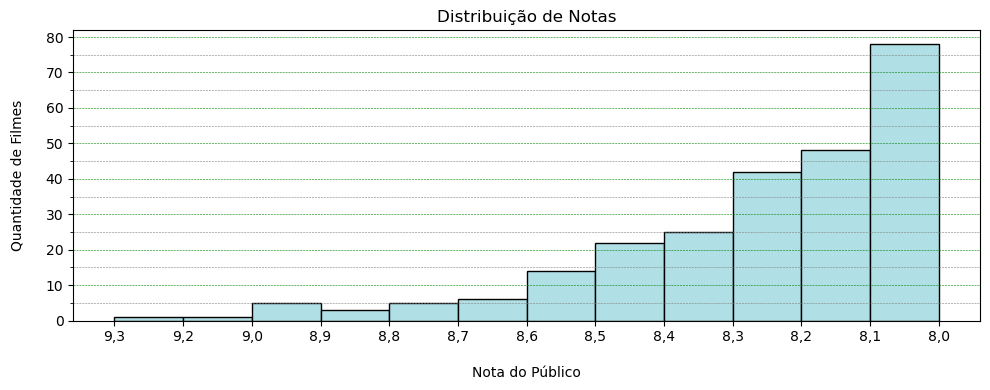

In [12]:
plt.figure(figsize=(10, 4))
plt.hist(
    df_filmes['nota_publico'], 
    bins = len(df_filmes.nota_publico.unique()) - 1, 
    color = 'powderblue',
    edgecolor = 'black'
)
plt.xlabel('\nNota do Público')
plt.ylabel('Quantidade de Filmes\n')
plt.yticks(np.arange(0, 81, 10))
plt.yticks(np.arange(0, 81, 5), minor=True)
plt.grid(which='major', axis='y', linestyle='--', color='green', linewidth=0.4)
plt.grid(which='minor', axis='y', linestyle='--', color='grey', linewidth=0.4)
plt.title('Distribuição de Notas')
plt.tight_layout()
plt.show()

In [13]:
# Converter a duração para minutos
def conversor(tempo_str):
    try:
        horas, minutos = tempo_str.split('h')
        horas = int(horas.strip())
        minutos = int(minutos.strip().replace('m', ''))
        return int(horas * 60 + minutos)
    except ValueError:
        return None

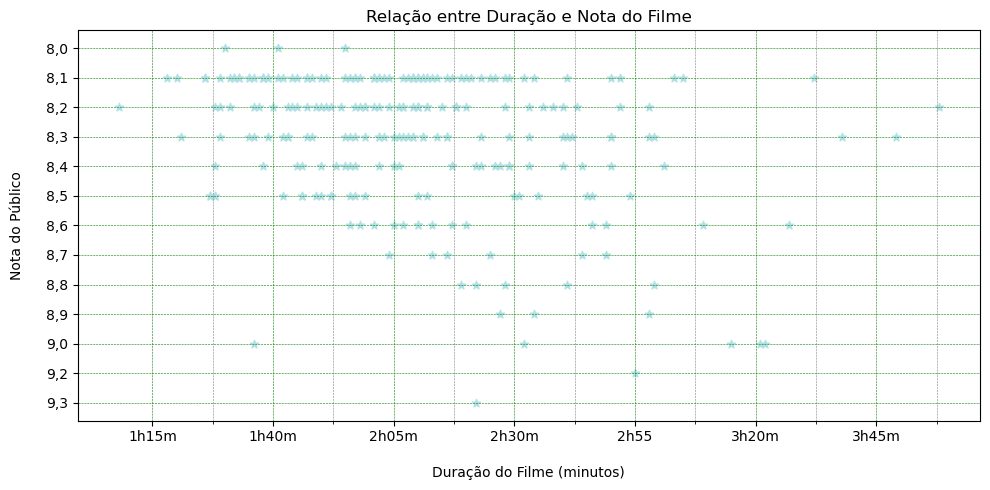

In [14]:
df_filmes['duracao_minutos'] = df_filmes['duracao'].apply(conversor)

plt.figure(figsize=(10, 5))
plt.scatter(
    df_filmes['duracao_minutos'], 
    df_filmes['nota_publico'],
    c = 'powderblue',
    marker = '*'
)
plt.xlabel('\nDuração do Filme (minutos)')
plt.ylabel('Nota do Público\n')

plt.xticks(np.arange(75, 250, 25),labels=['1h15m','1h40m','2h05m','2h30m','2h55','3h20m','3h45m'])
plt.xticks(np.arange(75, 250, 12.5), minor=True)

plt.grid(which='major', linestyle='--', color='green', linewidth=0.4)
plt.grid(which='minor', axis='x', linestyle='--', color='grey', linewidth=0.4)

plt.title('Relação entre Duração e Nota do Filme')
plt.tight_layout()
plt.show()

<Figure size 1000x400 with 0 Axes>

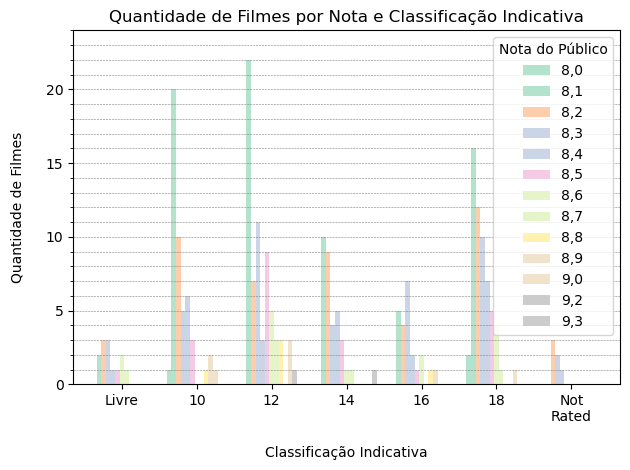

In [15]:
agrupado = df_filmes.groupby(['class_indica', 'nota_publico']).size().unstack()

plt.figure(figsize=(10, 4))
agrupado.plot(kind='bar', cmap= 'Pastel2', width=0.8)
plt.title('Quantidade de Filmes por Nota e Classificação Indicativa')

plt.xlabel('\nClassificação Indicativa')
plt.xticks(
    np.arange(0, 7, 1), 
    labels=['Livre', '10', '12', '14', '16', '18', 'Not\nRated'],
    rotation=0
)

plt.ylabel('Quantidade de Filmes\n')
plt.yticks(np.arange(0,25,1), minor=True)
plt.grid(which='both',axis='y',linestyle='--', color='grey', linewidth=0.4)
plt.legend(title='Nota do Público')
plt.tight_layout()
plt.show()